<a href="https://colab.research.google.com/github/arloporter/SMNA-Assignment-2/blob/main/graph_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install NVIDIA RAPIDS CUDA-enabled graph/dataframe libraries
*   Requries at least a tesla t4 (ideally p100)




In [ ]:
from IPython.display import HTML
from subprocess import getoutput
gpu_type = getoutput('nvidia-smi')
if 'K80' in gpu_type:
  gpu = 'K80'
elif 'T4' in gpu_type:
  gpu = 'T4'
elif 'P100' in gpu_type:
  gpu = 'P100'
display(HTML(f"<h2>{gpu}</h2>"))
print(gpu_type)

NameError: ignored

In [ ]:
!pip install pynvml
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py
!pip install --upgrade networkx
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.3 MB/s 
Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 7.30 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newe

In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,546 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,990 k

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 kB 9.8 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solvin

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cudf
import cugraph
import pandas as pd
import networkx as nx

FIXED = True
EXPORTED = True

if not FIXED:
  stream_df = pd.read_csv('/content/drive/MyDrive/stream_big_edgelist.csv', names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'])
  stream_df['Weight'] = stream_df['Weight'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df['Retweet'] = stream_df['Retweet'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df['Reply'] = stream_df['Reply'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df['Quote'] = stream_df['Quote'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df.to_csv('/content/drive/MyDrive/stream_big_edgelist.csv')
if not EXPORTED:
  stream_df = pd.read_csv('/content/drive/MyDrive/stream_big_edgelist.csv', names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'], dtype='string')
  stream_df = stream_df.drop(['Mention'], axis=1)
  net = nx.from_pandas_edgelist(stream_df, source="Source", target="Target", edge_attr='Weight')
  nx.write_gexf(net, "test.gexf")
if FIXED and EXPORTED:  
  graph = nx.read_gexf('/content/drive/MyDrive/test.gexf', )

# Centrality

In [ ]:
stream_df = pd.read_csv('/content/drive/MyDrive/stream_big_edgelist.csv', names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'], dtype='string')
stream_df = stream_df.drop(['Mention'], axis=1)
stream_df = stream_df.iloc[1: , :]
print(stream_df.head())
net = cugraph.from_pandas_edgelist(stream_df, source="Source", destination="Target", edge_attr='Weight')

          Source           Target Weight Retweet Reply Quote
0  antti_ellonen       EndGameWW3      1       1     0     0
1     EndGameWW3     CarlaBabbVOA      1       1     0     0
2     EndGameWW3     laraseligman      1       1     0     0
3     EndGameWW3  PentagonPresSec      1       0     0     0
4     EndGameWW3        Liveuamap      1       1     0     0


In [ ]:
CALCULATED = False
if not CALCULATED:
  bc = cugraph.betweenness_centrality(net, 100000)
  print(bc)
  bc.to_csv('/content/drive/MyDrive/betweenness_centrality.csv')
elif CALCULATED:
  bc = pd.read_csv('/content/drive/MyDrive/betweenness_centrality.csv')

# Community detection

In [ ]:
CALCULATED = True
if not CALCULATED:
  spmmc = cugraph.spectralModularityMaximizationClustering(net, 5)
  spmmc.to_csv('/content/drive/MyDrive/SPMMC5.csv')
  spmmc500 = cugraph.spectralModularityMaximizationClustering(net, 500)
  spmmc500.to_csv('/content/drive/MyDrive/SPMMC500.csv')
elif CALCULATED:
  spmmc = cudf.read_csv('/content/drive/MyDrive/SPMMC.csv')
  spmmc500 = cudf.read_csv('/content/drive/MyDrive/SPMMC500.csv')
#spmmc = spmmc.loc[:, ~spmmc.columns.str.contains('^Unnamed')]
print(spmmc.head())

   Unnamed: 0  cluster           vertex
0           0        0      SuzietheLip
1           1        0        4USIDream
2           2        0     maggiemae362
3           3        0       AussieYazz
4           4        0  beukes_clifford


In [ ]:
if not CALCULATED:
  parts = cugraph.ecg(net)
  parts.to_csv('/content/drive/MyDrive/ECG.csv')
elif CALCULATED:
  parts = cudf.read_csv('/content/drive/MyDrive/ECG.csv')
#parts = parts.loc[:, ~parts.columns.str.contains('^Unnamed')]
print(parts.head())

   Unnamed: 0  partition           vertex
0           0        463      SuzietheLip
1           1        189        4USIDream
2           2         89     maggiemae362
3           3         55       AussieYazz
4           4        317  beukes_clifford


In [ ]:
if not CALCULATED:
  sbcc = cugraph.spectralBalancedCutClustering(net, 10)
  sbcc.to_csv('/content/drive/MyDrive/SBCC.csv')
  sbcc100 = cugraph.spectralBalancedCutClustering(net, 100)
  sbcc100.to_csv('/content/drive/MyDrive/SBCC100.csv')
elif CALCULATED:
  sbcc = cudf.read_csv('/content/drive/MyDrive/SBCC.csv')
  sbcc100 = cudf.read_csv('/content/drive/MyDrive/SBCC100.csv')

#sbcc = sbcc.loc[:, ~sbcc.columns.str.contains('^Unnamed')]
print(sbcc.head())

   Unnamed: 0  cluster           vertex
0           0        4      SuzietheLip
1           1        6        4USIDream
2           2        6     maggiemae362
3           3        6       AussieYazz
4           4        4  beukes_clifford


# Seperate tweets from different communities into their own dataframes

In [ ]:
tweets_df = cudf.read_csv('/content/drive/MyDrive/ukraine_stream_big.csv')
#!sudo apt install python3-cffi
#!pip install --upgrade cffi==1.15.1

In [ ]:
import time
from IPython.display import clear_output

for community in spmmc500['cluster'].to_pandas().unique():
  community_list = []
  community_df = spmmc500[spmmc500['cluster'] == community]
  for index in range(community_df.shape[0]):
    row = community_df.iloc[index]
    cluster, username = row['cluster'].iloc[0], row['vertex'].iloc[0]
    username_df = tweets_df[tweets_df['author.username'] == username]
    community_list.append(username_df)

  community_total = cudf.concat(community_list)
  print(community_total.head())
  community_total.to_csv(f'/content/drive/MyDrive/communities_SPMMC/community{community}-500.csv')

                         id      conversation_id  \
333331  1573058423343779851  1573058423343779851   
342062  1573059670687846402  1573059670687846402   
344713  1573060041158139909  1572207904500891649   
14204   1573016020599672836  1573001768354840576   
292061  1573052698135597059  1572972804189962242   

       referenced_tweets.replied_to.id referenced_tweets.retweeted.id  \
333331                            <NA>                1.572985069e+18   
342062                            <NA>                1.572207905e+18   
344713                 1.572207905e+18                           <NA>   
14204                  1.573005703e+18                           <NA>   
292061                  1.57300788e+18                           <NA>   

       referenced_tweets.quoted.id            author_id in_reply_to_user_id  \
333331                        <NA>           3413287791                <NA>   
342062                        <NA>           3413287791                <NA>   
344713     

In [ ]:
for community in parts['partition'].to_pandas().unique():
  community_list = []
  community_df = parts[parts['partition'] == community]
  for index in range(community_df.shape[0]):
    row = community_df.iloc[index]
    cluster, username = row['cluster'].iloc[0], row['vertex'].iloc[0]
    username_df = tweets_df[tweets_df['author.username'] == username]
    community_list.append(username_df)

  community_total = cudf.concat(community_list)
  community_total.to_csv(f'/content/drive/MyDrive/communities_ECG/community{community}csv')

In [ ]:
for community in sbcc100['cluster'].to_pandas().unique():
  community_list = []
  community_df = sbcc100[sbcc100['cluster'] == community]
  for index in range(community_df.shape[0]):
    row = community_df.iloc[index]
    cluster, username = row['cluster'].iloc[0], row['vertex'].iloc[0]
    username_df = tweets_df[tweets_df['author.username'] == username]
    community_list.append(username_df)

  community_total = cudf.concat(community_list)
  community_total.to_csv(f'/content/drive/MyDrive/communities_SBCC/community{community}-100.csv')

# Functions for community analyses. Check account creation distribution for entire mobilization dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 9.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23,41,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


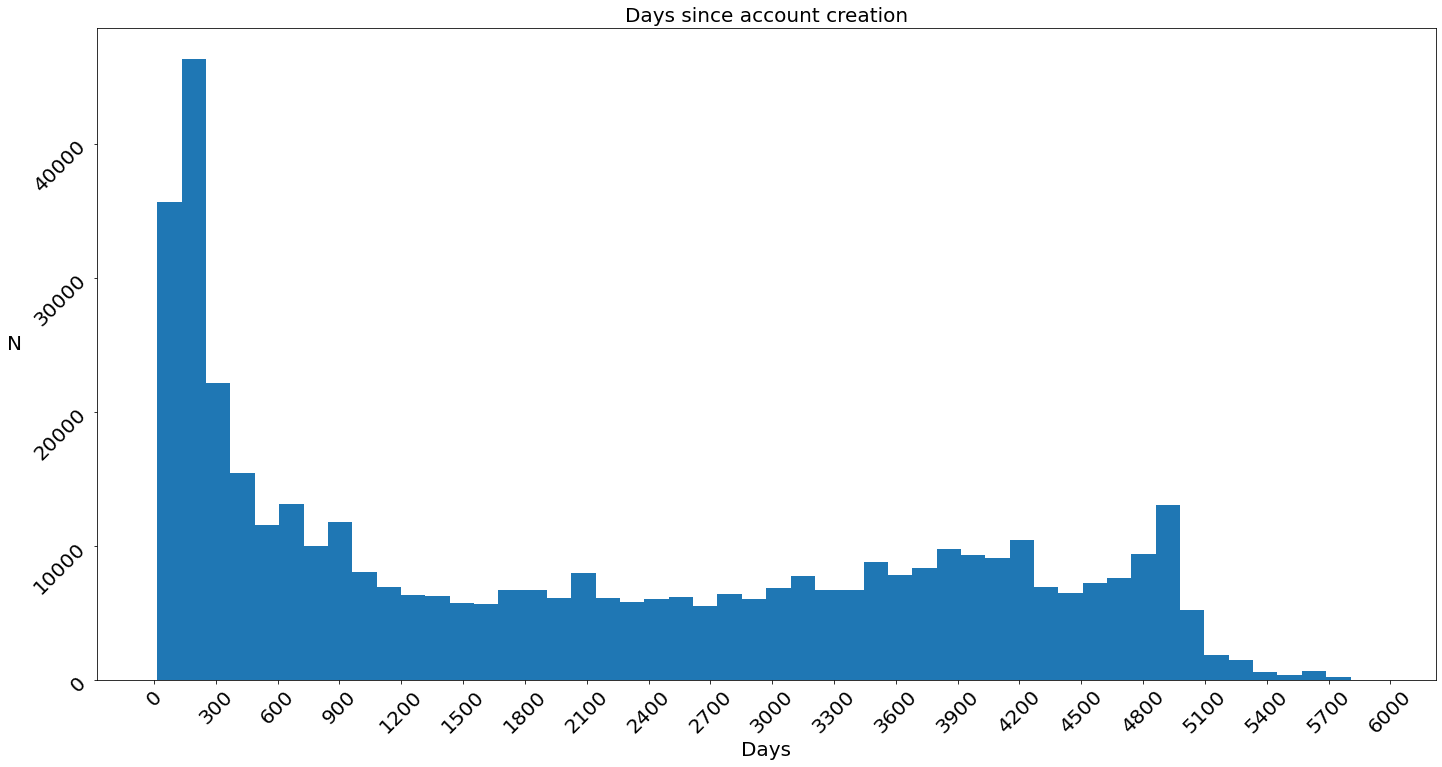

None


In [ ]:
!pip install deep-translator
from deep_translator import GoogleTranslator
import pandas as pd, matplotlib.pyplot as plt
import os, re, time, nltk, pprint

def clean_translate_tweet(row):
  if isinstance(row['text'], str):
    row['translated'] = GoogleTranslator(source='auto', target='en').translate(text=row['text'])
    time.sleep(0.3)
    if isinstance(row['translated'], str):
      row['translated'] = re.sub("@[A-Za-z0-9]+", " ", row['translated'])
      row['translated'] = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", row['translated'])
      row['translated'] = re.sub("[^A-Za-z0-9]", " ", row['translated'])
    return row

def cleanTimestamps(time):
  if not isinstance(time, str):
    return
  time = time[:19]
  time = list(time)
  time[10] = " "
  time = "".join(time)
  return time

def ms_since_creation(date):
  if not isinstance(date, str):
    return
  current = time.time()*1000
  past = time.mktime(time.strptime(date, "%Y-%m-%d %H:%M:%S"))*1000
  time_since = current - past
  days_since = int(time_since/(1000*60*60*24))
  return days_since

def plot_account_creation(dataframe):
  dataframe['author.created_at'] = dataframe['author.created_at'].map(lambda x: cleanTimestamps(x))
  dataframe['days_since_creation'] = dataframe['author.created_at'].map(lambda x: ms_since_creation(x))
  fig, axes = plt.subplots(1, 1, figsize=(24, 12))

  axes.hist(dataframe['days_since_creation'], bins = 50)
  for tick in axes.xaxis.get_major_ticks():
      tick.label.set_fontsize(20) 
      tick.label.set_rotation(45)
  for tick in axes.yaxis.get_major_ticks():
      tick.label.set_fontsize(20) 
      tick.label.set_rotation(45)

  axes.set_title('Days since account creation', fontsize=20)
  axes.set_xlabel("Days", fontsize=20)
  axes.set_ylabel("N", rotation=0, fontsize=20, labelpad=16)

  plt.xticks(fontsize=20, rotation=45)
  plt.yticks(fontsize=20)

  xloc = plt.MaxNLocator(23)
  axes.xaxis.set_major_locator(xloc)
  print(plt.show())

def analyse_community(dataframe, path):
  try:
    print(dataframe['translated'].shape)
  except KeyError:
    dataframe = dataframe.apply(clean_translate_tweet, axis = 1)
    dataframe.to_csv(path)
  dataframe = dataframe[dataframe['retweeted_user_id'].notnull()]
  print(dataframe['author.location'].value_counts(5))
  plot_account_creation(dataframe)

  all_text = " ".join([i for i in dataframe['translated']])
  tokens = nltk.wordpunct_tokenize(all_text)
  text = nltk.Text(tokens)
  concordances = text.concordance("mobilization")

  quadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(text)
  pprint.pprint(quadgrams.ngram_fd.tabulate(20))

tweets_df = pd.read_csv('/content/drive/MyDrive/ukraine_stream_big.csv')
#analyse_community(tweets_df, '/content/drive/MyDrive/ukraine_stream_big.csv')
plot_account_creation(tweets_df)


# Iterate through communities, check location, account creation distribution, quadgrams, and collocations around mobilization

### Chose ECG communities, since it seemed arbritrary to specify the number of communities as with SPMMC and SBBC

community138.csv
community87.csv
community417.csv
(79,)
Edinburgh              0.2
Jacksonville, FL       0.2
in the world           0.2
London                 0.1
Edinburgh, Scotland    0.1
yemen-sanaa.           0.1
Ontario, Canada        0.1
Name: author.location, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


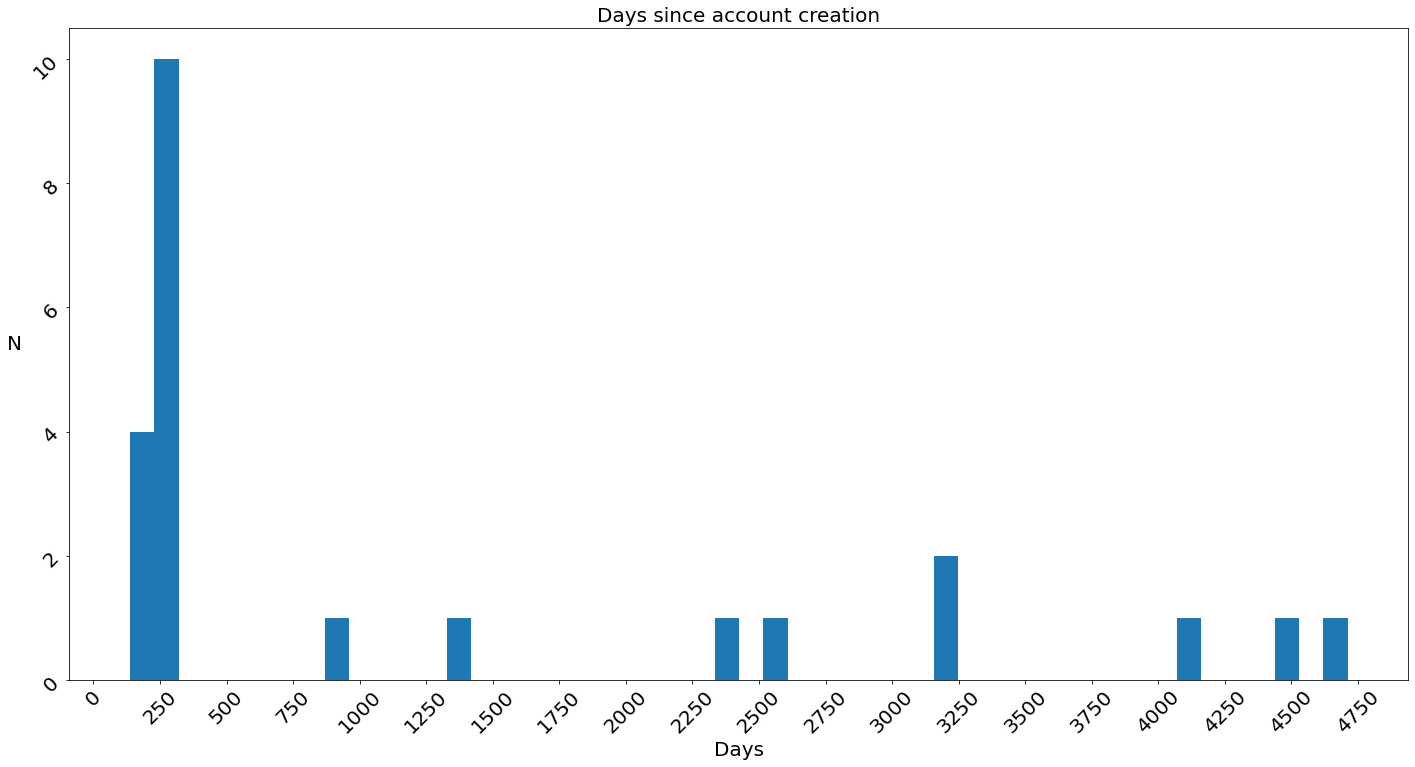

None
Displaying 1 of 1 matches:
Security Council a day after the mobilization of 300 000 reservists was announ
         ('Our', 'amazing', 'team', 'gave')         ('amazing', 'team', 'gave', 'free')    ('team', 'gave', 'free', 'confidential')   ('gave', 'free', 'confidential', 'legal') ('free', 'confidential', 'legal', 'advice')   ('confidential', 'legal', 'advice', 'to')           ('legal', 'advice', 'to', 'over')               ('advice', 'to', 'over', '1')                  ('to', 'over', '1', '700')              ('over', '1', '700', 'people')              ('1', '700', 'people', 'from')        ('700', 'people', 'from', 'Ukraine')    ('people', 'from', 'Ukraine', 'seeking')    ('from', 'Ukraine', 'seeking', 'safety')      ('Ukraine', 'seeking', 'safety', 'in')     ('seeking', 'safety', 'in', 'Scotland')           ('safety', 'in', 'Scotland', 'n')         ('in', 'Scotland', 'n', 'nTonight')       ('Scotland', 'n', 'nTonight', 'they')             ('n', 'nTonight', 'they', 're') 
        

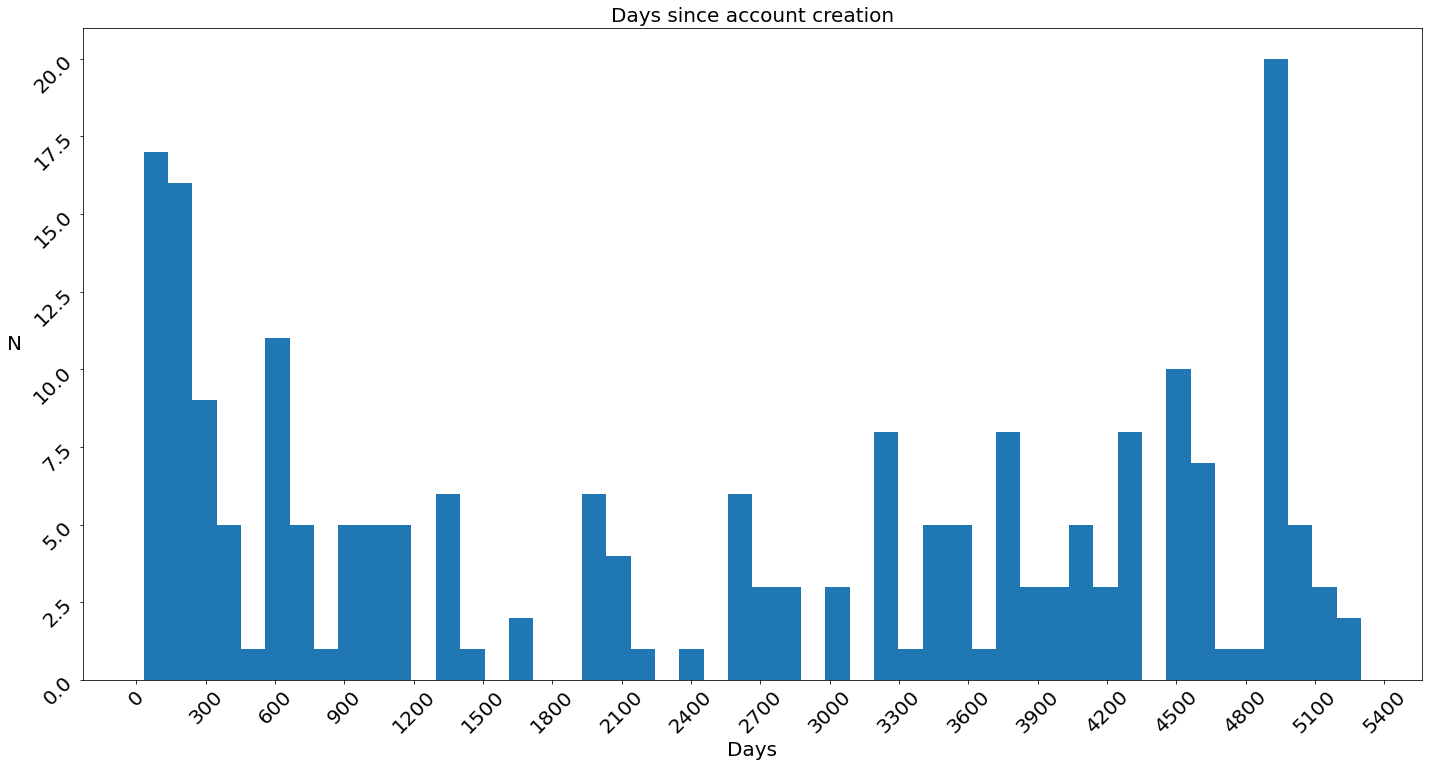

None
Displaying 18 of 18 matches:
iplomats of a set number Putin s mobilization self own Employees at the Khruni
paign for Wagner Putin announces mobilization n The cost of airline tickets ou
ferendum The Reykjavik Grapevine Mobilization in Russia Day 2 UkraineRussiaWar
ING Putin secretly orders larger mobilization of a million soldiers to die in 
 President Zelensky The military mobilization will bring the war to the homes 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
lves from Russia Putin announces mobilization n The cost of airline tickets ou
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
arm on Twitter about the partial mobilization ordered by Putin and there is no
the same alarm about the general mobilization ordered by Zelensky whose subjec
ING Putin secretly orders larger mobilization of a million soldiers to die in 
 nPls support RT P

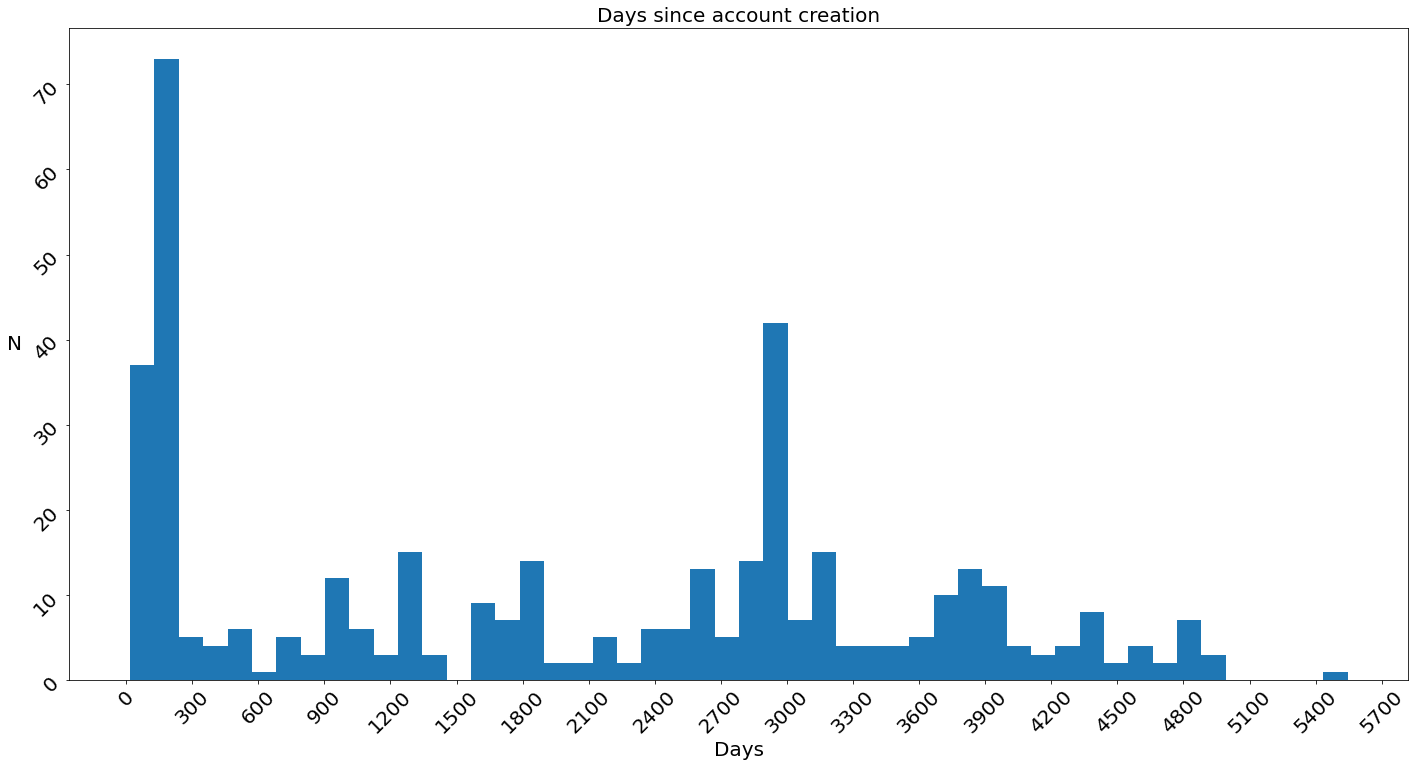

None
Displaying 12 of 12 matches:
im back Secret clause in Putin s mobilization decree may allow him to draft up
 Russia Ukraine UkraineRussiaWar Mobilization Putin mobilization The museum in
aineRussiaWar Mobilization Putin mobilization The museum in Izyum was robbed H
e Russians were to flee from the mobilization Jesus fuck Russia I m not mourni
e as Putin has ordered a general mobilization with the goal of 300 000 conscri
 question is whether the partial mobilization is more of an escalation or an a
n act of desperation The partial mobilization puts pressure on Putin and his r
time it will take months for the mobilization to take effect militarily Illner
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
 decades as Ukraine from the map Mobilization List of 305 925 names comprising
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
d Brigade Moscow Airport Vnukovo Mobilization in action Supporting war and fig
     ('Exhumation'

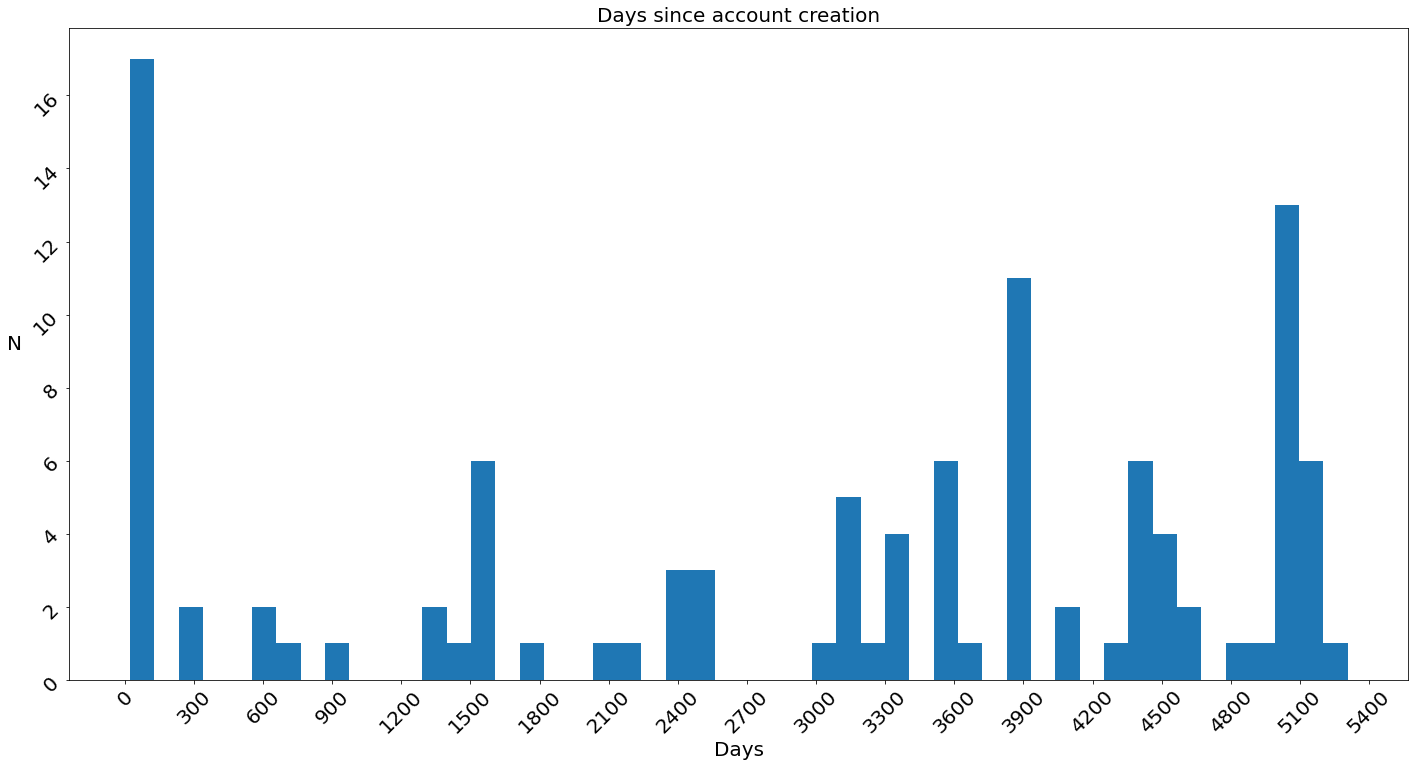

None
Displaying 6 of 6 matches:
ING Putin secretly orders larger mobilization of a million soldiers to die in 
 send more people to die Putin s mobilization self own Employees at the Khruni
 strategic plant is freaking out Mobilization in Russia Day 2 UkraineRussiaWar
tin claimed the US wanted in his mobilization speech yesterday Even paranoids 
in Shock People are Fleeing from Mobilization and War Scott Ritter answers the
ion of Russian guy about partial mobilization in Russia Interview 21 09 n via 
('should', 'never', 'have', 'happened')    ('never', 'have', 'happened', 'and')           ('Can', 't', 'decide', 'who')             ('t', 'decide', 'who', 'I')             ('decide', 'who', 'I', 'm')            ('who', 'I', 'm', 'happier')             ('I', 'm', 'happier', 'to')           ('m', 'happier', 'to', 'see')          ('happier', 'to', 'see', 'go')              ('to', 'see', 'go', 'all')              ('see', 'go', 'all', 'to')             ('go', 'all', 'to', 'hell')          ('all

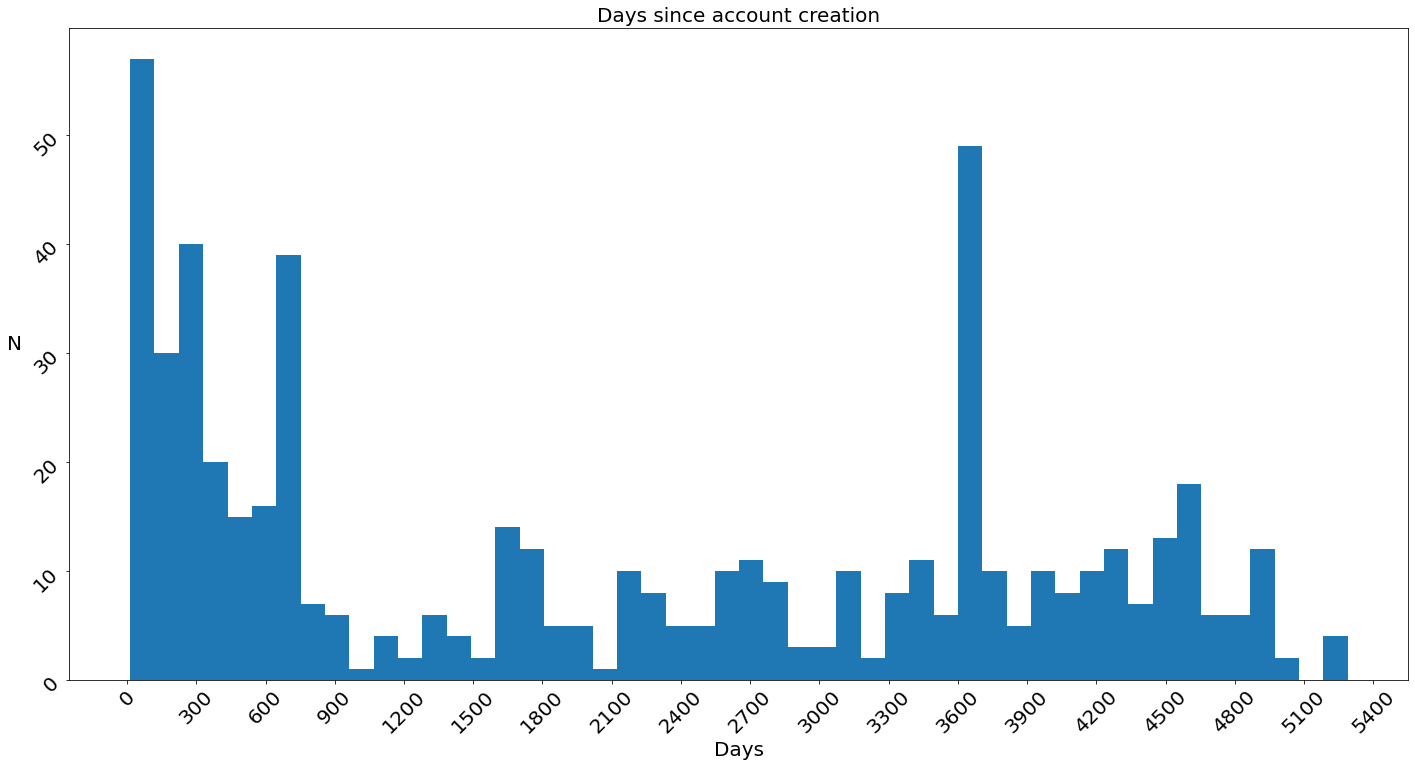

None
Displaying 25 of 31 matches:
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
eet protests against the partial mobilization policy announced by President Vl
been given under Putin s partial mobilization plan It s time for the people of
ING Putin secretly orders larger mobilization of a million soldiers to die in 
 Putin s announcement of partial mobilization on September 21 reflected many p
 losing this war here and no new mobilization effort can fix those problems an
s if you want to survive Putin s mobilization Conscripts in Moscow getting loa
 Vladimir Putin orders a partial mobilization of reservists in Russia in a mea
hat is very impressive about the mobilization in Russia is the fact that peopl
s and the Duma are attending the mobilization centre s to sign up for service 
et Crashes After Putin s Partial Mobilization Message I am not going to die fo
eet protests against the partial mobilization policy announced by President Vl
ING Putin secretly

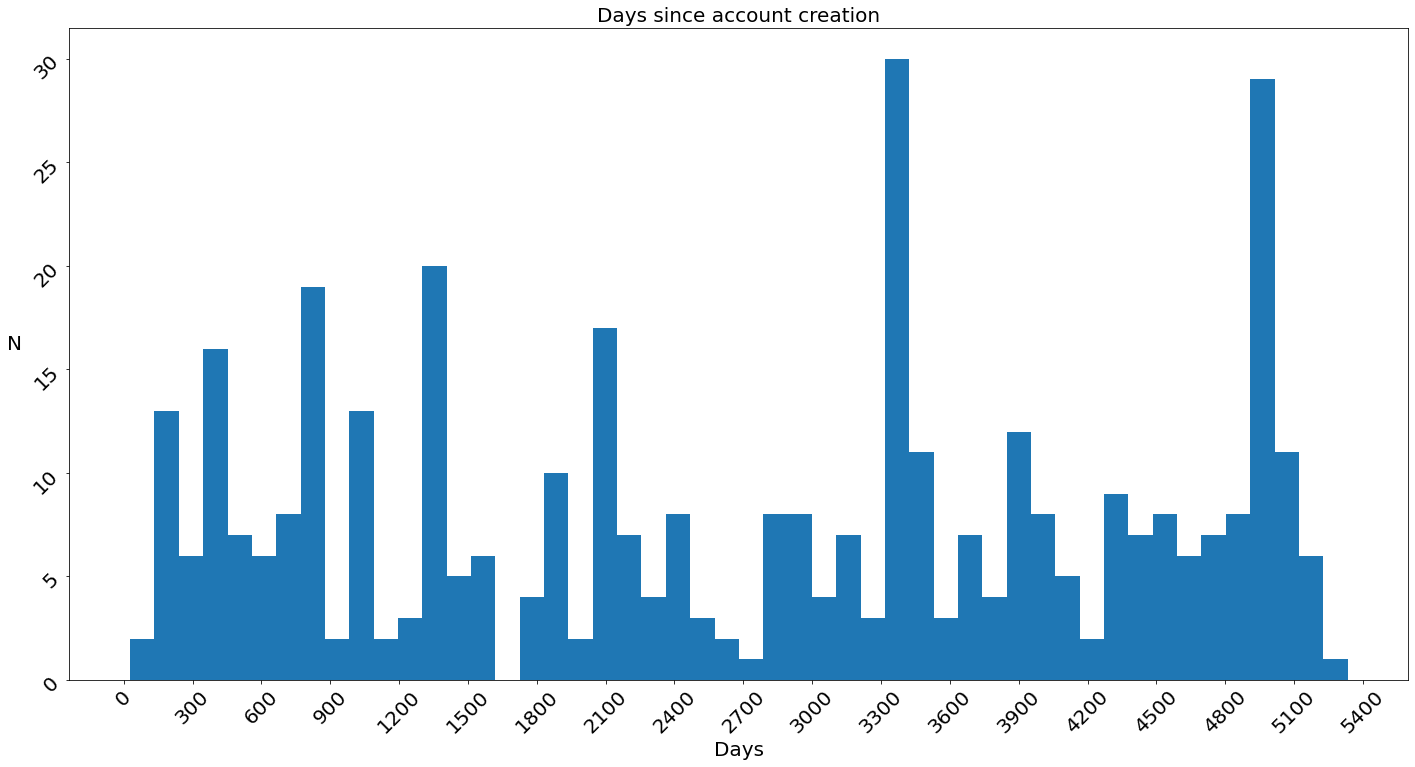

None
Displaying 25 of 56 matches:
cow announced a partial military mobilization Report by Poland is distributing
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
Russia show just how quickly the mobilization is happening Less than 24 hours 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
as a Wishlist to Fight Russia As mobilization begins in Russia sold out flight
ture the U S media reported Anti mobilization protests in Russia are not neces
ING Putin secretly orders larger mobilization of a million soldiers to die in 
phe Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
ghway protesting against Putin s mobilization Breaking News As Russia began ca
soldiers and offic

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (62,63,64,65,66,67,68,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


community82.csv
community253.csv
community435.csv
Venezuela                         0.099010
Caracas, Venezuela                0.059406
Melbourne Beach, FL               0.049505
Cuba                              0.049505
Canyon Creek, TX                  0.049505
Norway/Canada                     0.049505
Edinburg, TX                      0.029703
Un lugar del planeta              0.029703
Caracas                           0.029703
La Habana, Cuba                   0.019802
chaviripa                         0.019802
En La Ciudad de Pinar Del Rio.    0.019802
Nueva Esparta                     0.019802
Rome, Lazio                       0.019802
Anzoátegui, Venezuela             0.019802
El Tigre, Estado Anzoátegui, V    0.019802
Anaco, Venezuela                  0.009901
Montalbán, Venezuela              0.009901
#TrueNorth                        0.009901
San Francisco, Venezuela          0.009901
 §JPRME / $JPRME / jprme.tez      0.009901
♄9                                0.009901
VALE

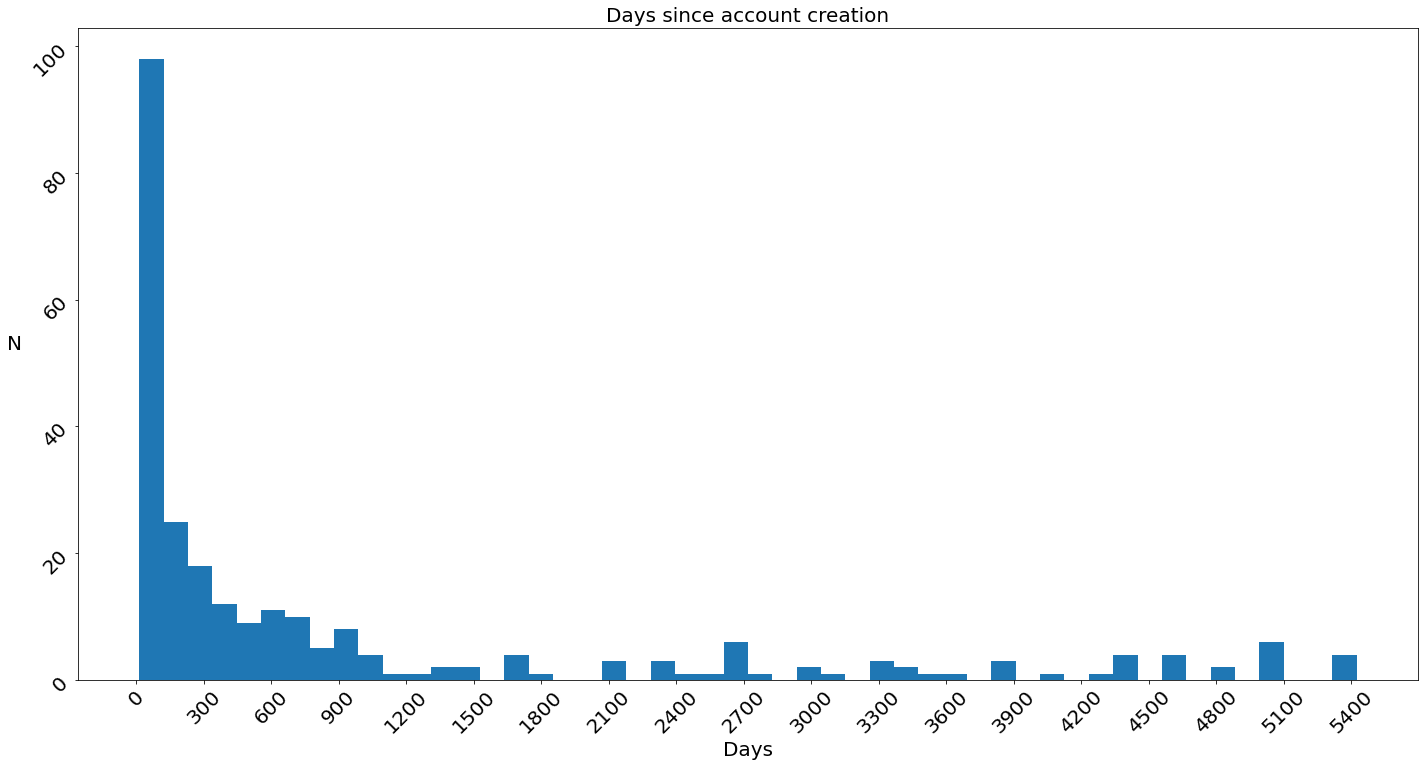

None
Displaying 25 of 71 matches:
eet protests against the partial mobilization policy announced by President Vl
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
e coming in so far about Russian mobilization n n1 They are not sticking to Pu
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
flight of the Russians after the mobilization declared by Putin I share the in
s Putin s announcement about the mobilization of up to 300 000 reservists for 
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
e protesting against the partial mobilization called by Putin when there are t
t Vladimir Putin decrees partial mobilization in Russia n n Cu dateYRe FuerzaT
t Vladimir Putin d

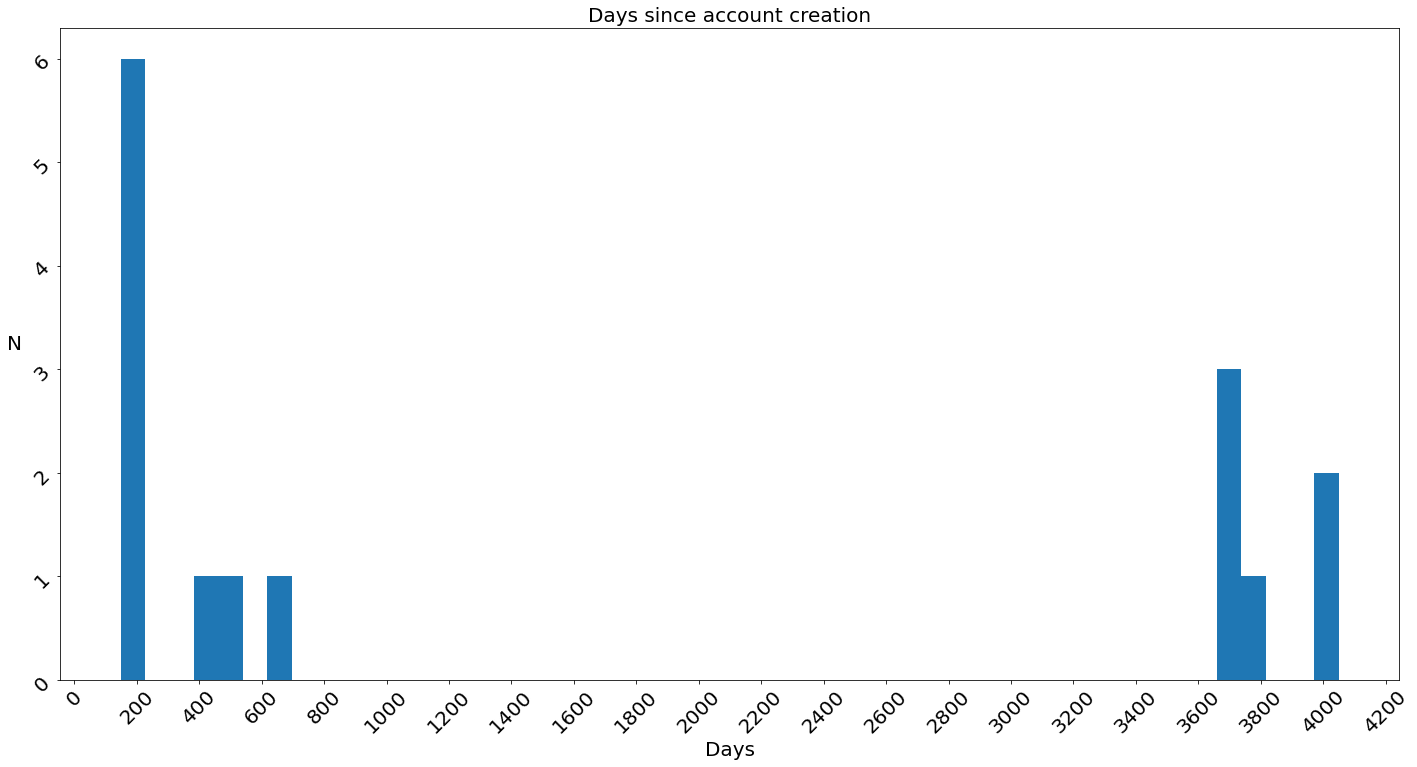

None
no matches
          ('UKRAINE', 'IS', 'A', 'CLEANUP')         ('IS', 'A', 'CLEANUP', 'OPERATION')          ('A', 'CLEANUP', 'OPERATION', 'n')                 ('n', 'UKRAINE', 'IS', 'A')    ('CLEANUP', 'OPERATION', 'n', 'UKRAINE')         ('OPERATION', 'n', 'UKRAINE', 'IS')     ('President', 'Vladimir', 'Putin', 'n')    ('Vladimir', 'Putin', 'n', 'nAnnounced')           ('Putin', 'n', 'nAnnounced', 'a')      ('n', 'nAnnounced', 'a', 'Nationwide')    ('nAnnounced', 'a', 'Nationwide', 'war')         ('a', 'Nationwide', 'war', 'Draft') ('Nationwide', 'war', 'Draft', 'Yesterday')       ('war', 'Draft', 'Yesterday', 'Here')       ('Draft', 'Yesterday', 'Here', 'are')      ('Yesterday', 'Here', 'are', 'Flight')       ('Here', 'are', 'Flight', 'Patterns')         ('are', 'Flight', 'Patterns', 'in')         ('Flight', 'Patterns', 'in', 'and')            ('Patterns', 'in', 'and', 'out') 
                                          4                                           4                

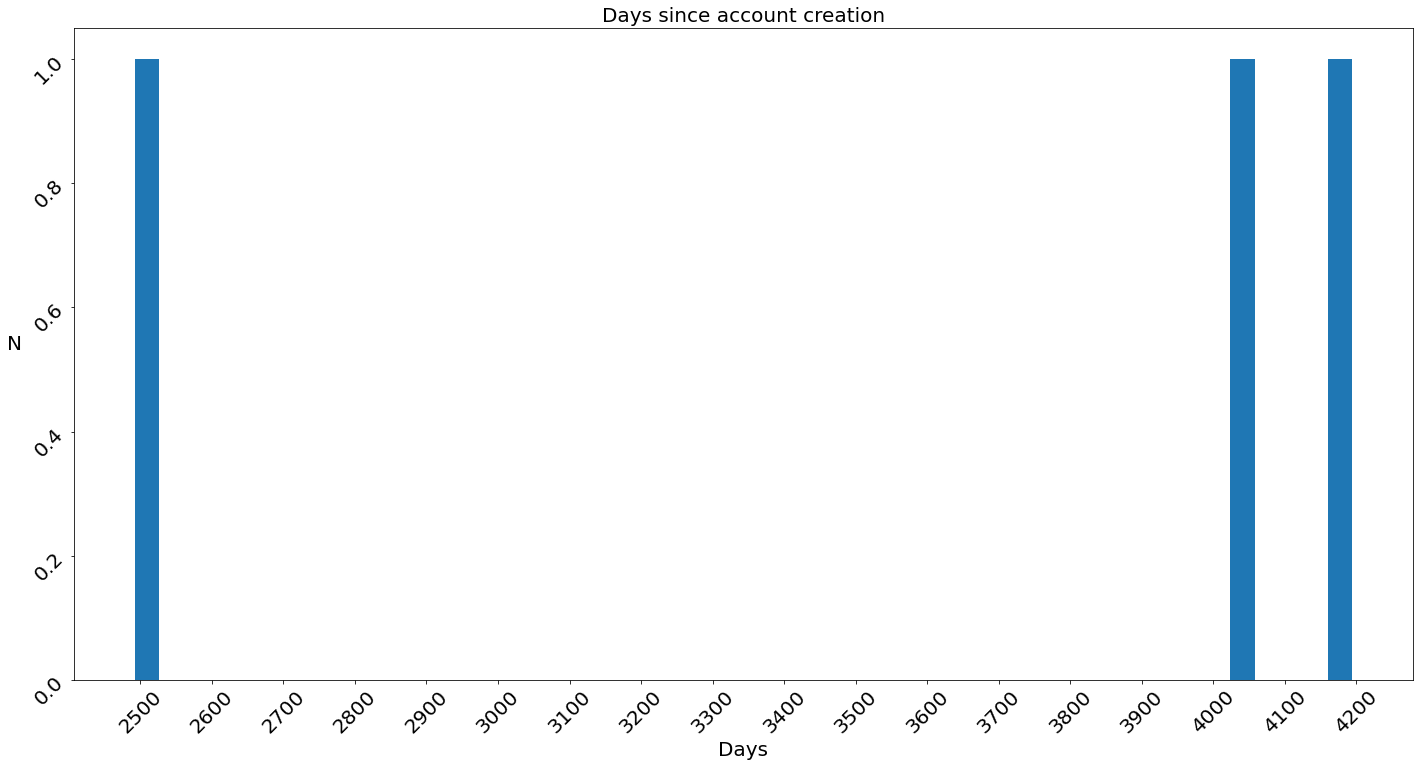

None
no matches
  ('4', 'Wilderness', '2010', 'altheide')  ('Wilderness', '2010', 'altheide', 'bc')        ('2010', 'altheide', 'bc', '1987')    ('altheide', 'bc', '1987', 'Liberal3')       ('bc', '1987', 'Liberal3', 'Putin') ('1987', 'Liberal3', 'Putin', 'Prepares')  ('Liberal3', 'Putin', 'Prepares', 'For')       ('Putin', 'Prepares', 'For', 'War')        ('Prepares', 'For', 'War', 'With')              ('For', 'War', 'With', 'US')             ('War', 'With', 'US', 'Says')              ('With', 'US', 'Says', 'He')                 ('US', 'Says', 'He', 's')                ('Says', 'He', 's', 'Not')            ('He', 's', 'Not', 'Bluffing')             ('s', 'Not', 'Bluffing', 'n')        ('Not', 'Bluffing', 'n', 'nThese')      ('Bluffing', 'n', 'nThese', 'elite')     ('n', 'nThese', 'elite', 'globalist')   ('nThese', 'elite', 'globalist', 'are') 
                                        2                                         2                                         2                  

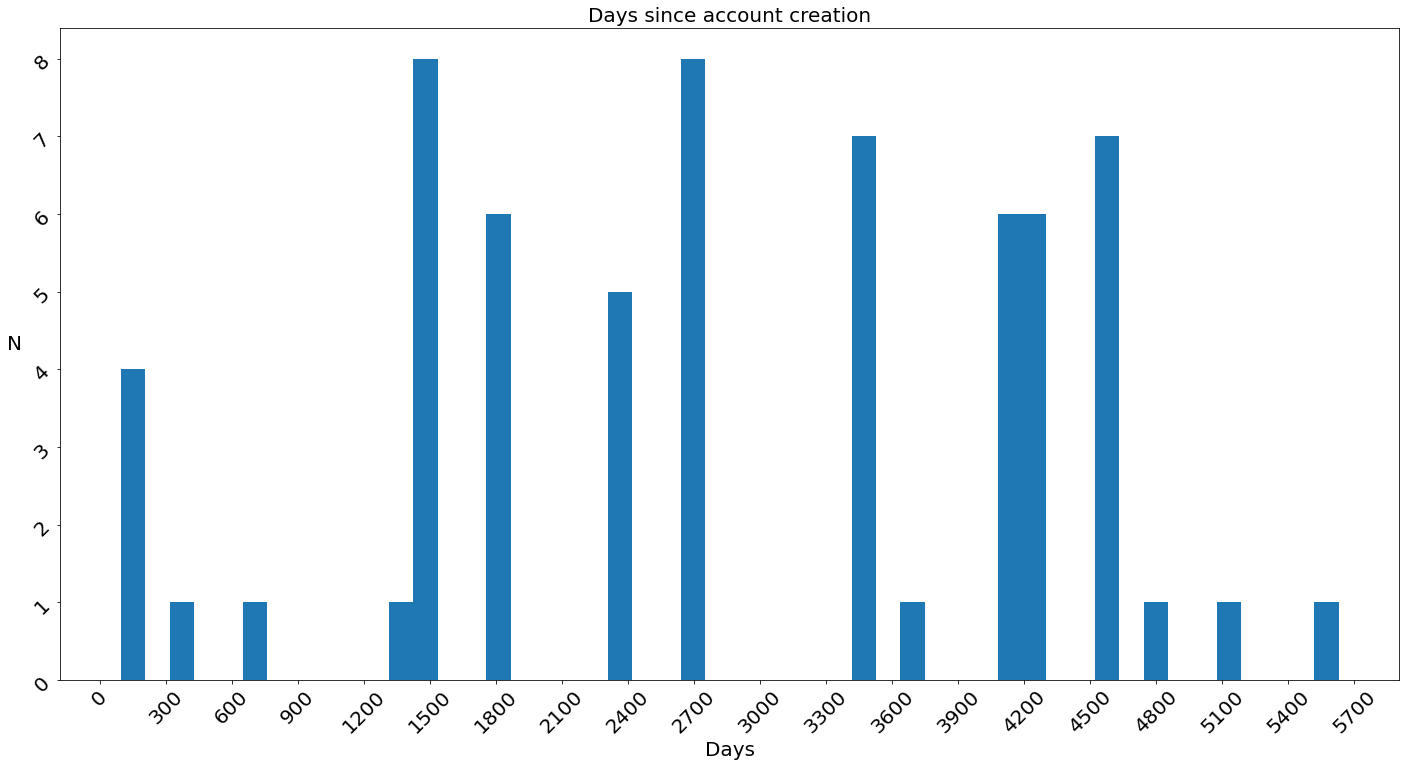

None
Displaying 2 of 2 matches:
e as he was boarding the bus n n mobilization These folks aren t known for the
 Ukraine was bad so far but this mobilization effort is going to be positively
                           ('n', 'n', 'n', 'n')        ('school', 'education', 'in', 'Ukraine')                 ('the', 'war', 'in', 'Ukraine')                 ('Excited', 'to', 'be', 'part')                      ('to', 'be', 'part', 'of')                    ('be', 'part', 'of', 'this')            ('part', 'of', 'this', 'initiative')             ('of', 'this', 'initiative', 'and')       ('this', 'initiative', 'and', 'honoured')         ('initiative', 'and', 'honoured', 'to')                 ('and', 'honoured', 'to', 'be')                  ('honoured', 'to', 'be', 'on')                         ('to', 'be', 'on', 'a')                      ('be', 'on', 'a', 'panel')                    ('on', 'a', 'panel', 'with')                  ('a', 'panel', 'with', 'such')      ('panel', 'with', 'such', 'distinguis

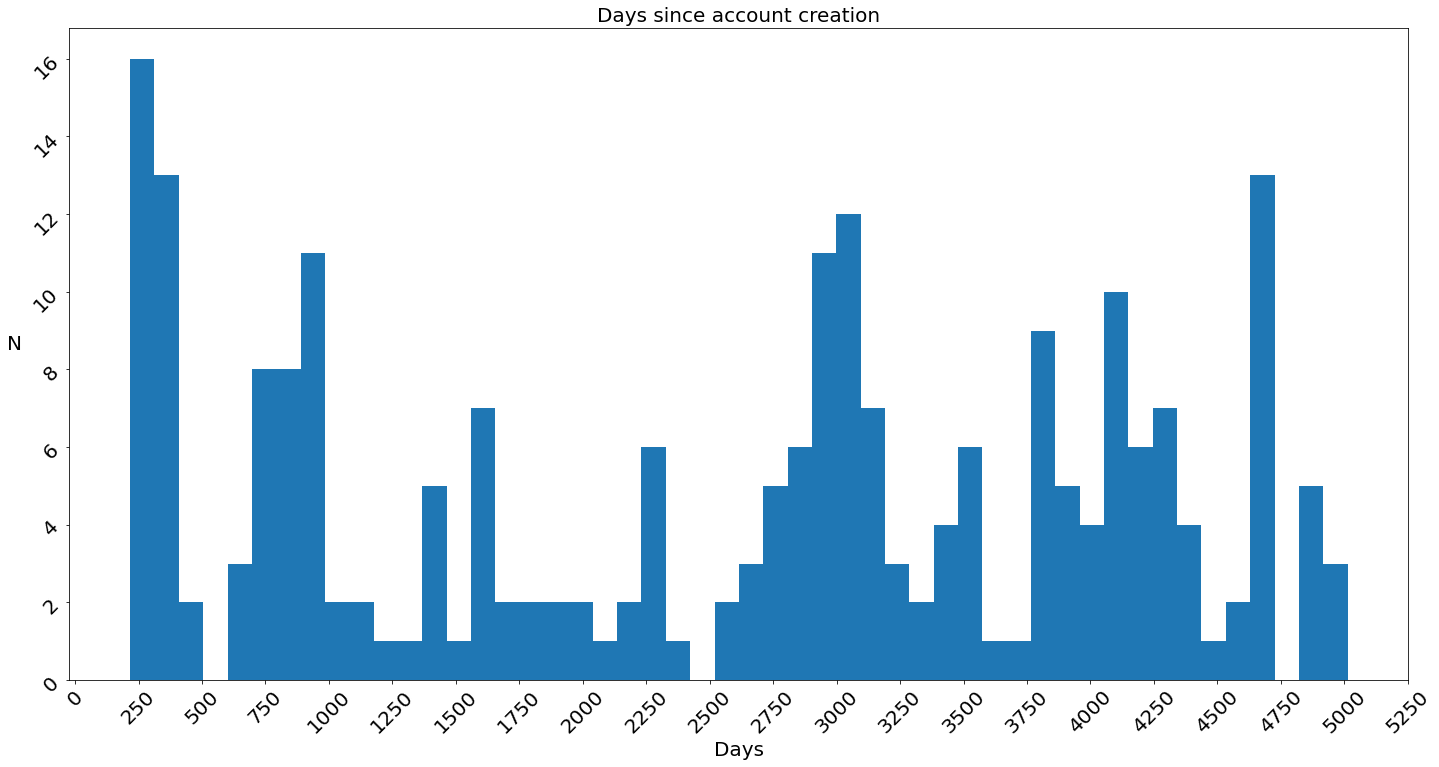

None
Displaying 25 of 68 matches:
sia vs Ukraine Day 211 After the Mobilization announced yesterday by Putin and
golian border Russians flee from mobilization in all possible directions Russi
arInUkraine which has caused the mobilization decreed by Putin This is how I i
arInUkraine which has caused the mobilization decreed by Putin Last week on Se
sia vs Ukraine Day 211 After the Mobilization announced yesterday by Putin and
ns are trying to escape from the mobilization announced by Putin n nAt the sam
hard to be aware of what partial mobilization means in Russia until you read p
 2022 N n Putin orders a partial mobilization and threatens to respond with hi
 hours after Putin announced the mobilization of reservists to participate in 
 two landlines Putin s announced mobilization of 300 000 reservists was jaw dr
es cited n n putin s 300 000 men mobilization lots of useless cannon fodder as
d the rhetorical confines of its mobilization campaign n Secretary of State An
 decree unlike the

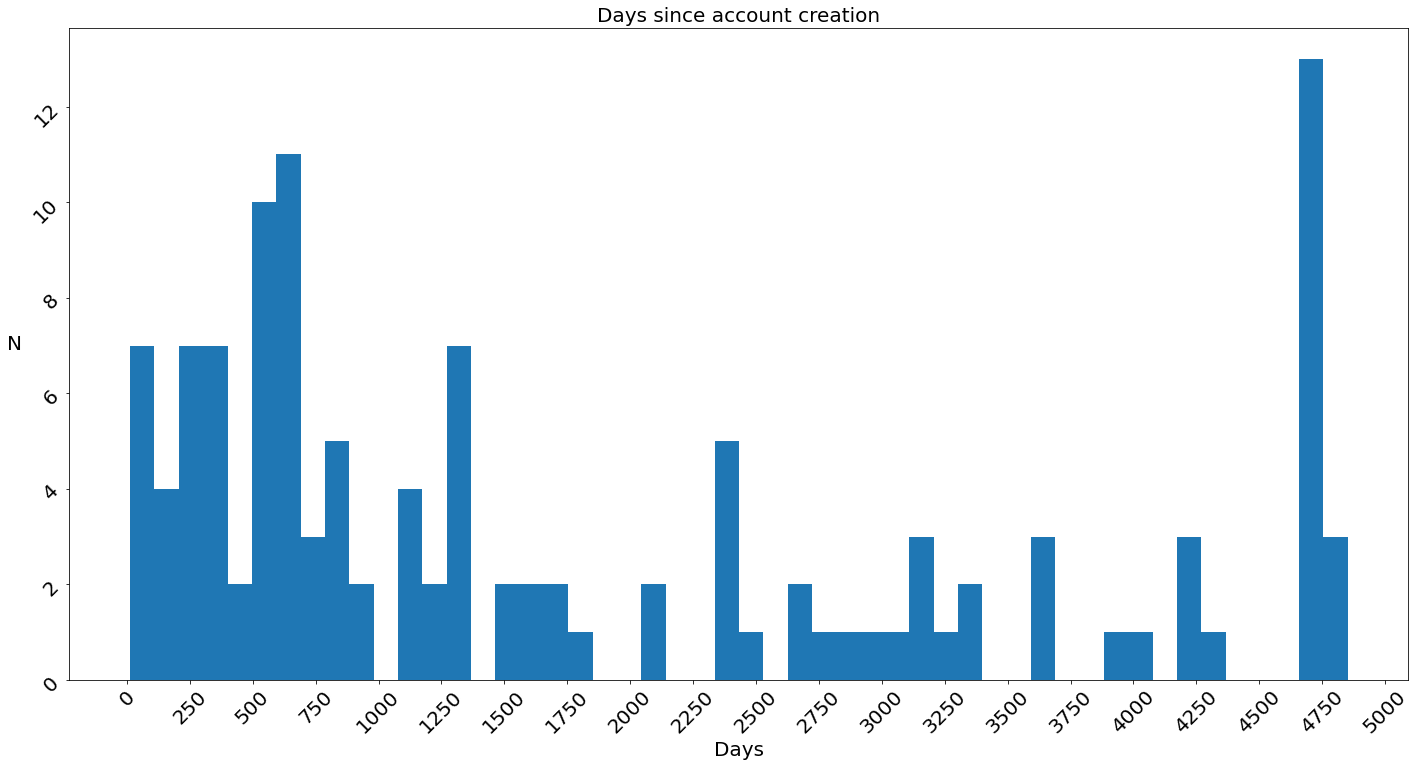

None
Displaying 18 of 18 matches:
Putin s mobilization self own Employees at the Khruni
ids farewell to mobilized locals Mobilization n n Russia 20220922 Babayurt Dag
 as villagers protesting against mobilization by blocking a federal road Russi
 blocking a federal road Russian mobilization List of 305 925 people has been 
ozens Detained In Russia At Anti Mobilization Protests via Roskomnadzor will b
k Russian media for discrediting mobilization agency website n nRussia s feder
ns are trying to escape from the mobilization announced by Putin Georgia Russi
trumpet n nThe so called partial mobilization has begun in Russia According to
ance even before the decision on Mobilization appeared Russians are crying as 
ll never see them again n Russia Mobilization MobilizationInRussia On tomorrow
ents of ethnic cleansing Russian mobilization List of 305 925 people has been 
ht since Putin s announcement of mobilization On Ilikovsky Avenue in Lomonosov
e Russia Putin Putin Russia Iran Mobilizati

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


community167.csv
community343.csv
community35.csv
Ukraine, Kyiv                     0.082569
Far from where I'd like to be     0.055046
Orlando, FL                       0.055046
Midtown, Manhattan                0.045872
Paris, Tel Aviv, Rome, Athene     0.045872
                                    ...   
Sth NSW                           0.009174
Grammy Nominated Artists ²⁰¹³     0.009174
Berlin — Rote Insel               0.009174
Vancouver, British Columbia       0.009174
right side of history             0.009174
Name: author.location, Length: 66, dtype: float64


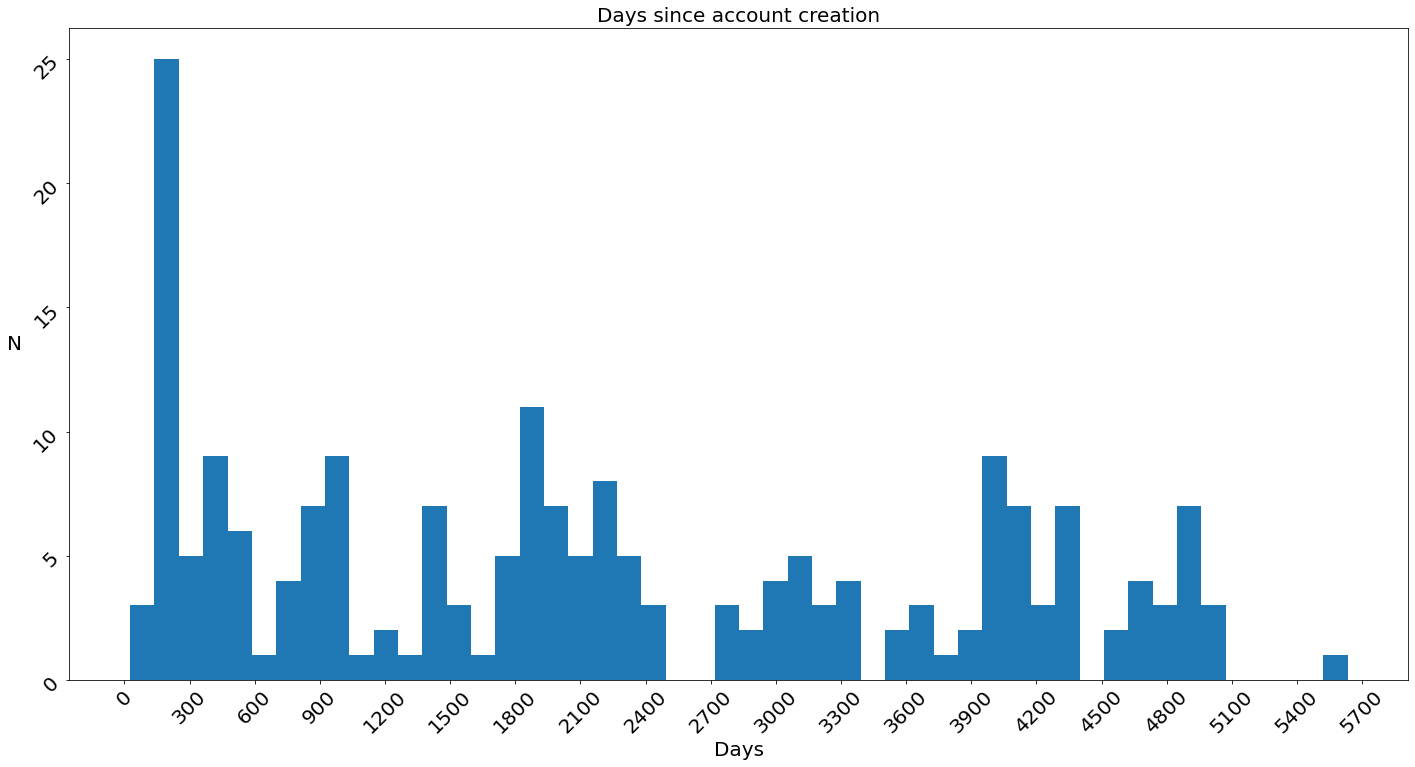

None
Displaying 12 of 12 matches:
 its Kremlin sources the partial mobilization decree s classified article envi
n 1 Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
ne UkraineWillWin Ukraine Russia mobilization NAFO n When Putin threatens to u
ussia RussiaInvadedUkraine Putin mobilization NAFO My recent appearance on s p
secret part of Putin s decree on mobilization states that Russia can draft up 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
ting experienced soldiers Russia mobilization has started in Yakutia in Siberi
r in ukraine Does russia support mobilization to Ukraine Sergei is a hero n nD
the nation pitiful and said that mobilization will end up in the overthrow of 
ne UkraineWillWin Ukraine Russia mobilization NAFO n Sergei is a hero n nDurin
ne UkraineWillWin Ukraine Russia mobilization NAFO n While Energy Companies ar
ne UkraineWillWin Ukraine Russia mobilization NAFO n While Energy Companies ar
           ('US', 

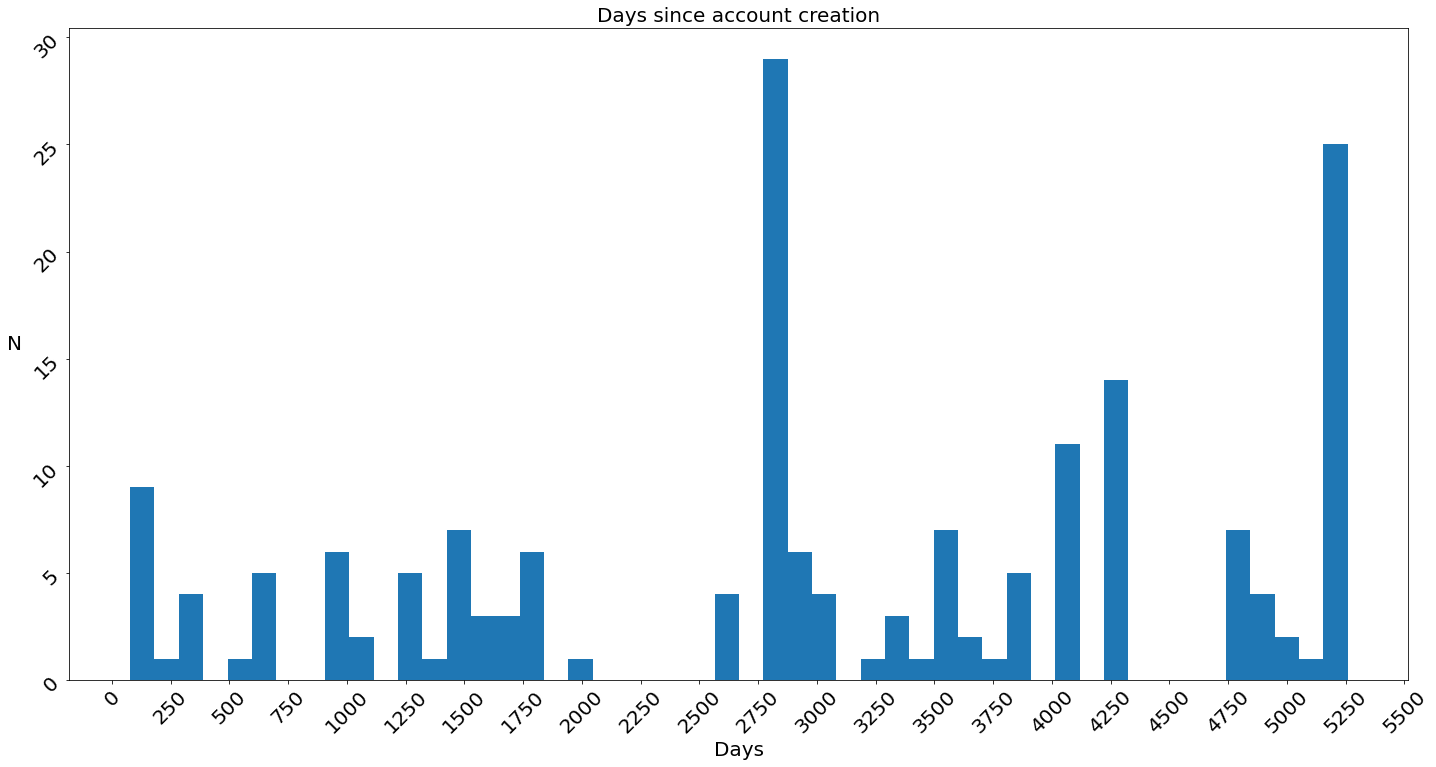

None
Displaying 25 of 25 matches:
ING Putin secretly orders larger mobilization of a million soldiers to die in 
 en masse after Putin s call for mobilization Vladimir Putin threatening the w
ns are trying to escape from the mobilization announced by Putin n nAt the sam
her n WinterIsComing n n Russian mobilization woman is insulting and talking d
ssianarmy viral StandWithUkraine mobilization Russia Ukraine Update Another lo
lenskyy UkraineRussianWar Russia Mobilization Victoria Australia had the longe
n nLatest Video footage from the Mobilization in Makhachkala Russia showing yo
ie More video footage s from the Mobilization in Makhachkala Russia showing yo
ssia who are part of the partial mobilization are under a lot of stress and so
cs More video footage s from the Mobilization in Makhachkala Russia showing yo
f Ukraine Video footage from the Mobilization in Makhachkala Russia showing yo
o Ukraine Video footage from the Mobilization in Makhachkala Russia showing yo
ie More video foot

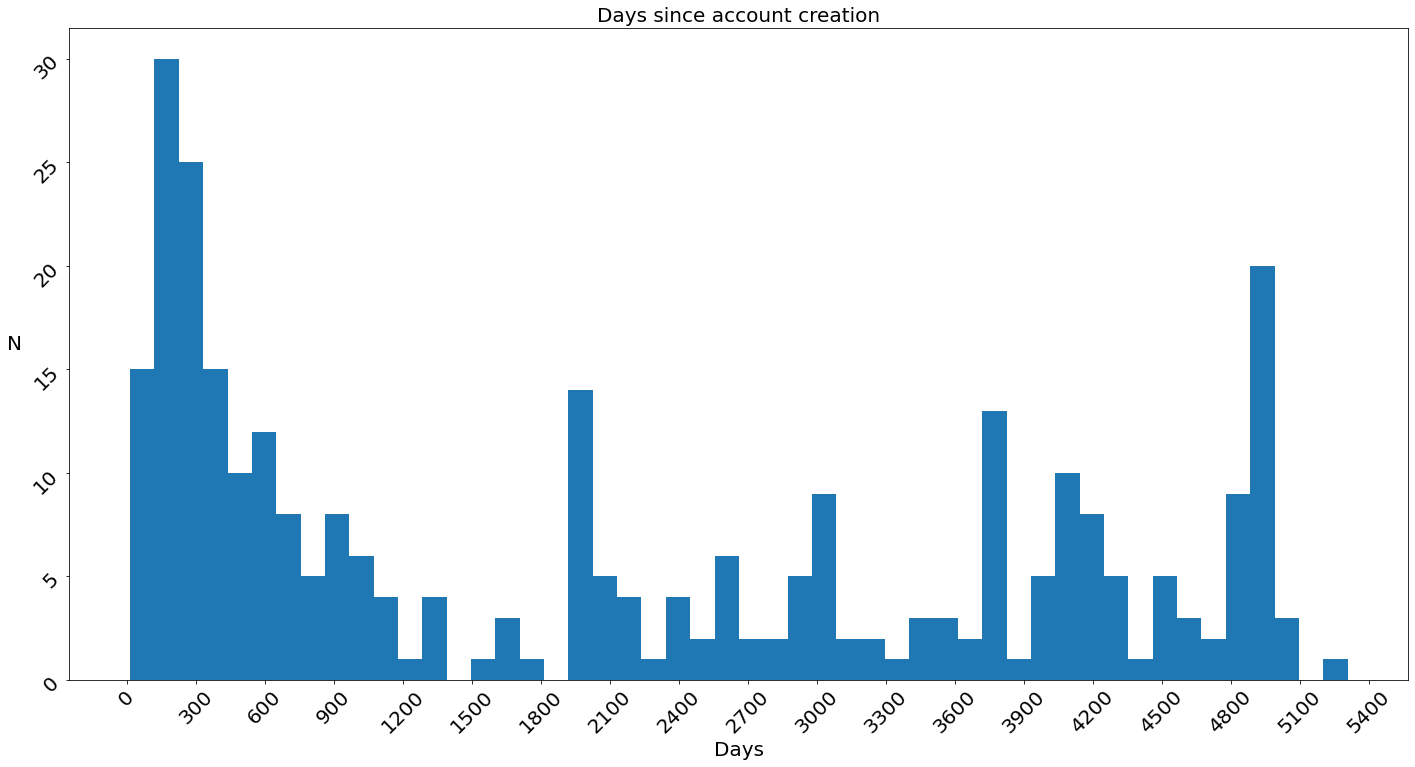

None
Displaying 7 of 7 matches:
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
ilitary call up BBC News Putin s mobilization self own Employees at the Khruni
ful Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
e cast out After Putin announced mobilization in Russia 90 of support for the 
n n Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
ties but the EU media censors it Mobilization in Russia Day 2 UkraineRussiaWar
ces fury in Russia over military mobilization and prisoner swap The Washington
           ('The', 'western', 'media', 'and')            ('western', 'media', 'and', 'the')                 ('media', 'and', 'the', 'US')                  ('and', 'the', 'US', 'Govt')           ('the', 'US', 'Govt', 'constantly')        ('US', 'Govt', 'constantly', 'repeat')       ('Govt', 'constantly', 'repeat', 'the') ('constantly', 'repeat', 'the', 'propaganda')         ('repeat', 'the', 'propaganda', 'of')  

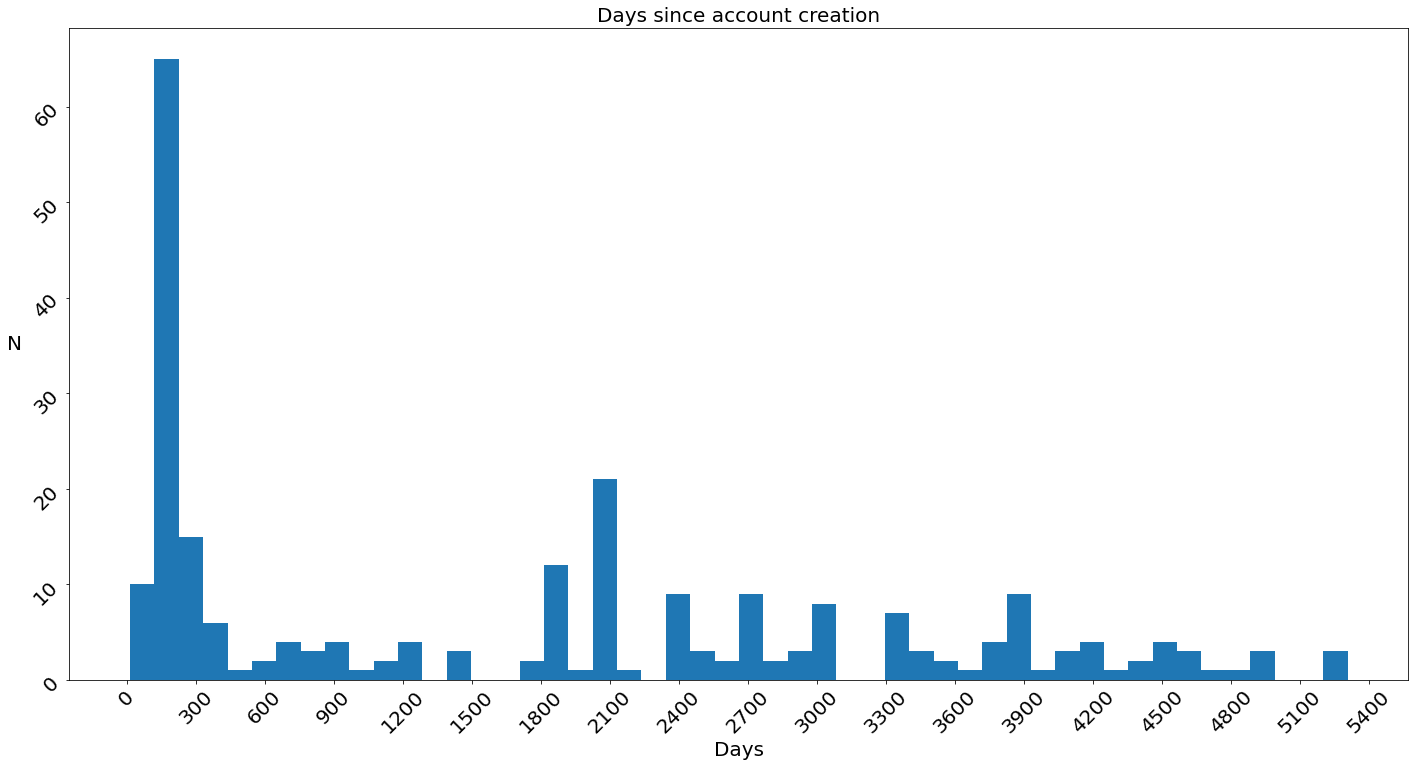

None
Displaying 10 of 10 matches:
ame day he announced his partial mobilization The morale of Ukrainians will be
 PutinWarCriminal UkraineWillWin Mobilization in Russia Day 2 UkraineRussiaWar
ns are trying to escape from the mobilization announced by Putin n nAt the sam
ssia As I said yesterday Russian mobilization will go much faster than many we
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
sterday just hours after Putin s mobilization announcement n Mind blown an ATG
at does Putin s partial military mobilization mean for Central Asian migrants 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 defend it NWhen Putin announced mobilization yesterday thousands of Russians 
endums in Ukraine starts partial mobilization and warns NATO of all out war wi
                ('Mind', 'blown', 'an', 'ATGM')               ('blown', 'an', 'ATGM', 'almost')                 ('an', 'ATGM', 'almost', 'hit')                  ('ATGM', 'almos

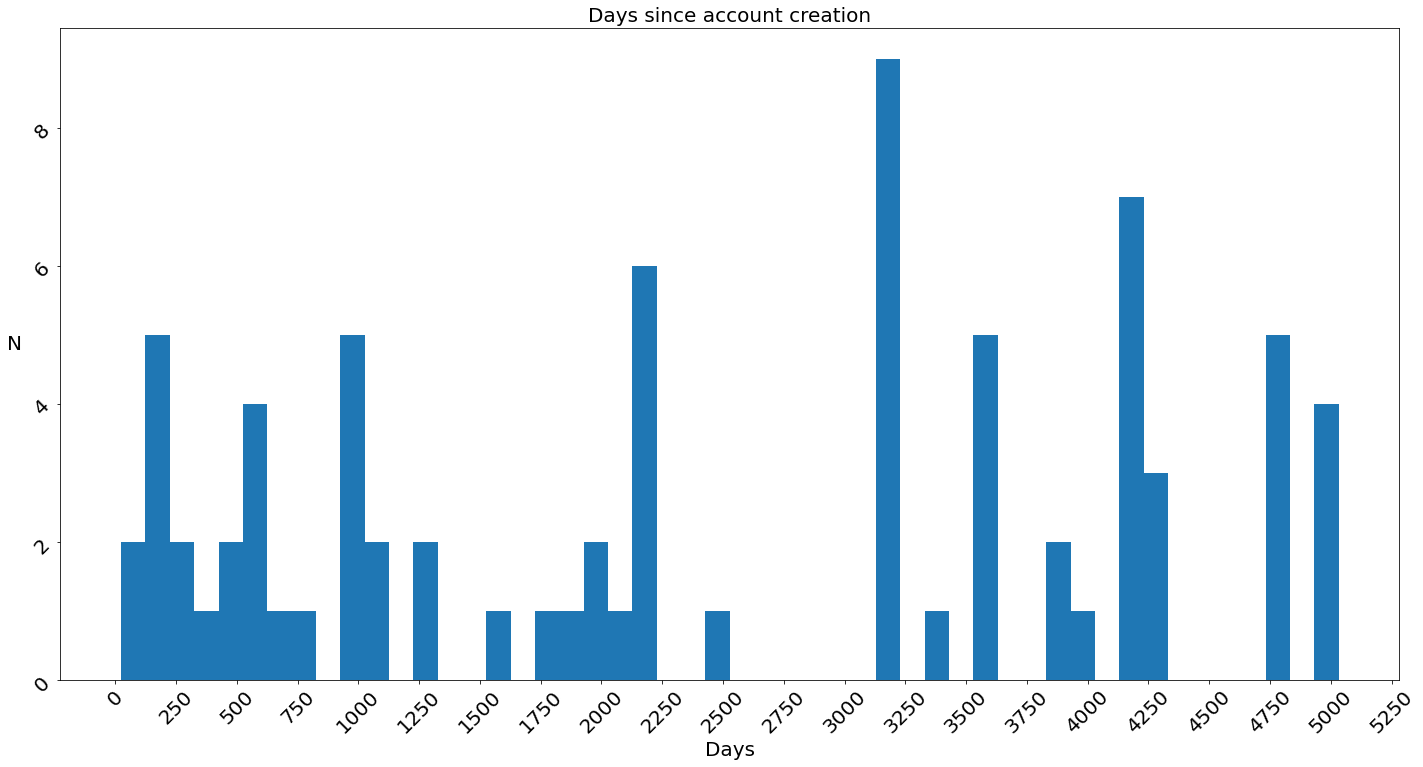

None
Displaying 2 of 2 matches:
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
       ('don', 't', 'want', 'to')         ('t', 'want', 'to', 'go')        ('want', 'to', 'go', 'to')         ('to', 'go', 'to', 'war')       ('go', 'to', 'war', 'with')    ('LizTruss', 'we', 'don', 't')        ('we', 'don', 't', 'want')   ('to', 'war', 'with', 'Russia')   ('war', 'with', 'Russia', 'We')    ('with', 'Russia', 'We', 'do')     ('Russia', 'We', 'do', 'not')       ('We', 'do', 'not', 'want')      ('do', 'not', 'want', 'one')    ('not', 'want', 'one', 'more')  ('want', 'one', 'more', 'penny') ('one', 'more', 'penny', 'going')  ('more', 'penny', 'going', 'to')   ('penny', 'going', 'to', 'the') ('going', 'to', 'the', 'Ukraine')    ('to', 'the', 'Ukraine', 'it') 
                               21                                21                                21                            

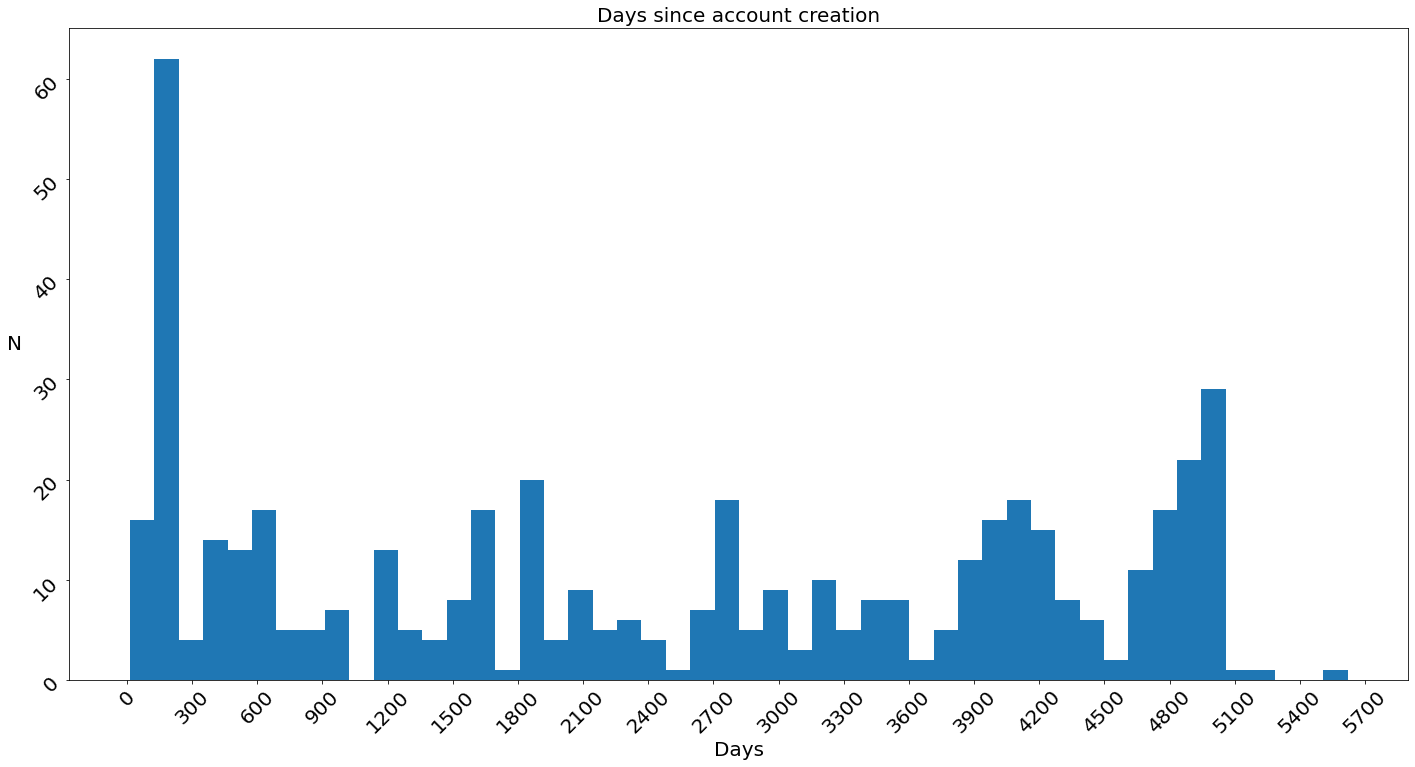

None
Displaying 25 of 34 matches:
 Mobilization in Russia Day 2 UkraineRussiaWar
cow announced a partial military mobilization Report by It s not a partial mob
he final hours Putin s announced mobilization of 300 000 reservists was jaw dr
golian border Russians flee from mobilization in all possible directions Russi
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 proportionally Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 has plummeted to the grave Anti mobilization protests in Russia are not neces
sia has only officially declared mobilization three times in its history World
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
ging its hands over the need for mobilization for the sake of the motherland s
d have happened better than this mobilization Millions of Russians who have ne
las Everything I ve seen on this mobilization so f

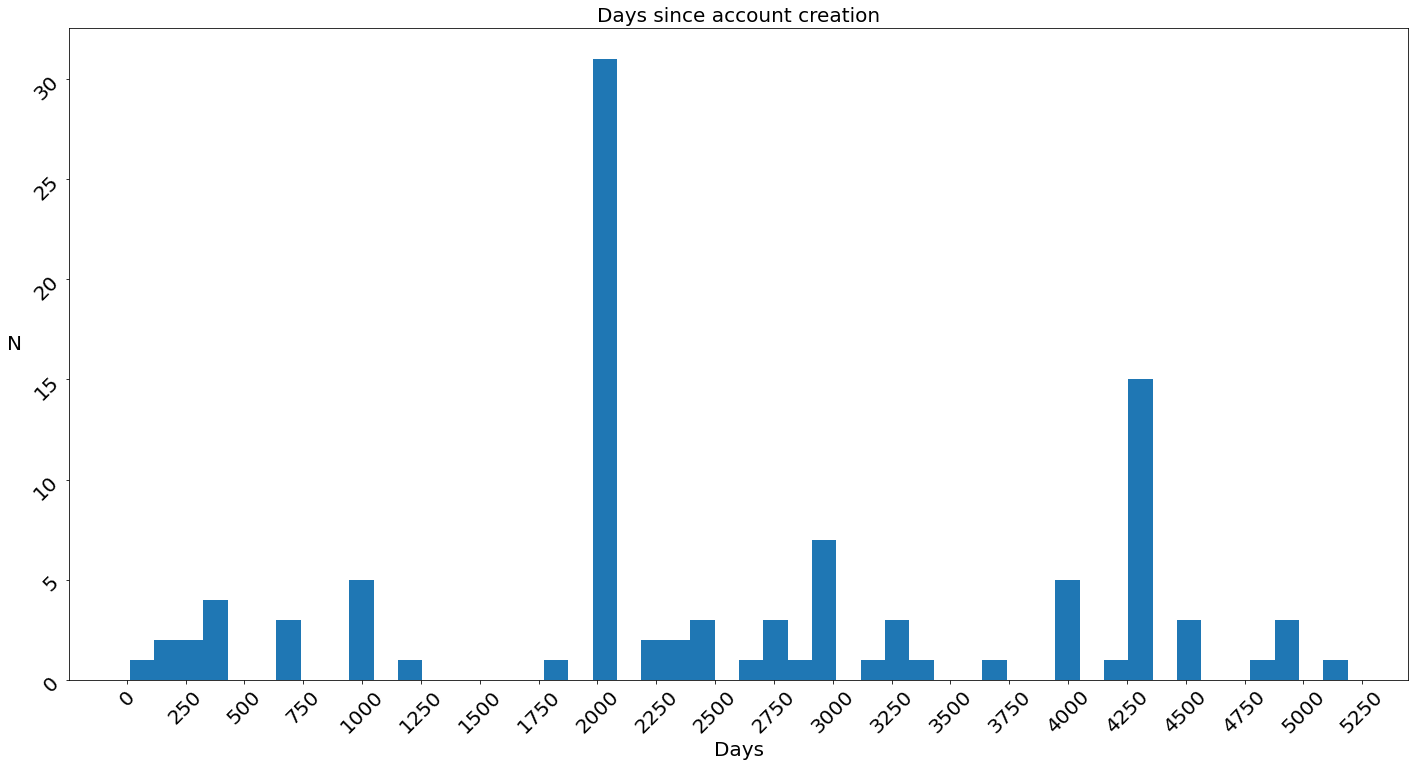

None
Displaying 7 of 7 matches:
STABLE GENIUS n Putin s military mobilization and nuclear threats represent an
ING Putin secretly orders larger mobilization of a million soldiers to die in 
r in Ukraine 1 3 With the forced mobilization Ukraine Ukraine should share thi
lies support for Ukraine Putin s mobilization self own Employees at the Khruni
n to war in Ukraine amp national mobilization will hurry the end of Putin s ev
annexation referenda and partial mobilization n n The Western establishment in
ING Putin secretly orders larger mobilization of a million soldiers to die in 
('Hispanic', 'Latino', 'Latinos', 'BanFoxFromBases')                      ('Trump', 'Tower', 'in', 'NYC')                        ('Tower', 'in', 'NYC', 'amp')                          ('in', 'NYC', 'amp', 'his')                       ('NYC', 'amp', 'his', 'other')                ('amp', 'his', 'other', 'properties')               ('his', 'other', 'properties', 'have')              ('other', 'properties', 'have',

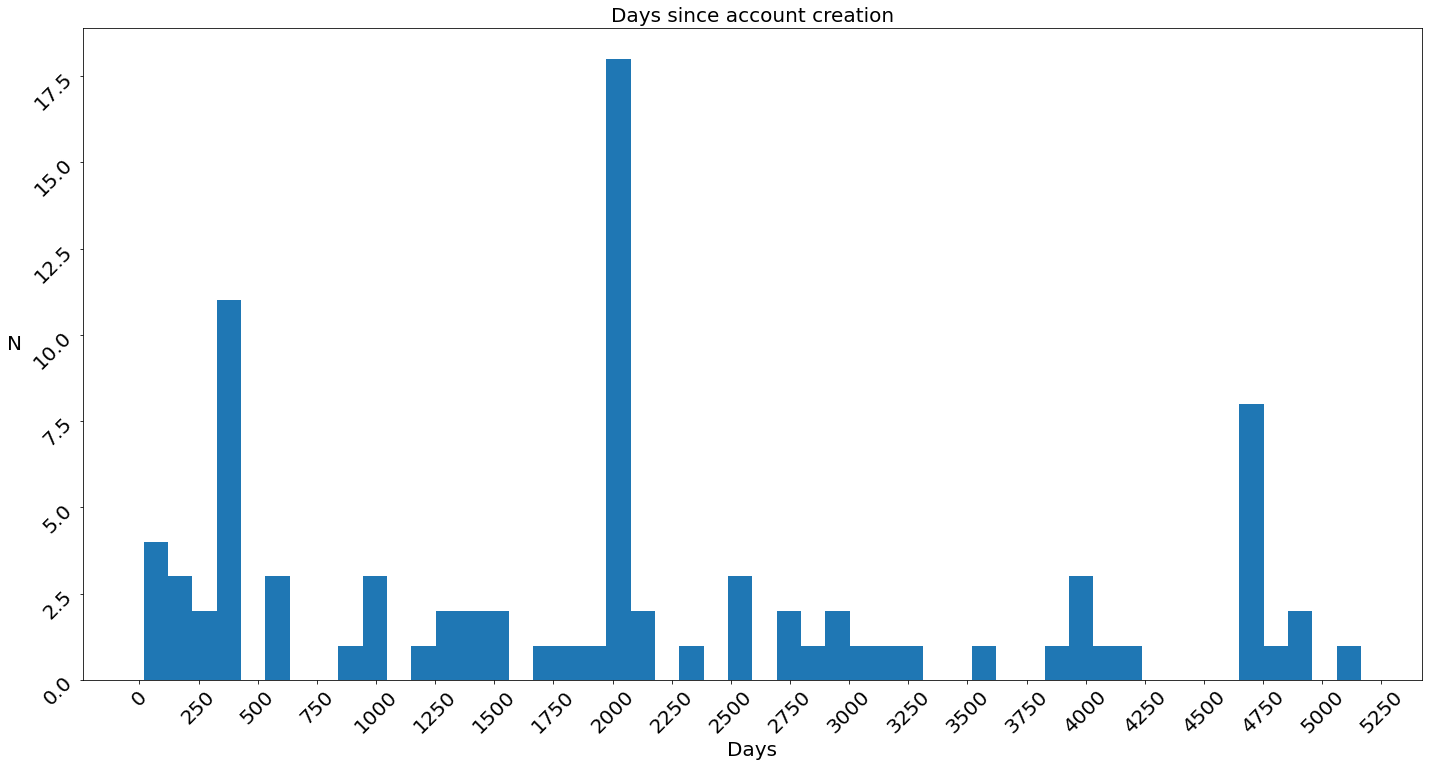

None
Displaying 9 of 9 matches:
bout the introduction of partial mobilization in Russia went to the military r
ussia Privet Andrey I m watching mobilization videos photos from Russia and I 
s This reminds me on Milosevic s mobilization in Serbia while protecting his e
out Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
n the first night of Putin s new mobilization anti war partisans used Molotov 
eless unwinnable war the way how mobilization is held in RU shows that Russia 
that Russia has turned Stalinist Mobilization is a current form of the great t
aine The scale and speed of this mobilization of 300 000 men is staggering Ver
he gates in time for Putin s war mobilization n The NATO trolls denigrating co
    ('The', 'NATO', 'trolls', 'denigrating') ('NATO', 'trolls', 'denigrating', 'college')  ('trolls', 'denigrating', 'college', 'age')    ('denigrating', 'college', 'age', 'anti')            ('college', 'age', 'anti', 'war')         ('age', 'anti', 'war', '

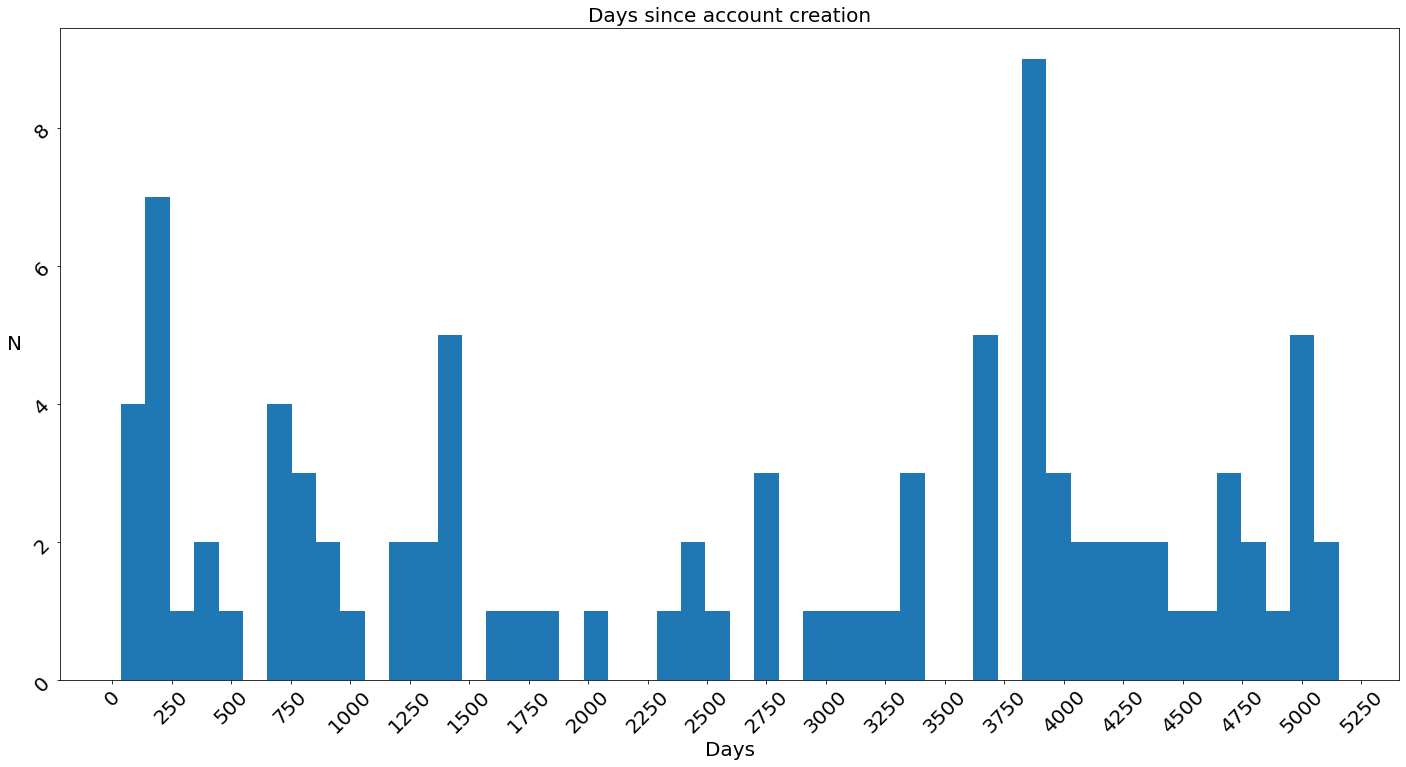

None
Displaying 3 of 3 matches:
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
bilisation After Putin announced mobilization in Russia 90 of support for the 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
               ('Why', 'are', 'people', 'from')            ('are', 'people', 'from', 'Ukraine')       ('people', 'from', 'Ukraine', 'lobbying')           ('from', 'Ukraine', 'lobbying', 'my')         ('Ukraine', 'lobbying', 'my', 'office')          ('If', 'America', 'keeps', 'electing') ('America', 'keeps', 'electing', 'Republicans')      ('keeps', 'electing', 'Republicans', 'it')       ('electing', 'Republicans', 'it', 'will')             ('Republicans', 'it', 'will', 'be')                    ('it', 'will', 'be', 'much')                  ('will', 'be', 'much', 'like')                  ('be', 'much', 'like', 'that')                ('much', 'like', 'that', 'here')                   ('like', 'that', 'here', 'n')            

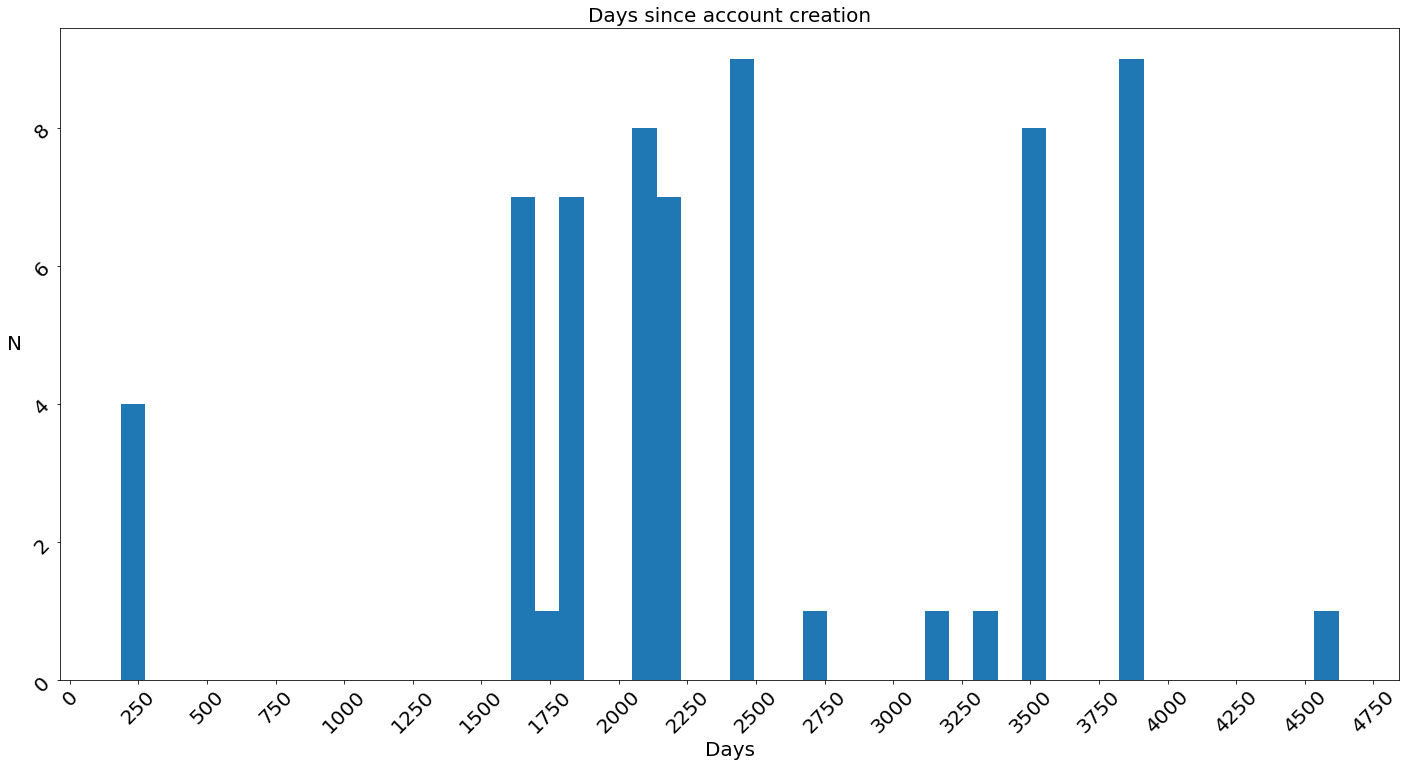

None
Displaying 1 of 1 matches:
eason Russia has not done a Full mobilization or used WMD Because if they did 
          ('Ukrainian', 'Flag', 'Colors', 'Personalized')               ('Flag', 'Colors', 'Personalized', 'Photo')          ('Colors', 'Personalized', 'Photo', 'Christmas')        ('Personalized', 'Photo', 'Christmas', 'Ornament')                  ('Photo', 'Christmas', 'Ornament', 'is')                     ('Christmas', 'Ornament', 'is', '20')                           ('Ornament', 'is', '20', 'off')                              ('is', '20', 'off', 'Today')                            ('20', 'off', 'Today', 'Only')                          ('off', 'Today', 'Only', 'with')                         ('Today', 'Only', 'with', 'code')                  ('Only', 'with', 'code', 'SAVETHURSDAY')               ('with', 'code', 'SAVETHURSDAY', 'Ukraine')          ('code', 'SAVETHURSDAY', 'Ukraine', 'Ukrainian') ('SAVETHURSDAY', 'Ukraine', 'Ukrainian', 'ChristmasTree')    ('Ukraine', 'Ukr

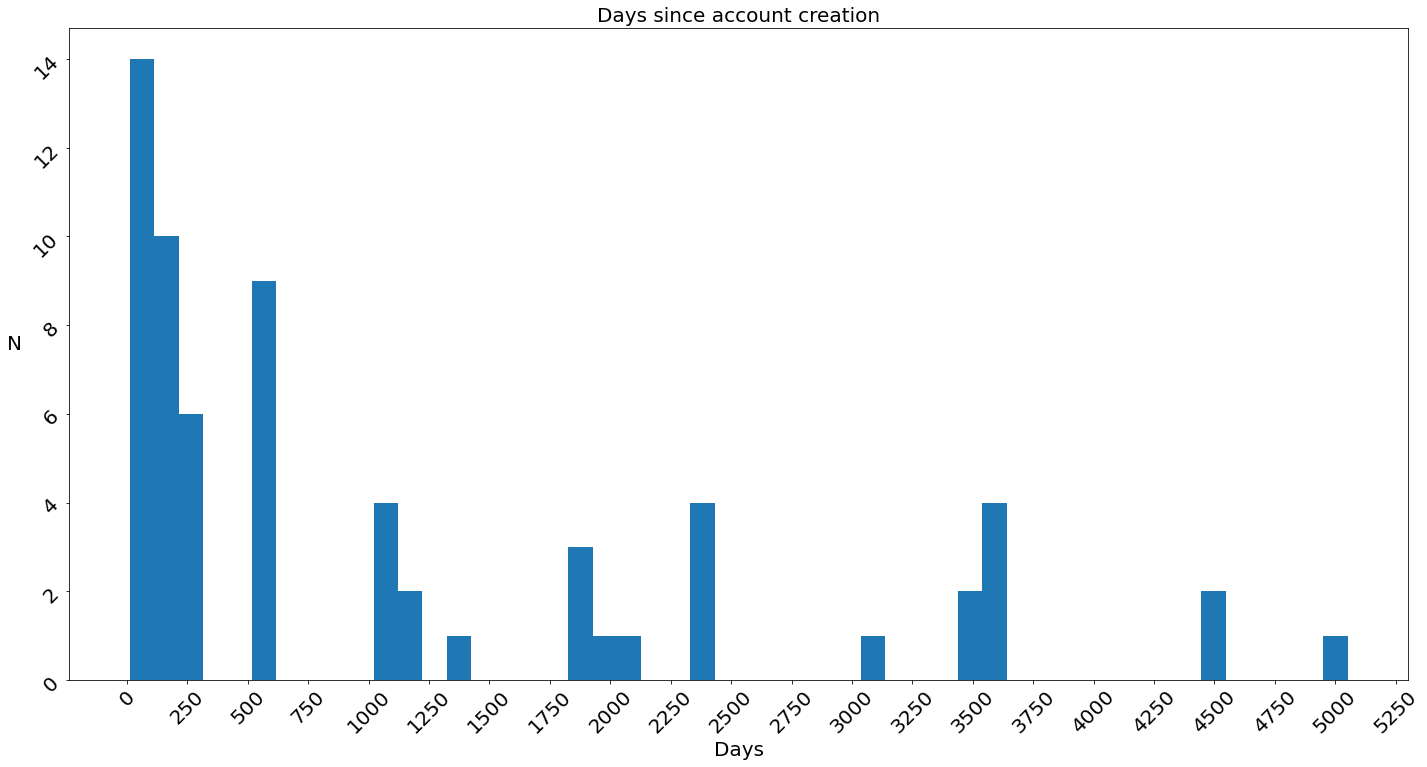

None
Displaying 12 of 12 matches:
sia vs Ukraine Day 211 After the Mobilization announced yesterday by Putin and
 the recruitment board after the mobilization announcement n nIn the US they s
e protesting against the partial mobilization called by Putin when there are t
ised speech announcing a partial mobilization of military reserves n n What s 
 the recruitment board after the mobilization announcement n nChechens go en m
ised speech announcing a partial mobilization of military reserves n n This mo
ised speech announcing a partial mobilization of military reserves n n Saddam 
ised speech announcing a partial mobilization of military reserves n n Crespo 
ised speech announcing a partial mobilization of military reserves n n Crespo 
ised speech announcing a partial mobilization of military reserves n n Donestk
 the recruitment board after the mobilization announcement n nChechens go en m
e protesting against the partial mobilization called by Putin when there are t
                  

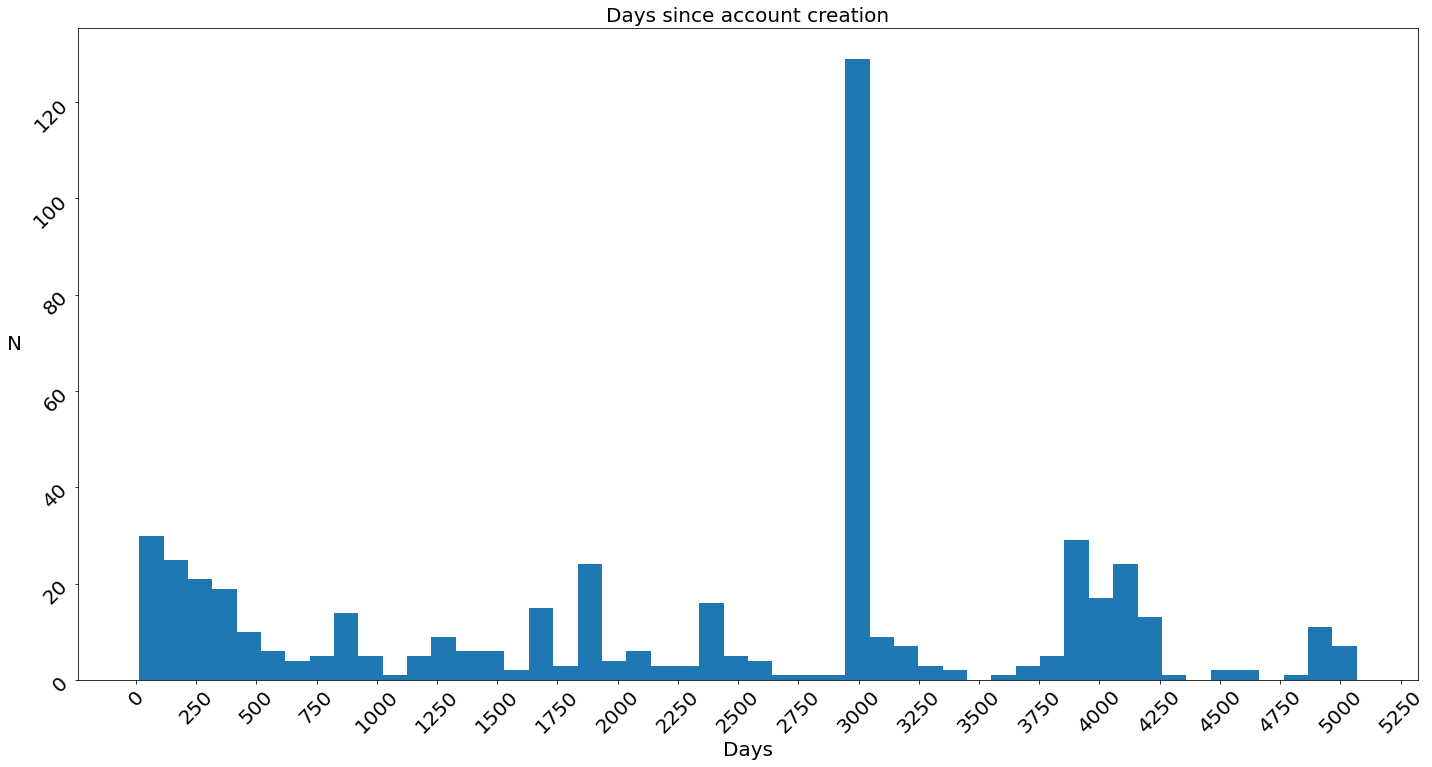

None
Displaying 25 of 60 matches:
itional call up of reservists no mobilization n nAnd even now it seems he s ly
ram Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
non fodder After Putin announced mobilization in Russia 90 of support for the 
ries n n RussiaIsATerroristState mobilization GenocideOfUkrainians It s not a 
forced onto buses after Russia s mobilization order n n RussiaInvadedUkraine U
imir Putin announced the partial mobilization of the country s citizens In ord
support the proposal for partial mobilization n war ukraine n Good Morning EU 
the country New escalation after mobilization Report n Huge queues 30 km long 
forced onto buses after Russia s mobilization order n n RussiaInvadedUkraine U
ssians after the announcement of mobilization nWe are not one nation Ukraine R
aine SlavaUkra ni GloryToUkraine mobilization This sight makes me sick Instead
sia Ukraine RussiaTerroristState mobilization war in ukraine RussiaInvadedUkra
forced onto buses 

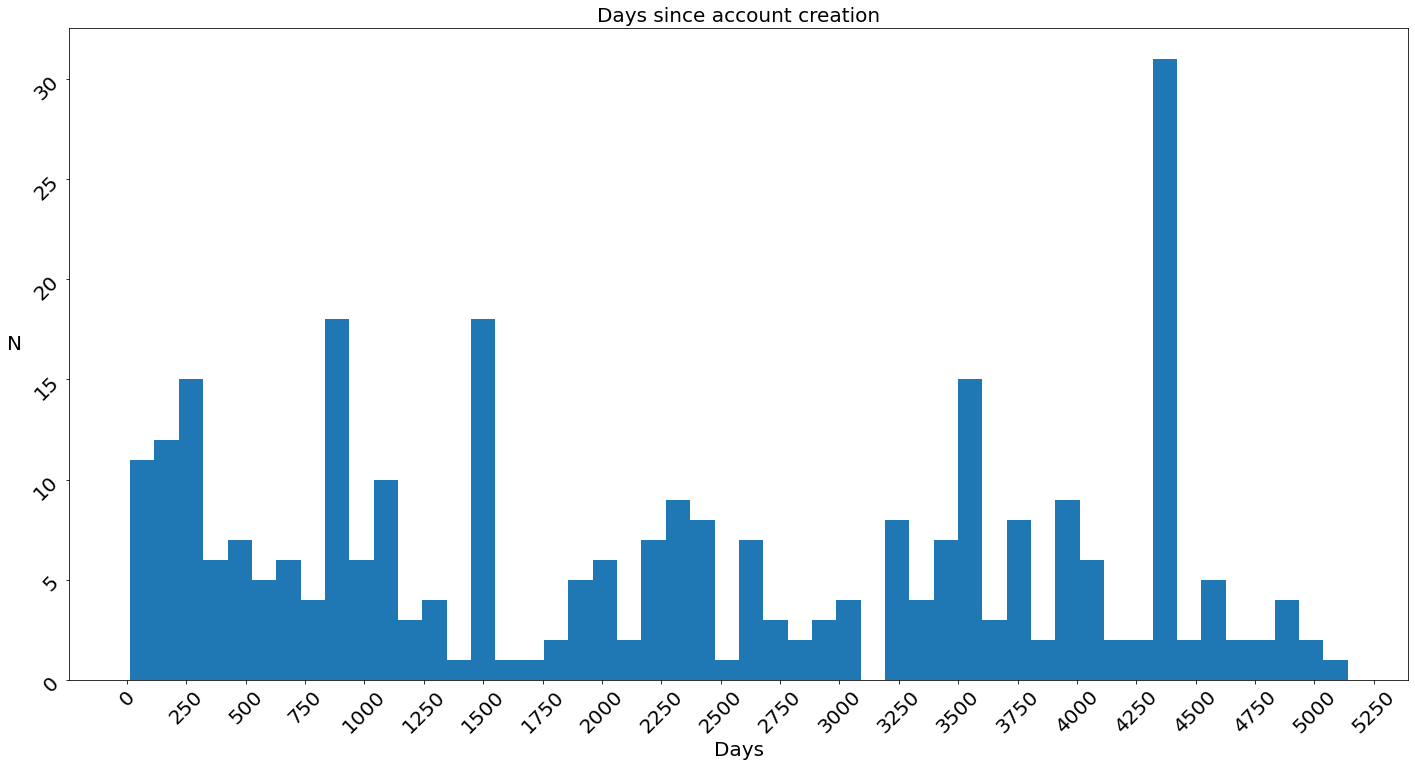

None
Displaying 8 of 8 matches:
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
quipment Click here and help The mobilization in Russia is going to lead to mo
vive Dear friends n nthe partial mobilization is the admission of Putin s defe
n of Ukraine putin s 300 000 men mobilization lots of useless cannon fodder as
eet protests against the partial mobilization policy announced by President Vl
ld be 3x higher Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
tin announced a partial military mobilization drafting up to 300 000 citizens 
    ('wouldn', 't', 'be', 'escalatory')         ('t', 'be', 'escalatory', 'It')       ('be', 'escalatory', 'It', 'was')        ('escalatory', 'It', 'was', 'n')          ('Do', 'you', 'trust', 'them')   ('They', 'said', 'NATO', 'expansion') ('said', 'NATO', 'expansion', 'wouldn')    ('NATO', 'expansion', 'wouldn', 't')      ('expansion

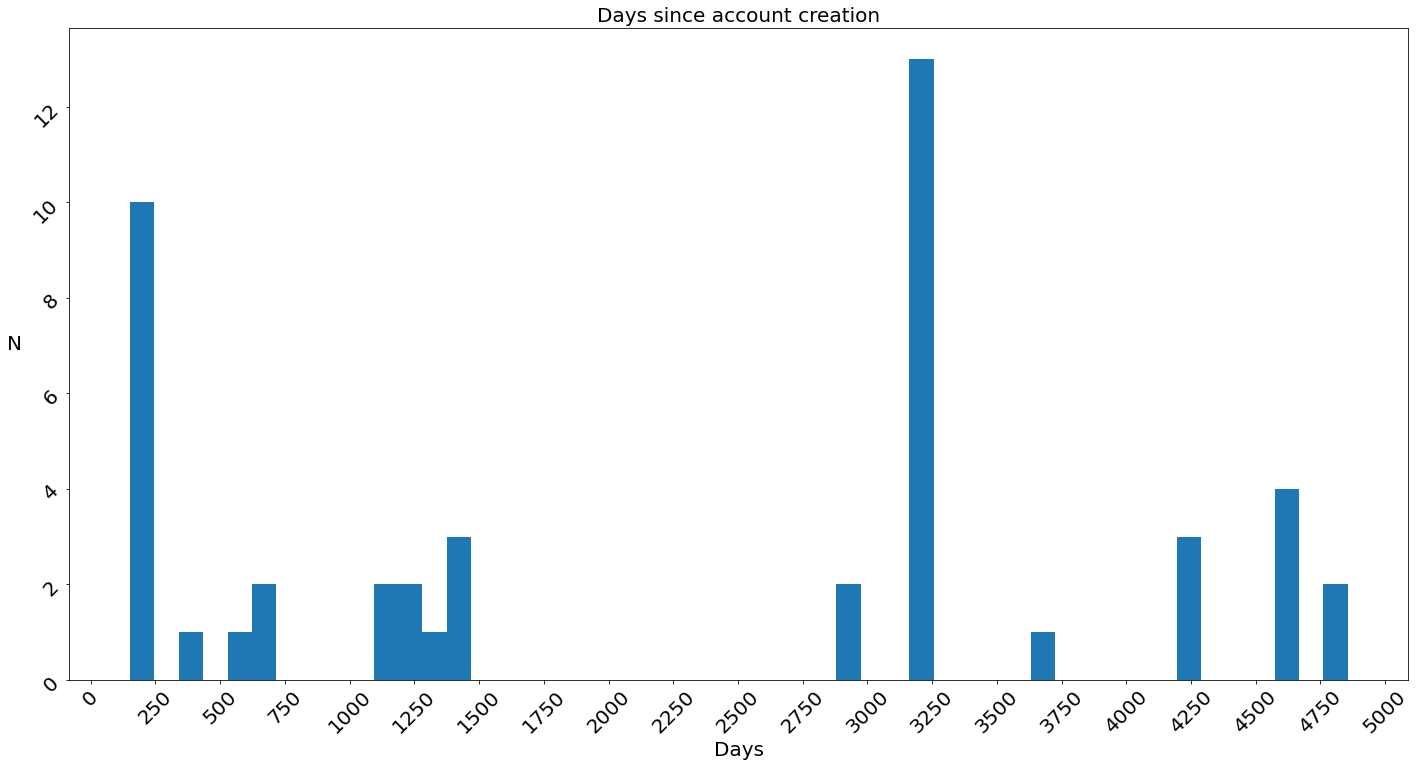

None
Displaying 2 of 2 matches:
 AFAIK It s only the 3rd general mobilization in history of Russia The two pre
stead of helping win the war the mobilization could be yet another of Putin s 
      ('For', 'many', 'Russian', 'Putin')         ('many', 'Russian', 'Putin', 's')     ('Russian', 'Putin', 's', 'decision')          ('Putin', 's', 'decision', 'to')           ('s', 'decision', 'to', 'call')          ('decision', 'to', 'call', 'up')               ('to', 'call', 'up', '300')              ('call', 'up', '300', '000')          ('up', '300', '000', 'military')  ('300', '000', 'military', 'reservists') ('000', 'military', 'reservists', 'came')  ('military', 'reservists', 'came', 'as')         ('reservists', 'came', 'as', 'a')              ('came', 'as', 'a', 'shock')               ('as', 'a', 'shock', 'nIn')              ('a', 'shock', 'nIn', 'the')            ('shock', 'nIn', 'the', 'big')           ('nIn', 'the', 'big', 'cities')           ('the', 'big', 'cities', 'the')           ('

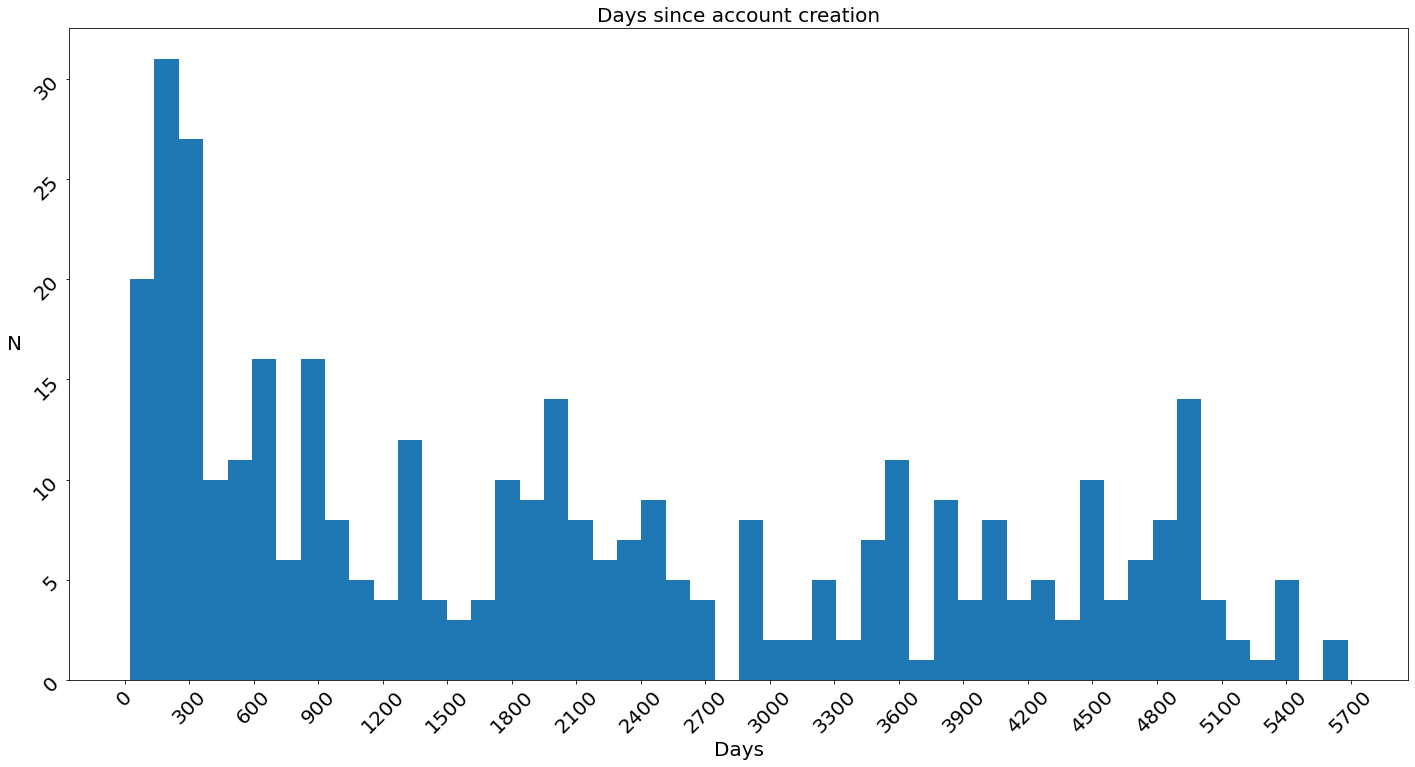

None
Displaying 25 of 46 matches:
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
map Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
 Zaporizhzhia nuclear plant Anti mobilization protests in Russia are not neces
ghway protesting against Putin s mobilization U can t make this stuff up Biden
toward Ukraine as reinforcements Mobilization Anything can happen now We must 
eace to Ukraine Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 s hardly there Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
raine before the announcement of mobilization Spoiler not at all n Russians fi
earted attempts to rally against mobilization Still the scale of such rallies 
te to justify future attacks and mobilization of troops for russian law Glory 
her Everything I v

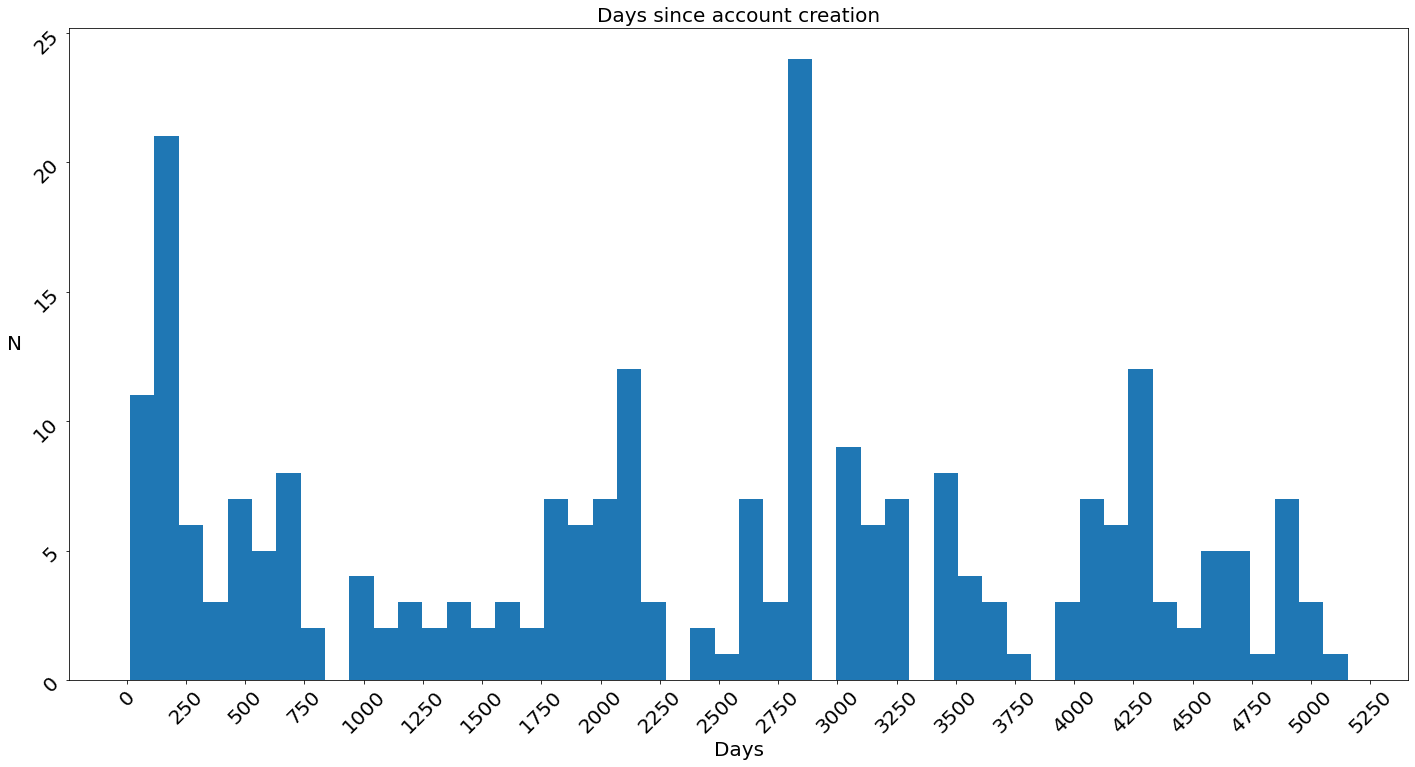

None
Displaying 25 of 30 matches:
e real number could be 3x higher Mobilization in Russia Day 2 UkraineRussiaWar
 In latter he emphasized partial mobilization but former says nothing about th
y n We spoke to Russians fleeing mobilization and protesters who were handed n
ns are trying to escape from the mobilization announced by Putin n nAt the sam
 of large drones to Ukraine Anti mobilization protests in Russia are not neces
 in support of Russia s military mobilization Ukraine FM Dmytro Kuleba on Serg
ING Putin secretly orders larger mobilization of a million soldiers to die in 
 n ncheck out Iran n nArrests As mobilization begins in Russia sold out flight
ING Putin secretly orders larger mobilization of a million soldiers to die in 
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly

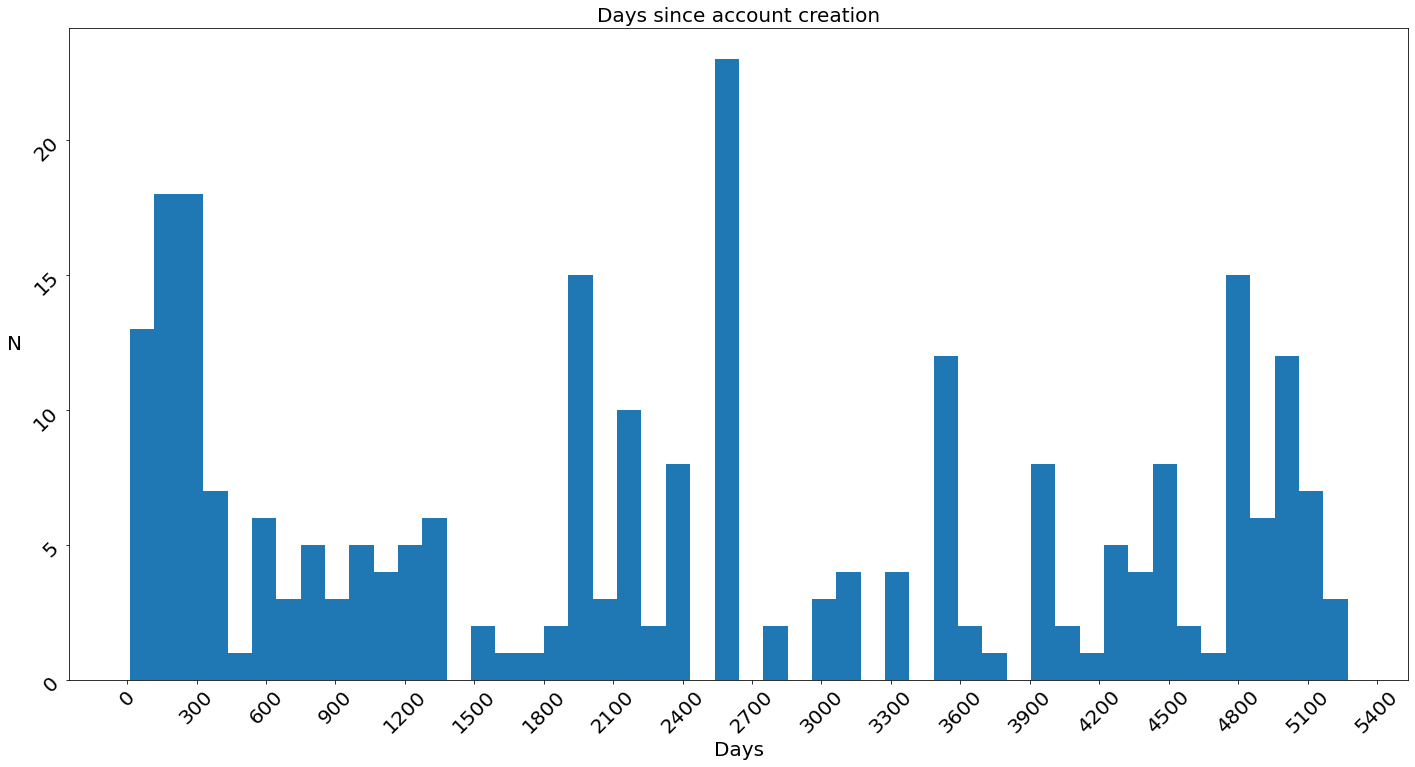

None
Displaying 20 of 20 matches:
ers Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
e I m looking at you etc Putin s mobilization self own Employees at the Khruni
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
orld 4 freedom Putin s announced mobilization of 300 000 reservists was jaw dr
Russia show just how quickly the mobilization is happening Less than 24 hours 
sident Vladimir Putin s military mobilization order in Ukraine and threats to 
ces fury in Russia over military mobilization and prisoner swap The Washington
 information It might be helpful Mobilization List of 305 925 names comprising
he country after Putin announced mobilization n nOther photos show Ukrainian w
of war crime 1 Putin s announced mobilization of 300 000 reservists was jaw dr
 n n EricTrumpDeposition Putin s mobilization self own Employees at the Khruni
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly

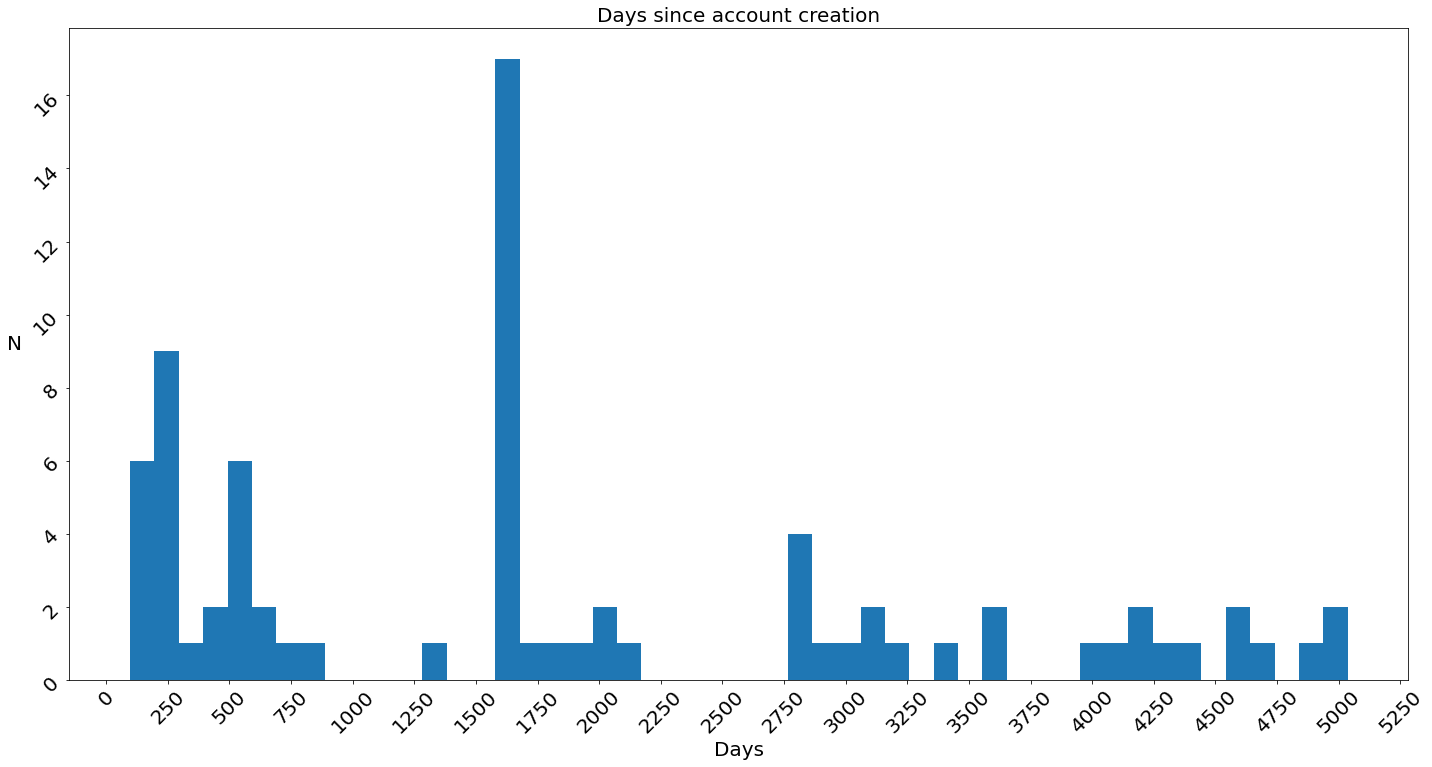

None
Displaying 13 of 13 matches:
Does russia support mobilization to Ukraine n nI think those noob
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partial mobilization in Russia n nPlease dm comment b
s stuck in the system of partia

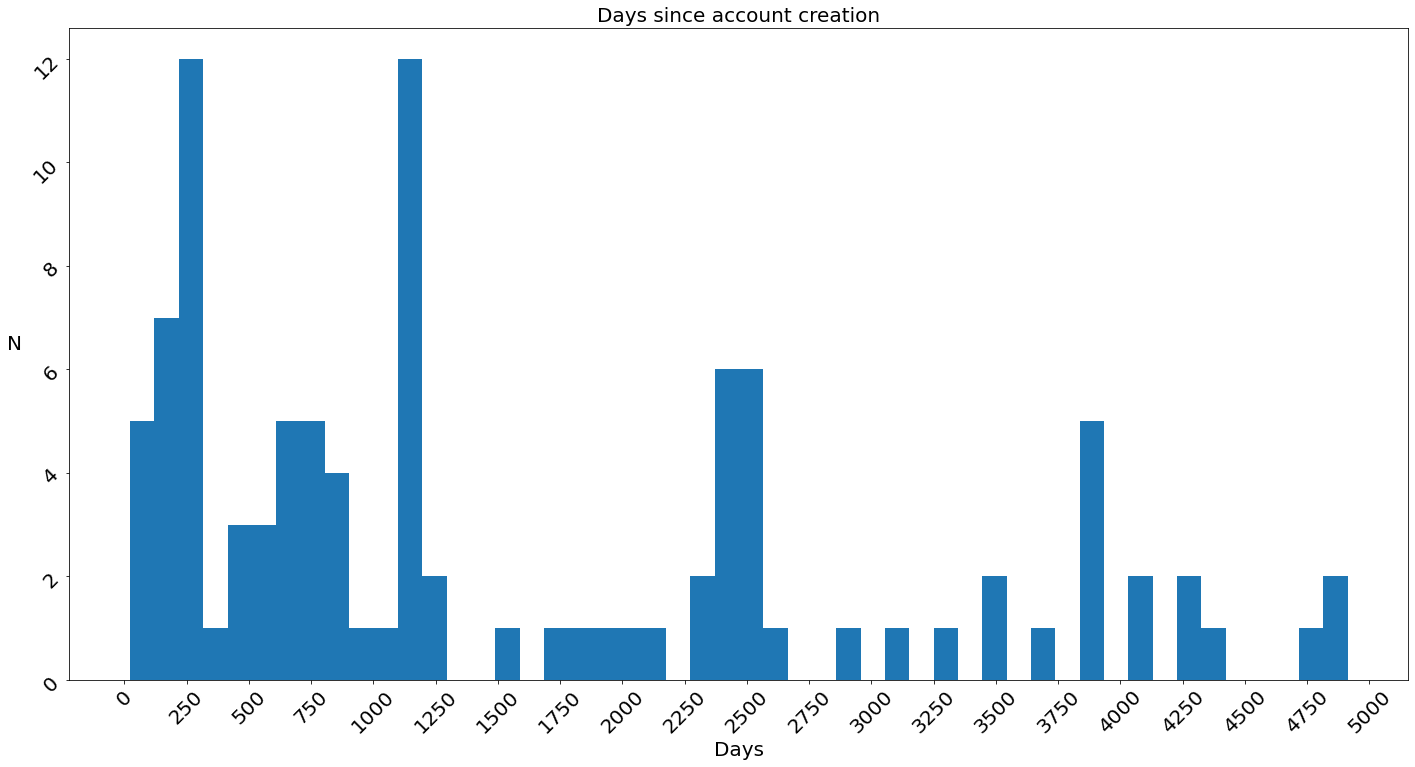

None
Displaying 11 of 11 matches:
monstrations against the partial mobilization announced by Vladimir Putin to s
secret part of Putin s decree on mobilization states that Russia can draft up 
ain thing that Putin achieved by mobilization is for the world to see that Rus
ent Vladimir Putin announced the mobilization of 300 000 reservists for the wa
a after the protests against the mobilization of 300 thousand reservists decre
 en masse after Putin s call for mobilization Like the free expression that th
 Putin s decision on the partial mobilization of Russian civilians a mistake W
tin are back in Russia after the mobilization of reservists for the war in Ukr
 Putin s decision on the partial mobilization of Russian civilians a mistake a
 Putin s decision on the partial mobilization of Russian civilians a mistake F
 Putin s decision on the partial mobilization of Russian civilians a mistake
     ('Like', 'the', 'free', 'expression')      ('the', 'free', 'expression', 'that')      ('free',

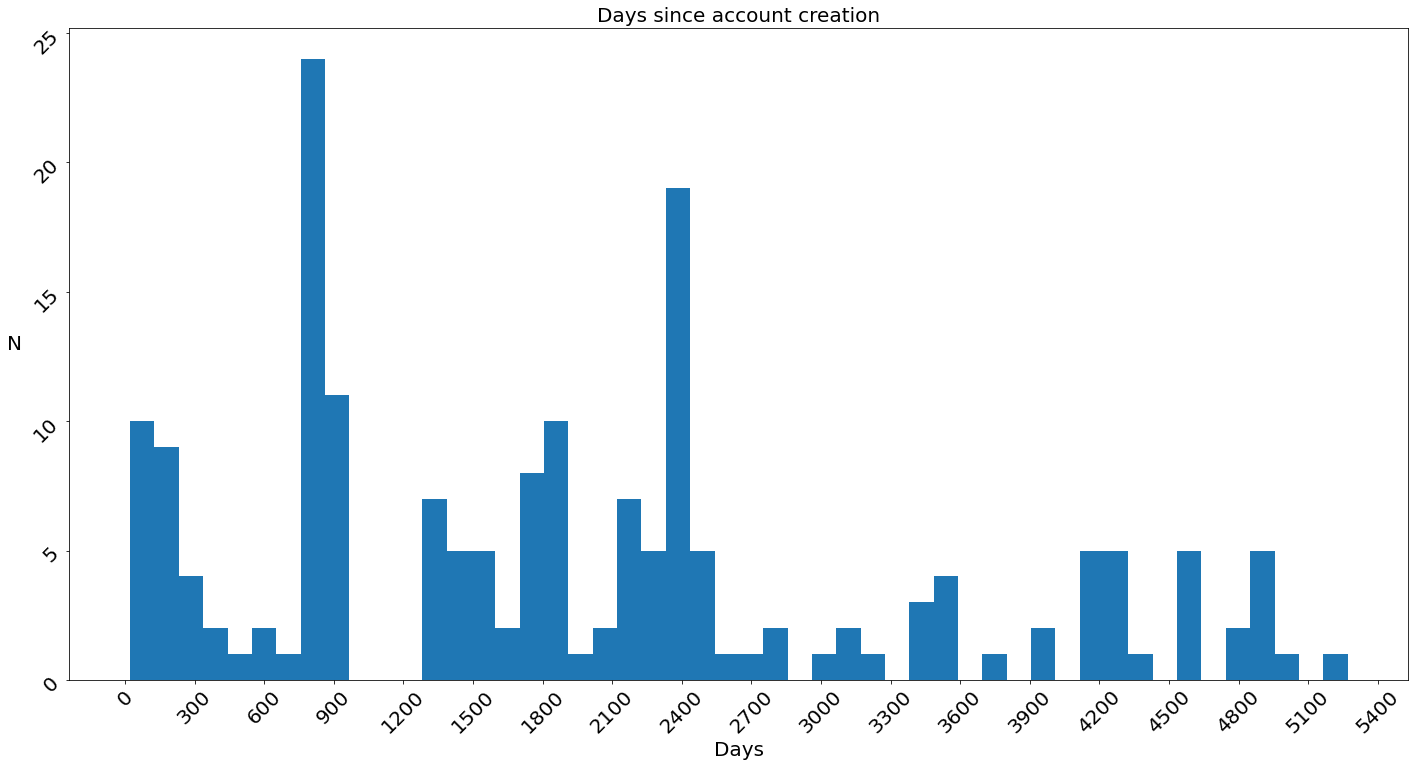

None
Displaying 13 of 13 matches:
ow how to play humor n n Partial mobilization in Russia is a bad and wrong ste
Vladimir Putin announces partial mobilization for Russian citizens Vlad mirPut
Ukraine Ukraine UkraineRussiaWar mobilization UkraineWar ukrainecounteroffensi
adimir Putin announces a partial mobilization in a major escalation of his war
 Welcome to Ukraine suka Partial mobilization in Russia today the Ukraine war 
Vladimir Putin announces partial mobilization for Russian citizens Vlad mirPut
Ukraine Ukraine UkraineRussiaWar mobilization UkraineWar ukrainecounteroffensi
in wont survive this winter This mobilization is certain death Ukraine is like
Vladimir Putin announces partial mobilization for Russian citizens Vlad mirPut
Ukraine Ukraine UkraineRussiaWar mobilization UkraineWar ukrainecounteroffensi
n Russia is thrilled with a mass mobilization n n one in Moscow turn out the l
ng Ukraine ends Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

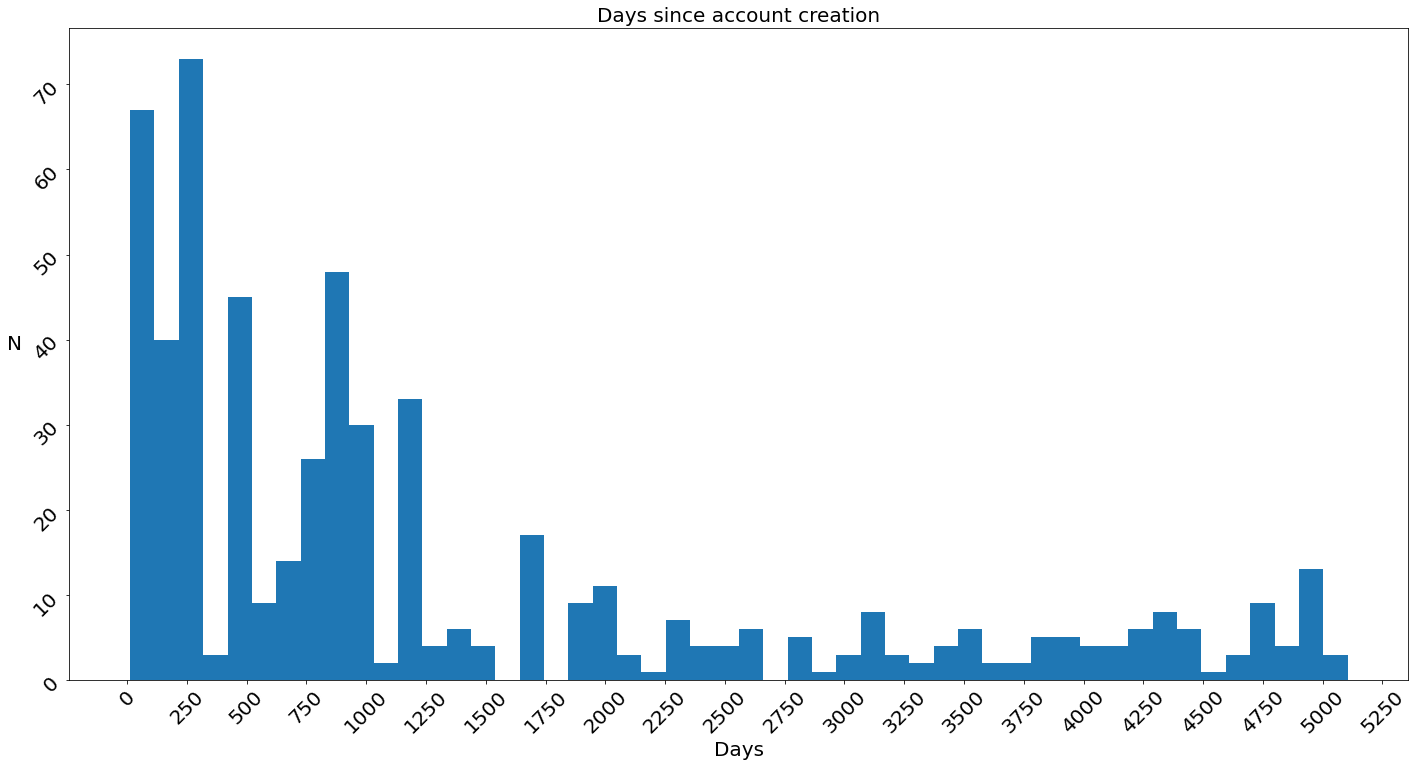

None
Displaying 25 of 66 matches:
w to protest Does russia support mobilization to Ukraine Large numbers of mili
to us after the unlawful partial mobilization criminal decree was announced Ha
ounced on September 21 a partial mobilization of the national reserve army man
inking about it Putin s military mobilization and nuclear threats represent an
ost Russia Says Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 true n nThe nationwide military mobilization and his recent meeting with Xi i
ounced on September 21 a partial mobilization of the national reserve army man
to us after the unlawful partial mobilization criminal decree was announced On
ue As to the nationwide military mobilization and his recent meeting with Xi i
f pain n Putin launches military mobilization CCP calls for peace talks betwee
to us after the unlawful partial mobilization criminal decree was announced Tu
ue As to the natio

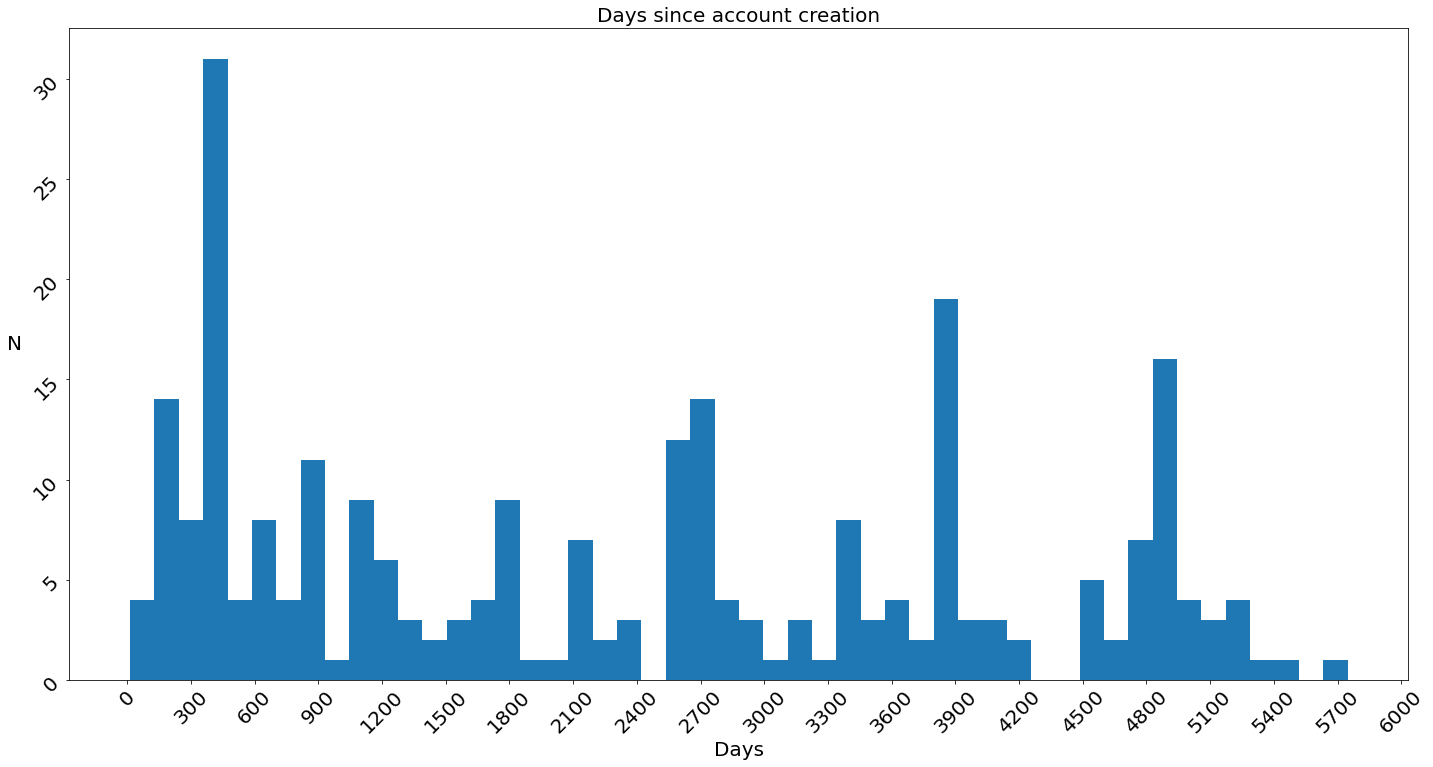

None
Displaying 8 of 8 matches:
ssia s announcement of a partial mobilization to escalate the Ukraine war unlo
 Yakutia for enlisting following Mobilization in Russia n Conditioned for War 
laration of the nation s partial mobilization Ukraine War n Already at least 1
a with the words for victory n n mobilization Except Ukraine is not fascist an
 the war They are protesting the mobilization They are OK with the war and Rus
l toll of Ukraine s shelling The mobilization of 300 000 Russian soldiers to t
ine Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
s in Russia Putin Orders Partial Mobilization and Issues Nuclear Warning US Bo
         ('nEurope', 'buy', 'from', 'US')   ('Europe', 'funded', 'Ukraine', 'gave') ('funded', 'Ukraine', 'gave', 'sanction')     ('Ukraine', 'gave', 'sanction', 'to')      ('gave', 'sanction', 'to', 'Russia')         ('sanction', 'to', 'Russia', 'n')          ('to', 'Russia', 'n', 'nRussia')     ('Russia', 'n', 'nRussia', 'stopped') 

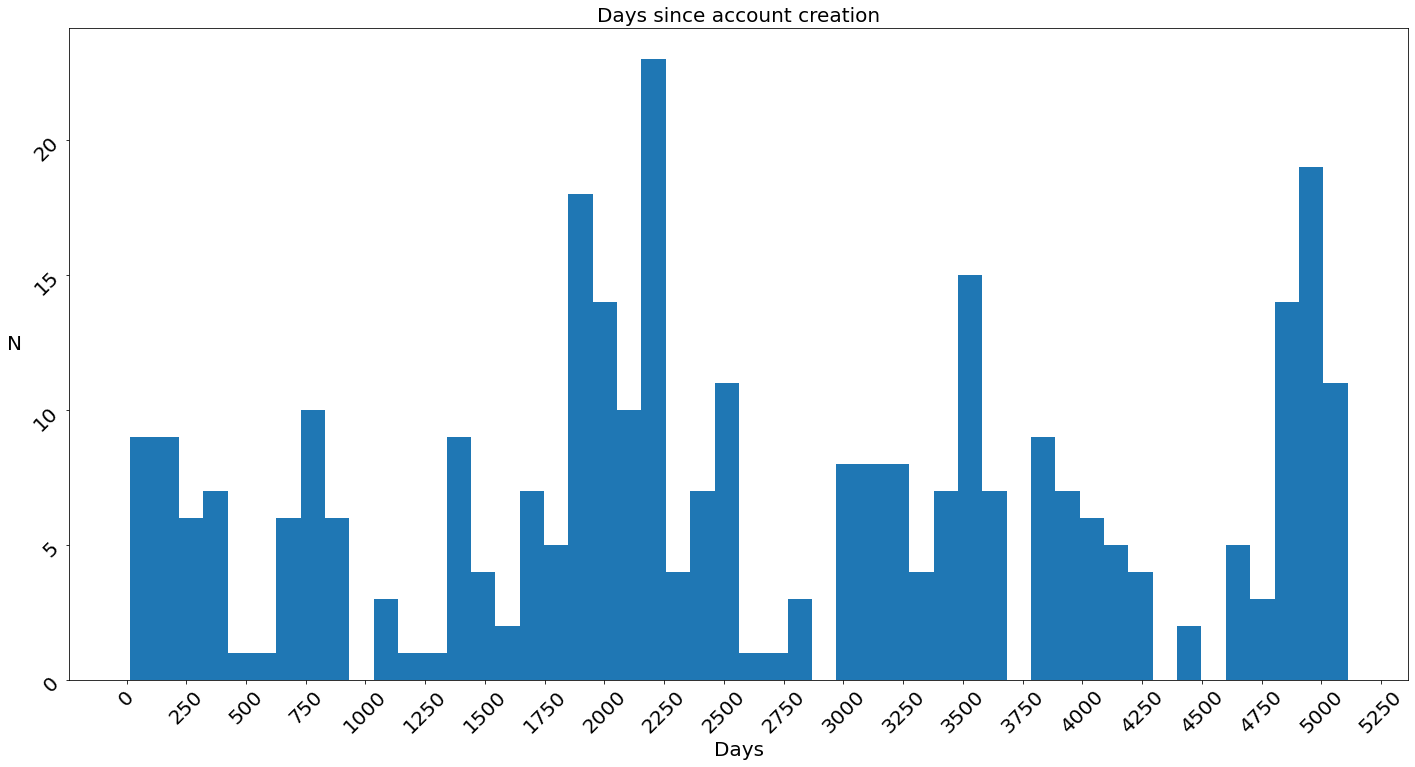

None
Displaying 25 of 32 matches:
s Pro War celebrated the Partial Mobilization on Twitter n nLess than 2 hours 
er he receives a Convocation for Mobilization n nHe then immediately switches 
ths Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
nce Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
Yes in many areas it is full 100 mobilization Putin pulled a fast one on his o
e v Russia Cartoon Russia orders mobilization for Putin s disastrous Ukraine i
ging its hands over the need for mobilization for the sake of the motherland s
rrifying n Putin s cannibalistic mobilization List of 103 Gazprom employees th
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
d the rhetorical confines of its mobilization campaign n Finnish border guards
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly

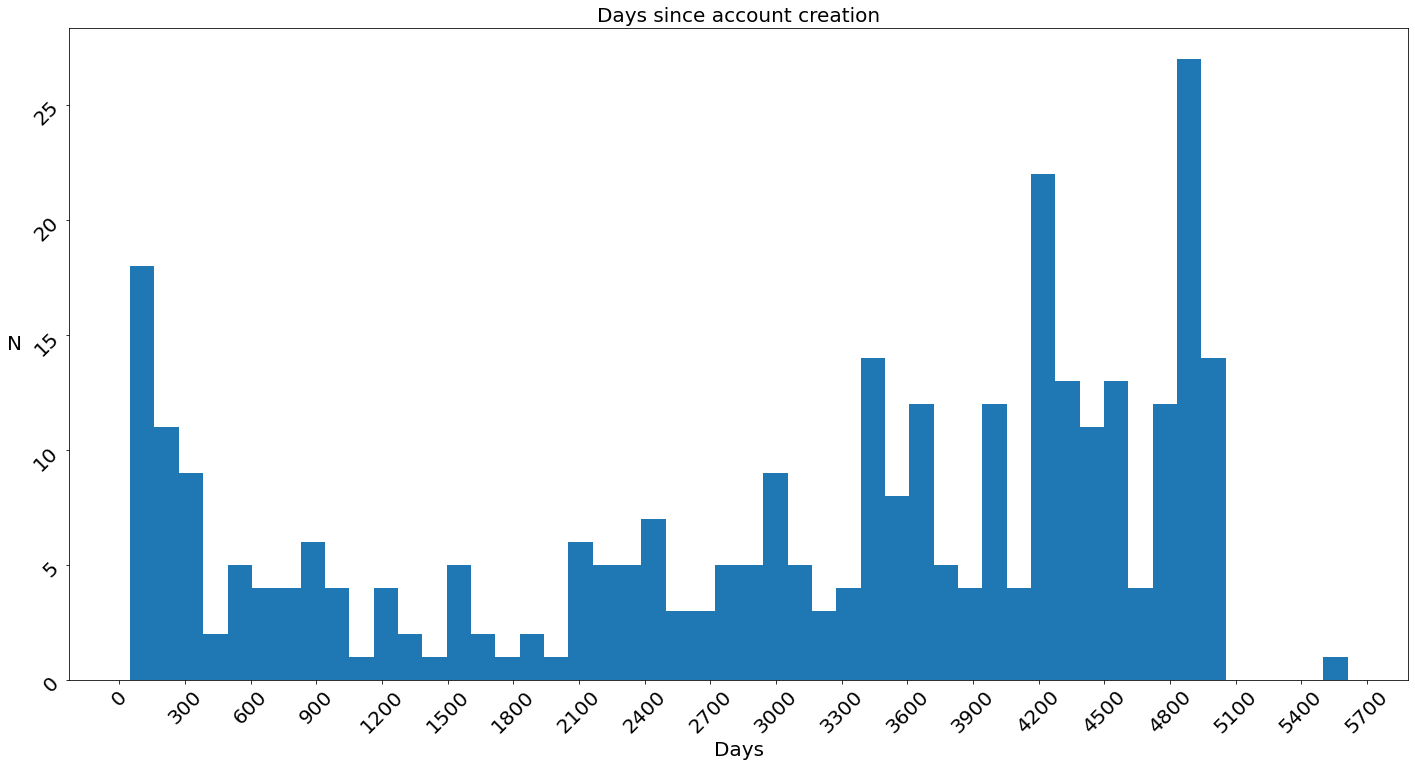

None
Displaying 13 of 13 matches:
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
g Ukraine ends Putin s announced mobilization of 300 000 reservists was jaw dr
at does Putin s partial military mobilization mean for Central Asian migrants 
Russia sends to Ukraine n nTotal mobilization also includes oligarchs at least
 en masse after Putin s call for mobilization they must stay to obey putin the
 at protests against the partial mobilization announced by President Putin say
ent Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
interests What does the military mobilization decreed by Putin imply Via nAs f
e coming in so far about Russian mobilization n n1 They are not sticking to Pu
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ne n nWEF What does the military mobilization decreed by Putin imply Via nAs f
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ING Putin secretly

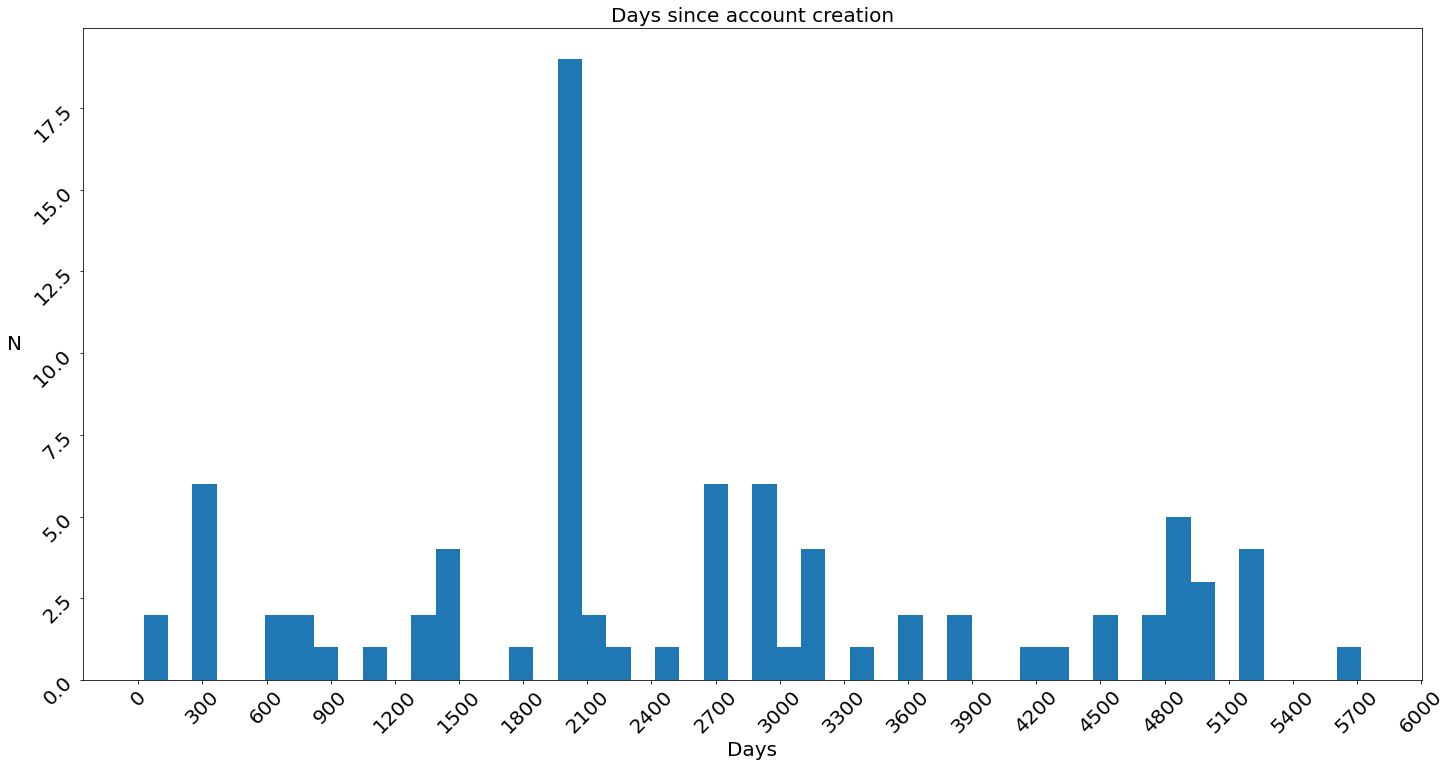

None
Displaying 4 of 4 matches:
mir Putin is declaring a partial mobilization of forces in Ukraine Russia expe
f resistance to Russia s partial mobilization measures Congrats to Turkey Sinc
mes Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
nexed by Russia Horrific Partial mobilization Russia Russia Anonymous n nThe U
    ('Why', 'is', 'President', 'Putin')  ('is', 'President', 'Putin', 'upping') ('President', 'Putin', 'upping', 'the')      ('Putin', 'upping', 'the', 'ante')          ('upping', 'the', 'ante', 'n')               ('the', 'ante', 'n', 'n')                ('ante', 'n', 'n', 'He')              ('n', 'n', 'He', 'really')            ('n', 'He', 'really', 'has')           ('He', 'really', 'has', 'to')         ('really', 'has', 'to', 'look')           ('has', 'to', 'look', 'like')            ('to', 'look', 'like', 'he')           ('look', 'like', 'he', 'has')            ('like', 'he', 'has', 'got')            ('he', 'has', 'got', 'some')       ('has'

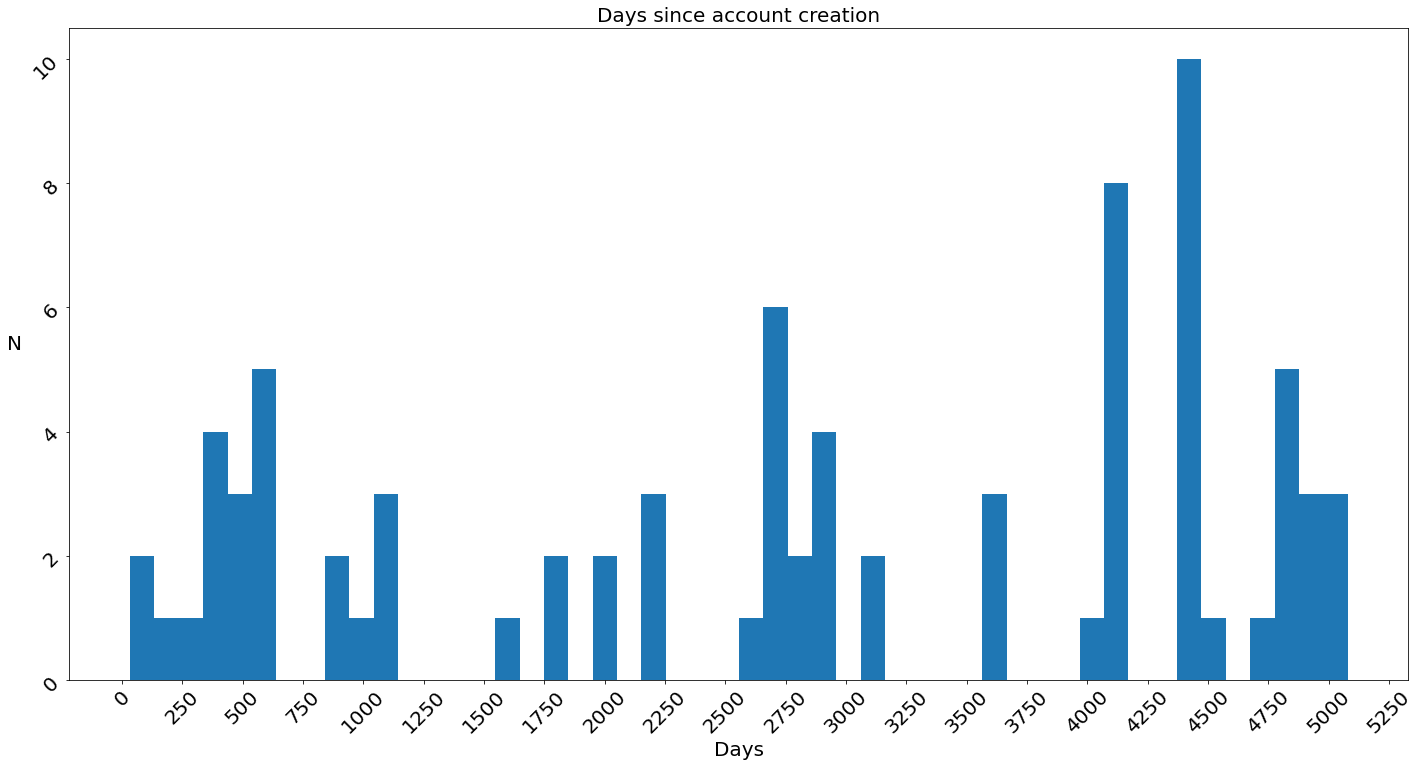

None
no matches
        ('a', 'dangerous', 'monster', 'who')               ('get', 'us', 'all', 'killed')          ('Our', 'new', 'Prime', 'Minister')     ('new', 'Prime', 'Minister', 'approved')  ('Prime', 'Minister', 'approved', 'nearly')   ('Minister', 'approved', 'nearly', '300m')         ('approved', 'nearly', '300m', 'of')          ('nearly', '300m', 'of', 'exports')            ('300m', 'of', 'exports', 'with')       ('of', 'exports', 'with', 'potential') ('exports', 'with', 'potential', 'military')     ('with', 'potential', 'military', 'use')       ('potential', 'military', 'use', 'to')          ('military', 'use', 'to', 'Russia')            ('use', 'to', 'Russia', 'before')            ('to', 'Russia', 'before', 'the')      ('Russia', 'before', 'the', 'invasion')          ('before', 'the', 'invasion', 'of')         ('the', 'invasion', 'of', 'Ukraine')           ('invasion', 'of', 'Ukraine', 'n') 
                                           6                                       

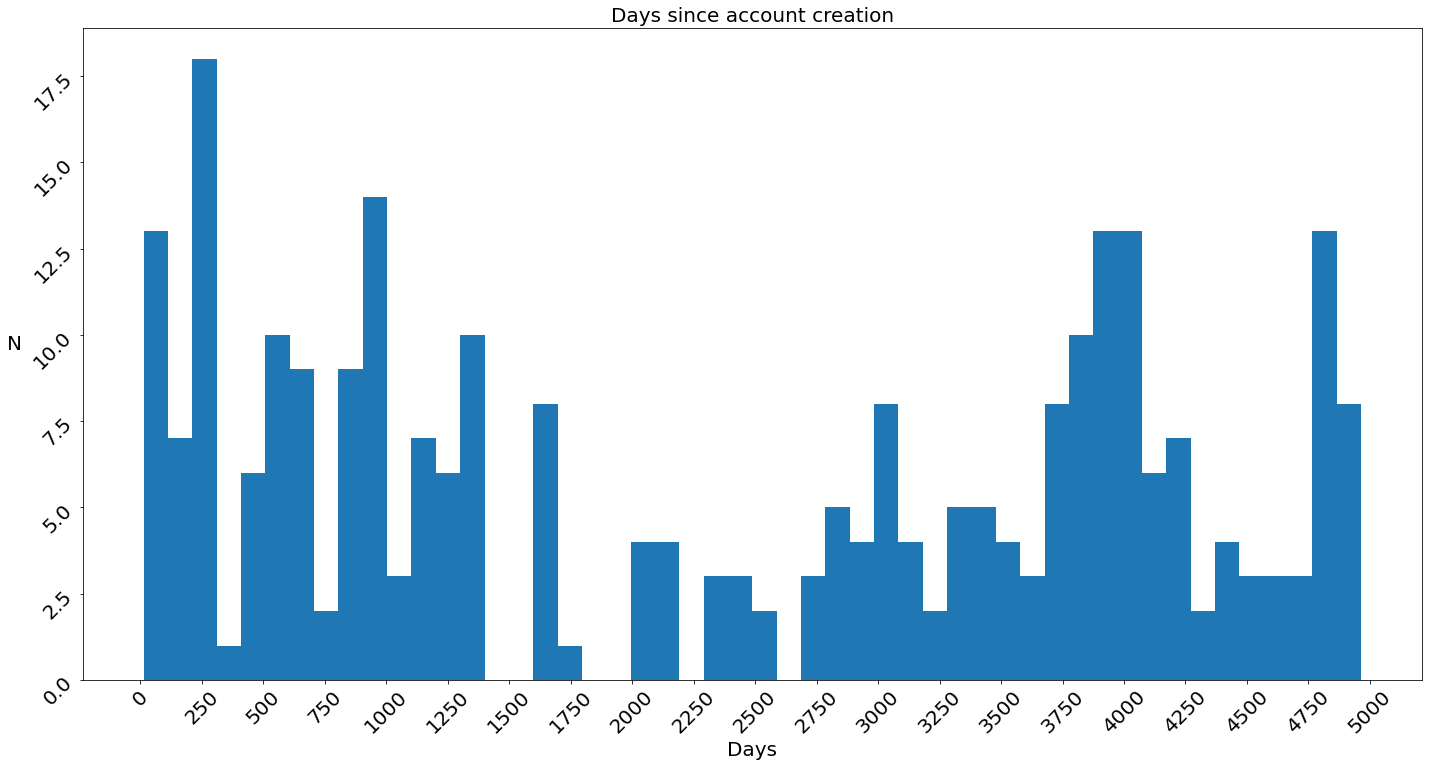

None
Displaying 24 of 24 matches:
eet protests against the partial mobilization policy announced by President Vl
 effect n nArmies need logistics Mobilization in Russia Day 2 UkraineRussiaWar
n is right we should all declare mobilization The only Serbian official who ha
ghway protesting against Putin s mobilization Saying that if Russia uses nukes
le I suggest that he also allows mobilization from Russia s client states He e
n policy ever since I m watching mobilization videos photos from Russia and I 
s This reminds me on Milosevic s mobilization in Serbia while protecting his e
omputer According to her partial mobilization in Russia requires a reassessmen
n people I suggest he also allow mobilization from Russia s client countries H
lear plant After Putin announced mobilization in Russia 90 of support for the 
lics than in Moscow I m watching mobilization videos photos from Russia and I 
s This reminds me on Milosevic s mobilization in Serbia while protecting his e
 The same old stor

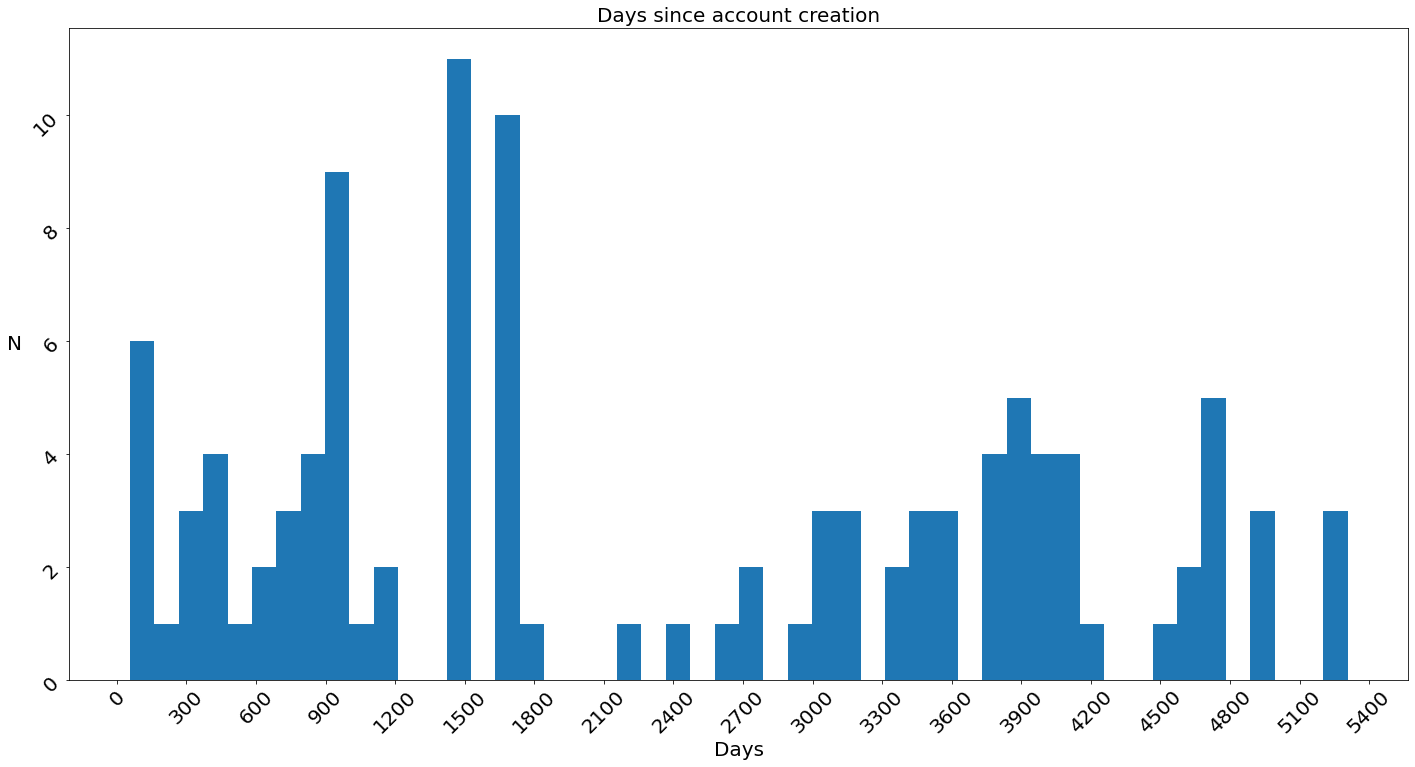

None
no matches
      ('With', 'your', 'reluctance', 'to')      ('your', 'reluctance', 'to', 'allow')    ('reluctance', 'to', 'allow', 'either')      ('to', 'allow', 'either', 'fracking') ('allow', 'either', 'fracking', 'nuclear')    ('either', 'fracking', 'nuclear', 'or')   ('fracking', 'nuclear', 'or', 'further')      ('nuclear', 'or', 'further', 'North')          ('or', 'further', 'North', 'Sea')   ('further', 'North', 'Sea', 'expansion')         ('North', 'Sea', 'expansion', 'n')           ('Sea', 'expansion', 'n', 'nIt')         ('expansion', 'n', 'nIt', 'seems')              ('n', 'nIt', 'seems', 'like')            ('nIt', 'seems', 'like', 'you')            ('seems', 'like', 'you', 'are')          ('like', 'you', 'are', 'forcing')            ('you', 'are', 'forcing', 'us')             ('are', 'forcing', 'us', 'to')            ('forcing', 'us', 'to', 'rely') 
                                        13                                         13                                      

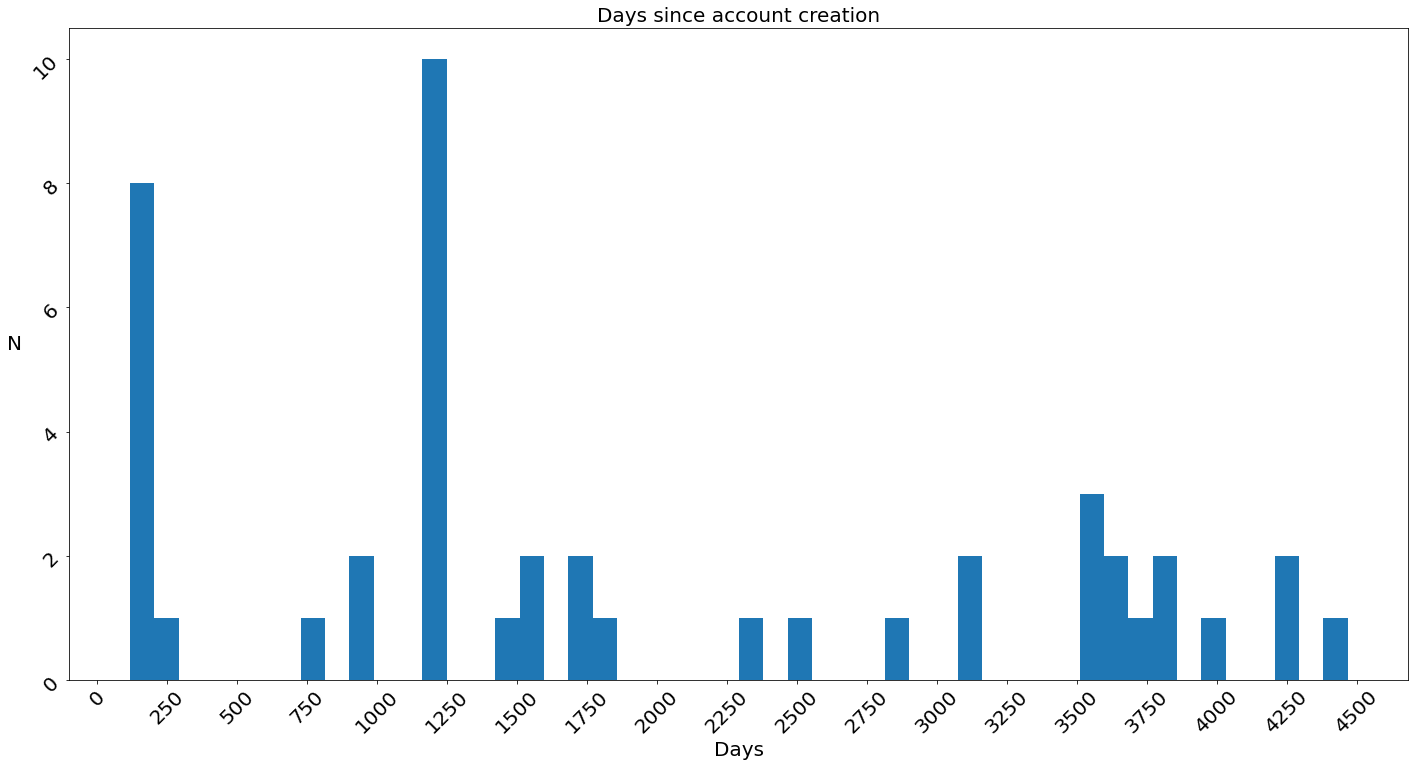

None
Displaying 4 of 4 matches:
e RUSSIA Big protests in against mobilization This is in Arbat central Moscow 
WarCrimes After the beginning of mobilization in Russia we have nearly 2 month
portionally Putin probably meant mobilization differently Non stop hypocrisy N
 from Russia nA young man during mobilization at the recruiting office Questio
                ('who', 'do', 'not', 'wish')                  ('do', 'not', 'wish', 'to')                   ('don', 't', 'want', 'to')      ('tank', 'deliveries', 'to', 'Ukraine')         ('deliveries', 'to', 'Ukraine', 'n')                  ('to', 'Ukraine', 'n', 'n')          ('Anyone', 'who', 'opposes', 'the')           ('who', 'opposes', 'the', 'Putin')        ('opposes', 'the', 'Putin', 'system')             ('the', 'Putin', 'system', 'is')              ('Putin', 'system', 'is', 'on')                ('system', 'is', 'on', 'the')                 ('is', 'on', 'the', 'right')               ('on', 'the', 'right', 'side')         ('the', 'right

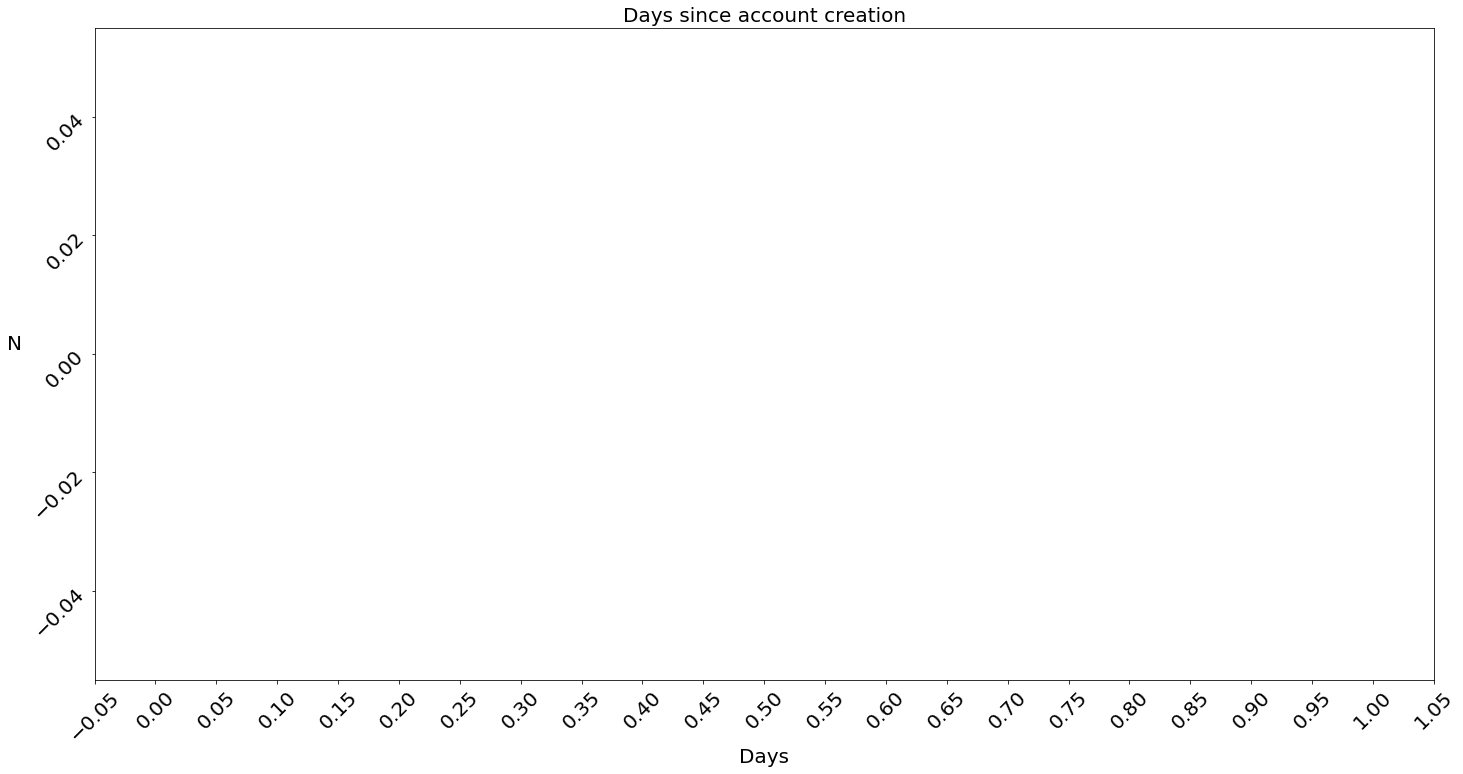

None
no matches


ValueError: ignored

In [ ]:
# analyse communities with under 1000 members. Don't consider retweets
path = '/content/drive/MyDrive/communities_ECG/'
for file in os.listdir(path):
  print(file)
  dataframe = pd.read_csv(path + file)
  if dataframe.shape[0] < 1000:
    analyse_community(dataframe, f'{path}{file}')




community138.csv
community87.csv
community417.csv
community385.csv
community428.csv
تو راهم                         0.228228
Earth Planet & 🇪🇺               0.093093
España                          0.078078
Islamic Republic of Iran        0.060060
رو ابرا                         0.057057
                                  ...   
Україна                         0.003003
Gothenburg, Sweden              0.003003
Vivo delante de mi ordenador    0.003003
موهای یوشی                      0.003003
Mays Chapel, MD                 0.003003
Name: author.location, Length: 76, dtype: float64


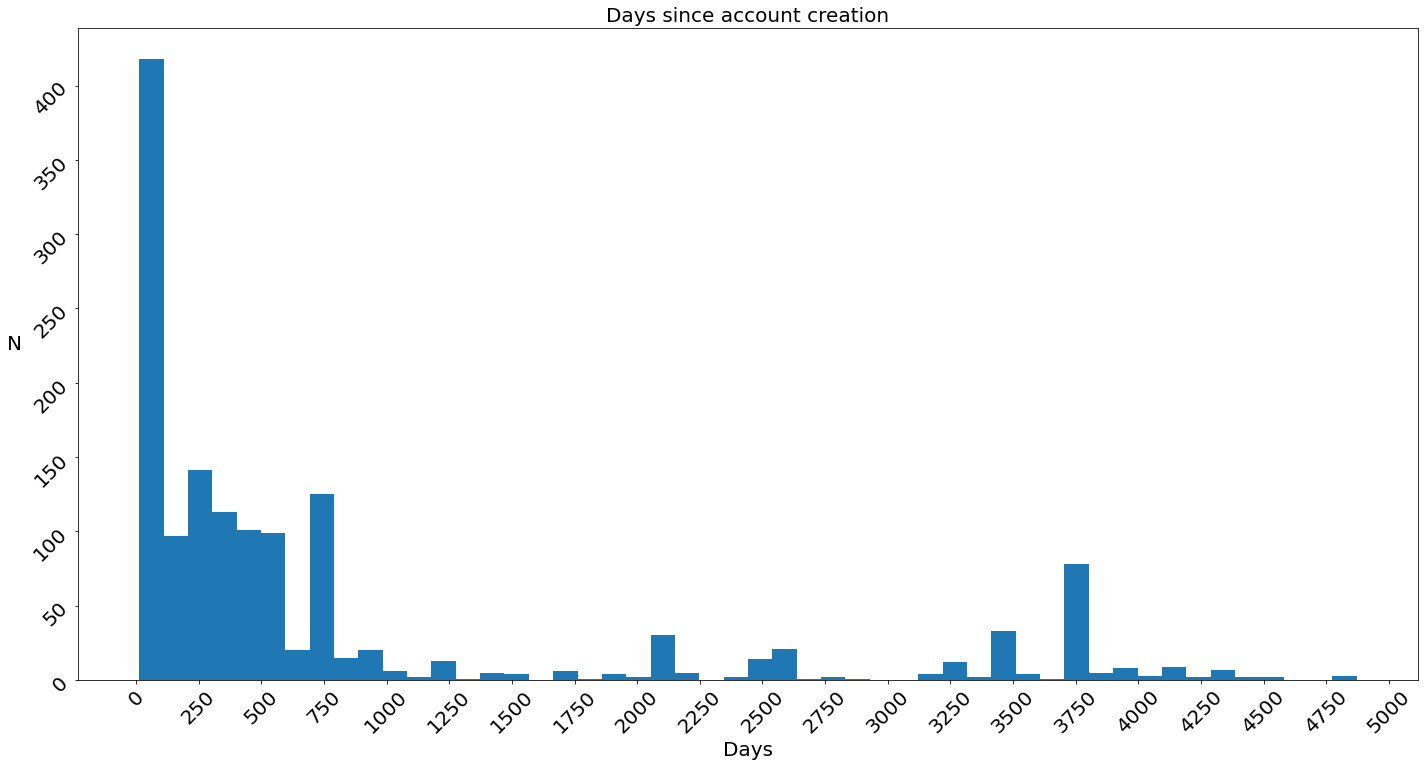

None
Displaying 19 of 19 matches:
o to war against Ukraine Putin s mobilization Conscripts in Moscow getting loa
ent Vladimir Putin announced the mobilization of 300 000 military reservists n
 the recruitment board after the mobilization announcement n nChechens go en m
 protesting against the military mobilization in Russia would be forced to enl
arrested in protests against the mobilization ordered by Putin in Russia Horiz
stroy our country We have a huge mobilization resource It is the resource of t
is includes activating a partial mobilization of Russians who are in the reser
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
g to need them Slava Ukraini The mobilization decreed by Putin is being a succ
at does Putin s partial military mobilization mean for Central Asian migrants 
ter Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
at least for me Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

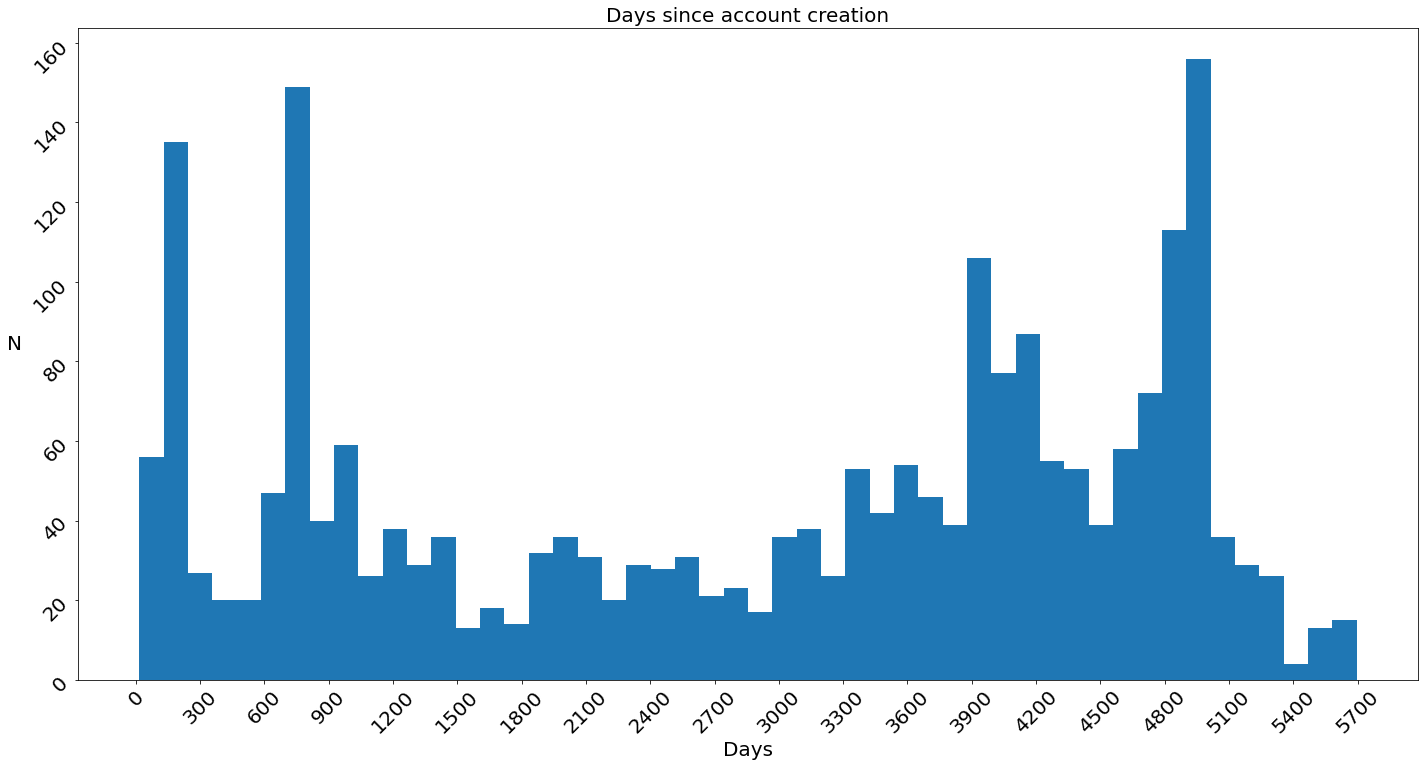

None
Displaying 25 of 609 matches:
rowing protests against military mobilization in St Petersburg Moscow Yekateri
Russia show just how quickly the mobilization is happening Less than 24 hours 
s Pro War celebrated the Partial Mobilization on Twitter n nLess than 2 hours 
er he receives a Convocation for Mobilization n nHe then immediately switches 
ine Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
s So with the combined effort of mobilization referendums and nuclear threats 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ication 1 n nA Putin s announced mobilization of 300 000 reservists was jaw dr
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
d pressure One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
 the official decree the way how mobilization is held in RU shows that Russia 
that Russia has t

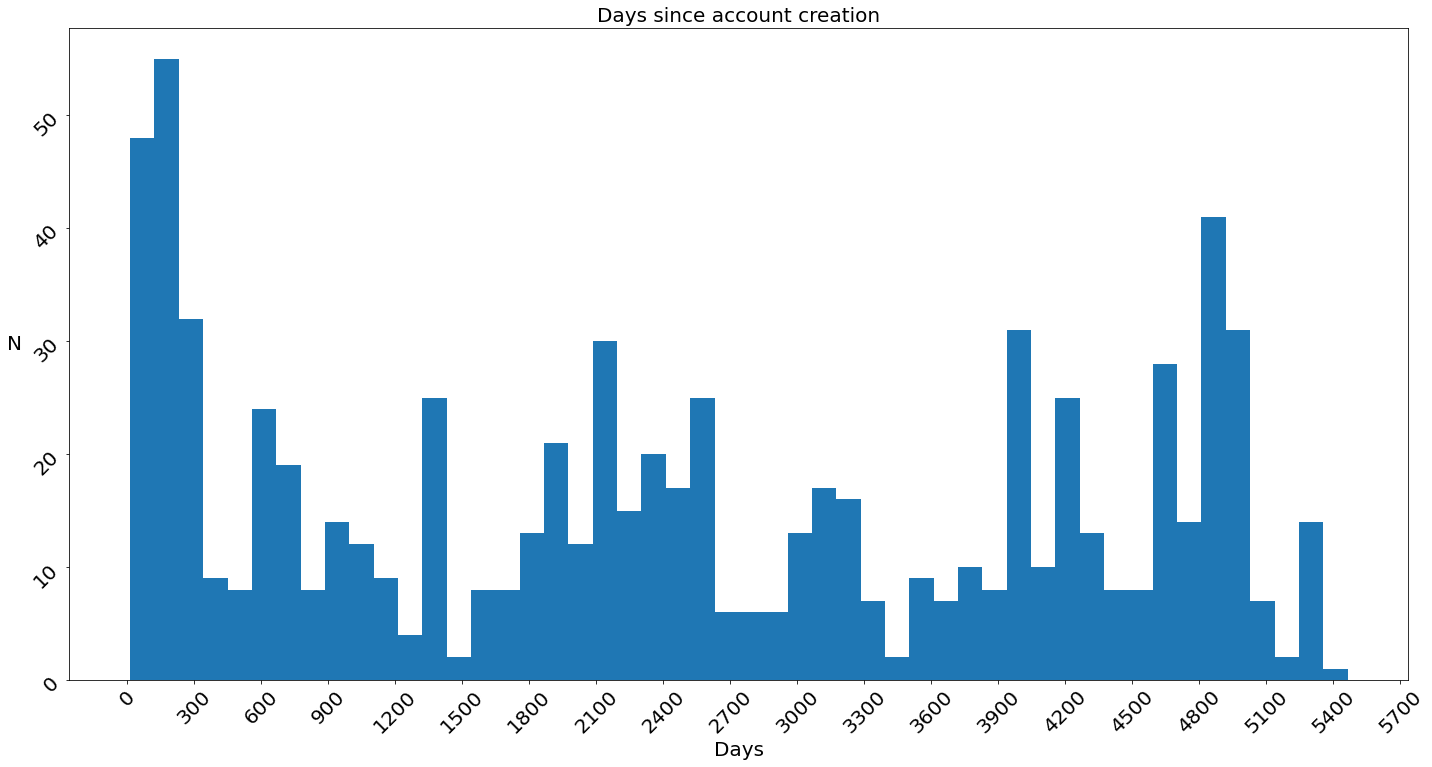

None
Displaying 25 of 73 matches:
 has ALREADY announced a partial mobilization in the Russian Federation NHe or
he war they are protesting it is mobilization they are against It s ok for som
 n nThey say this is to stop the mobilization buses from taking their men away
 do such a thing in this country Mobilization List of 305 925 names comprising
fog of war After Putin announced mobilization in Russia 90 of support for the 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
nouncement of a partial military mobilization n Zelensky For what reason is Ru
stead of helping win the war the mobilization could be yet another of Putin s 
eting People protest against the mobilization all over Russia Over 1600 arrest
ir Putin has announced a partial mobilization If you look closely the conscrip
eet protests against the partial mobilization policy announced by President Vl
ent on September 21 of a partial mobilization of up to 300 000 reservists to f
CSIS expert n nLea

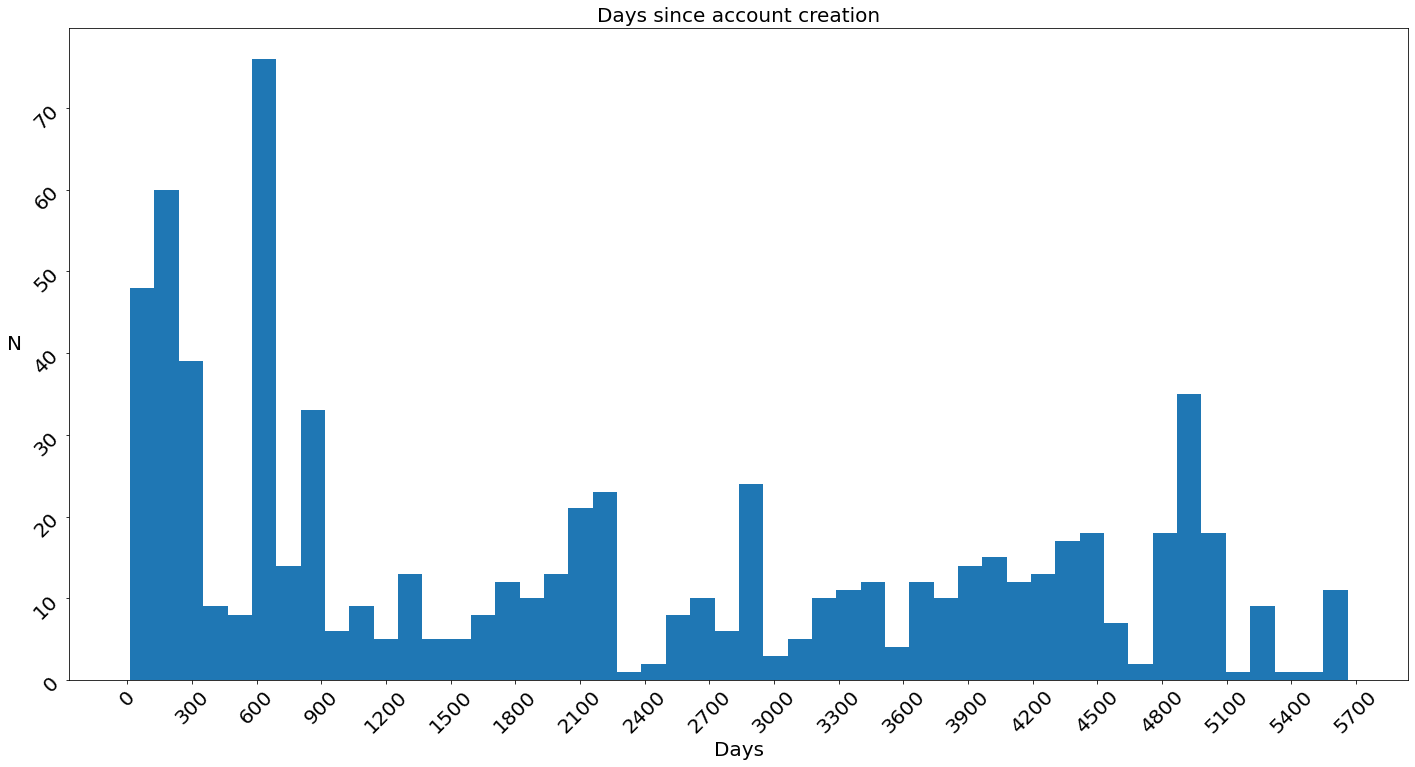

None
Displaying 25 of 49 matches:
ia fights smart Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
ING Putin secretly orders larger mobilization of a million soldiers to die in 
cording to One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
ING Putin secretly orders larger mobilization of a million soldiers to die in 
aces public anger in Russia over mobilization and prisoner swap The Washington
do But as plans go 5 x The Putin mobilization speech seems pretty much vaporwa
lee Russia after Putin announced mobilization of another 300 000 soldiers to b
the mayhem and horror of general mobilization in Russia Lavrov should be kicke
 announced the immediate partial mobilization of Russian citizens and threaten
hat speech or call

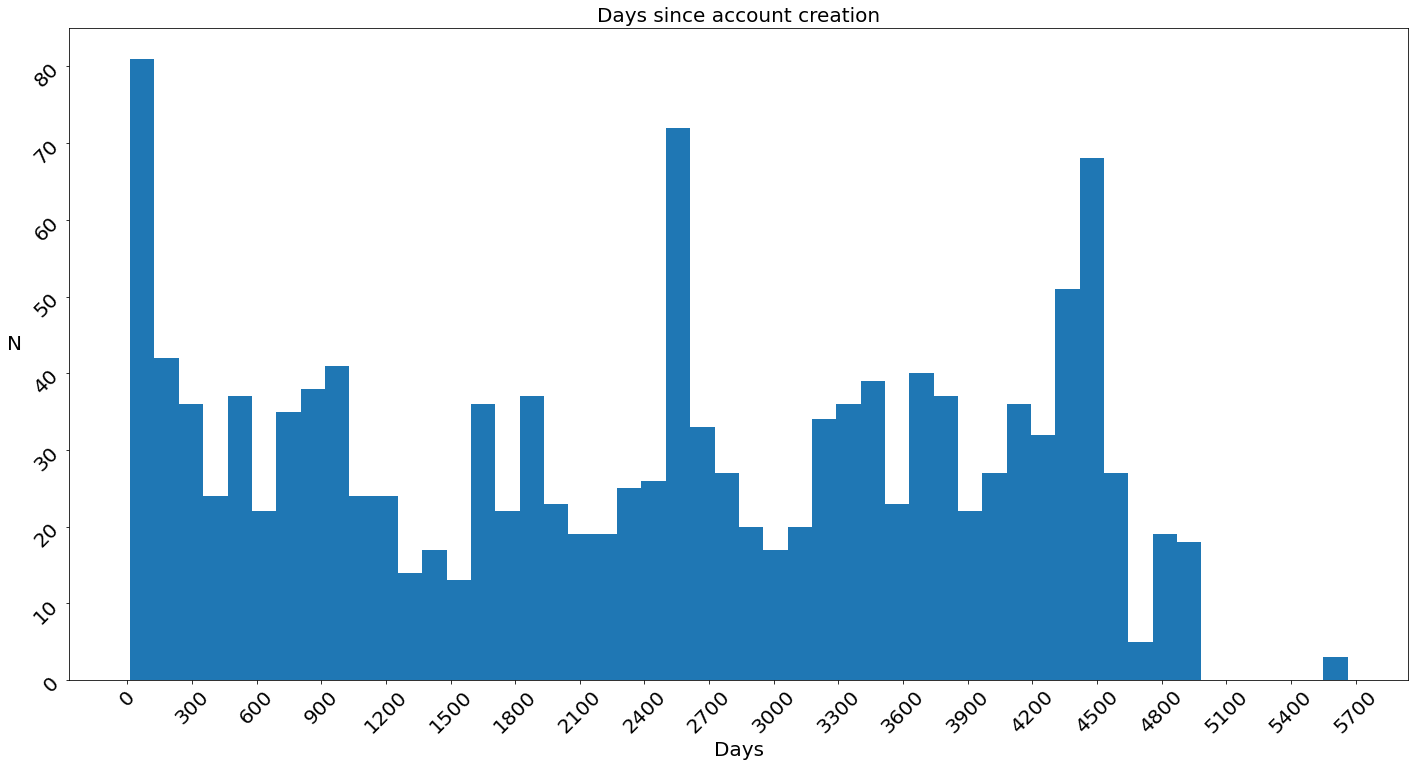

None
Displaying 25 of 48 matches:
woman who cries for the military mobilization of her friends I m lucky to be a
n out of tickets to flee Putin s mobilization order They buy no matter where t
ic cleansing More signs that the mobilization in Russia is far from partial Th
 en masse after Putin s call for mobilization While Western propaganda reports
flight of the Russians after the mobilization declared by Putin I share the in
s from Russia in the face of the mobilization ordered by Putin Flights out of 
 en masse after Putin s call for mobilization Are those crowds Russians wishin
 en masse after Putin s call for mobilization Russia s border crossing with Ge
 en masse after Putin s call for mobilization Bad week for Putin and the Ayato
 en masse after Putin s call for mobilization Faced with Putin s threat to use
 the recruitment board after the mobilization announcement n nIn the US they s
 en masse after Putin s call for mobilization Putin launched the forced recrui
s from Russia in t

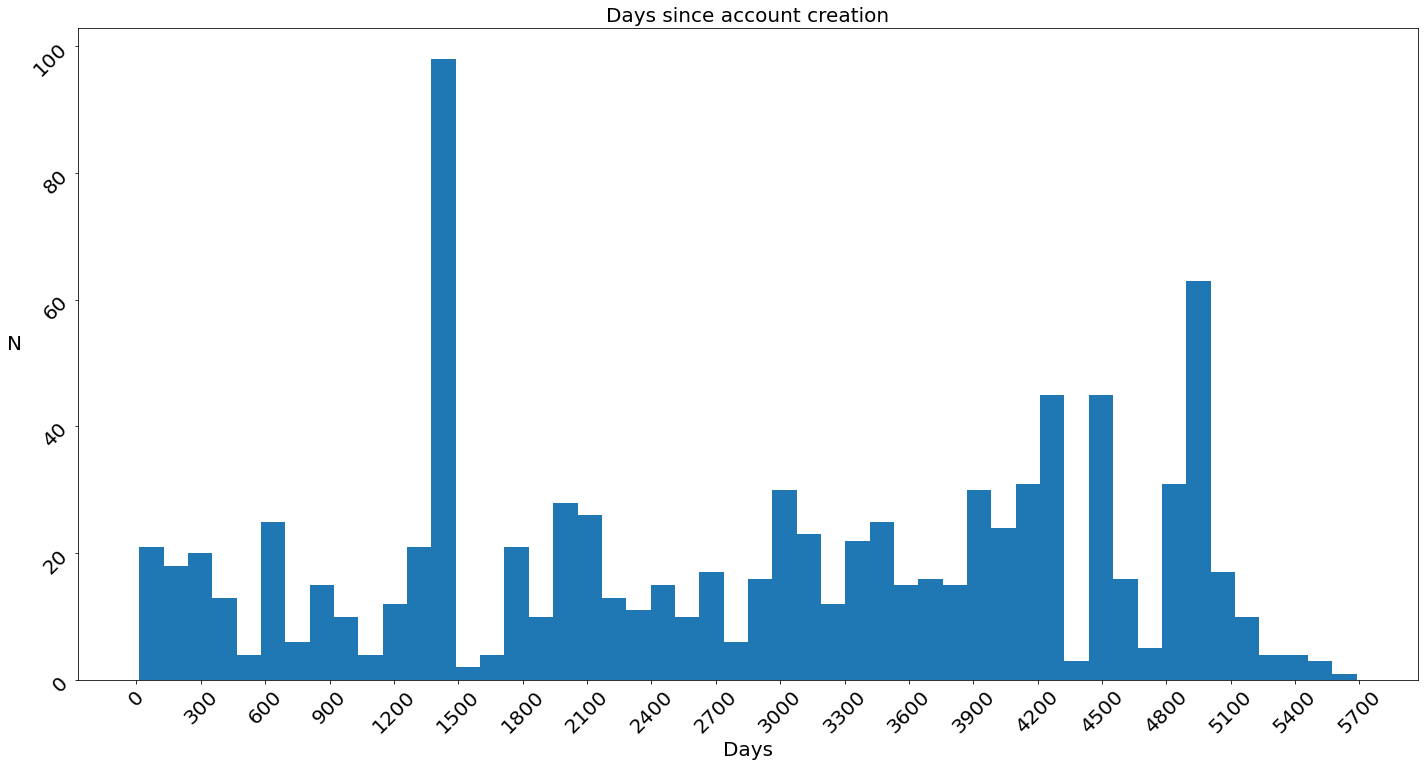

None
Displaying 25 of 217 matches:
ally in Russia Putin s announced mobilization of 300 000 reservists was jaw dr
ING Putin secretly orders larger mobilization of a million soldiers to die in 
r strategist 1 3 With the forced mobilization Ukraine Ukraine should share thi
 terror Russians feel in Ukraine mobilization Ukraine I am fine with it It is 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
didn t want to Putin s announced mobilization of 300 000 reservists was jaw dr
HIMARS targeting computer On why mobilization whether 300 000 or a million isn
gorod region 1 3 With the forced mobilization Ukraine Ukraine should share thi
ING Putin secretly orders larger mobilization of a million soldiers to die in 
4 from the novel 1984 Dystopia n Mobilization Putin dies and goes to hell Beca
at does Putin s partial military mobilization mean for Central Asian migrants 
ion of the Activity DraftSnowden Mobilization n n russia Earth Water Air Fire 
urs Everything I 

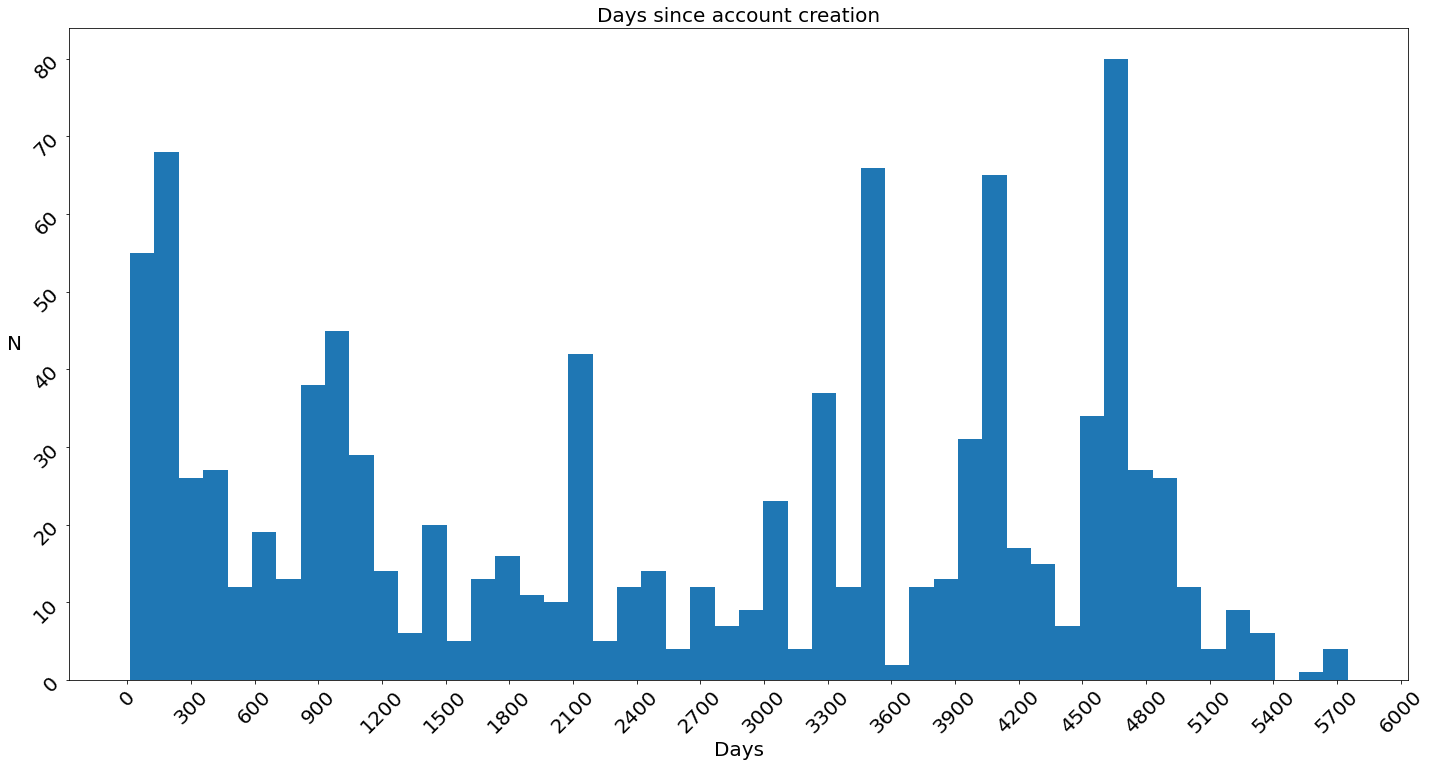

None
Displaying 25 of 86 matches:
One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
sult other than huge losses Anti mobilization protests in Russia are not neces
 have to be carried along On why mobilization whether 300 000 or a million isn
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
at does Putin s partial military mobilization mean for Central Asian migrants 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 needs to stand alone if Russian mobilization accures He s pro Ukraine war Haw
n nRead UK intelligence Russia s mobilization will be highly unpopular n nRuss
ire Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
de commited by russians It s not mobilization It s a special transfer to Ukrai
is town so Ukraine must win Anti mobilization protests in Russia are not neces
s you to die in Ukraine Aerof

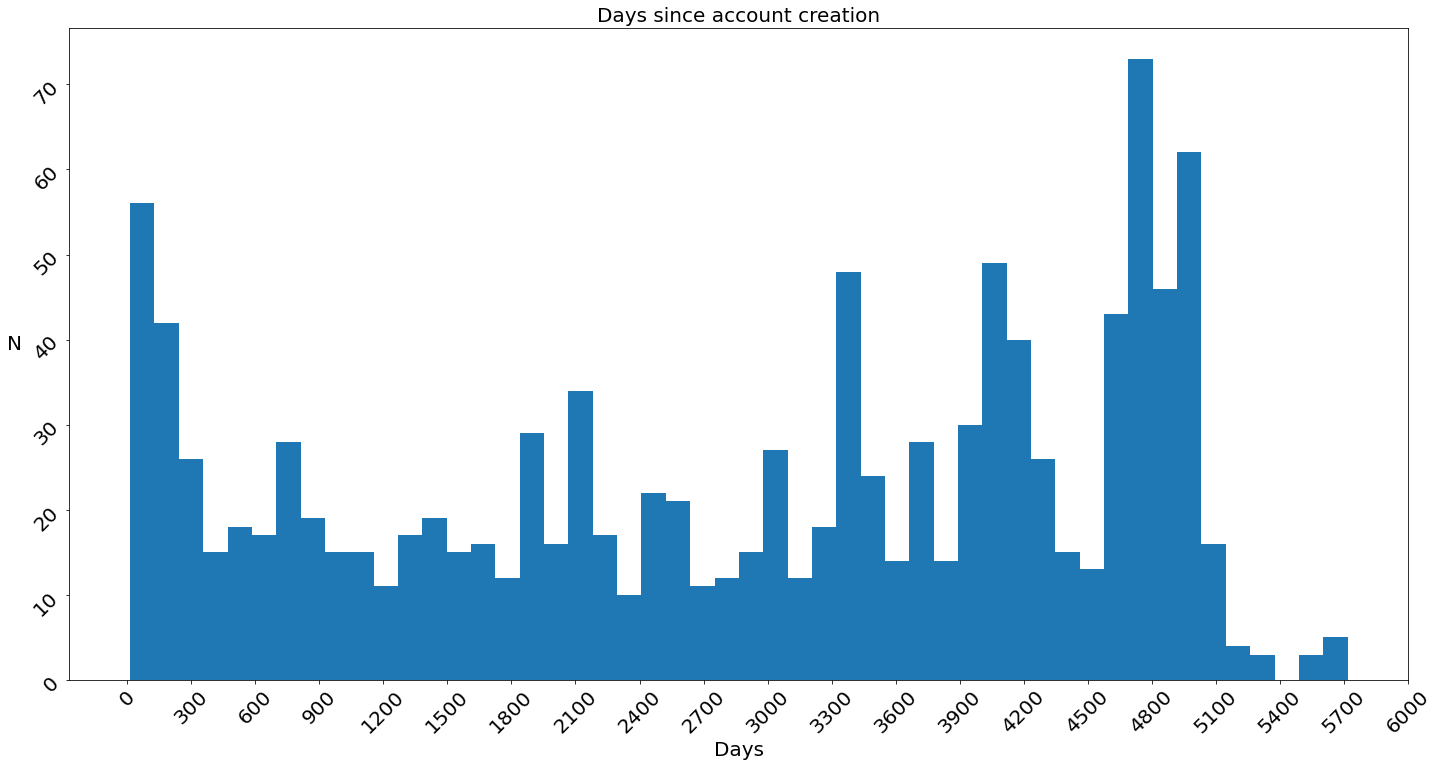

None
Displaying 25 of 92 matches:
 its Kremlin sources the partial mobilization decree s classified article envi
esentment and then The Kremlin s mobilization decree has confronted many Russi
sterday just hours after Putin s mobilization announcement n An upcoming aucti
offices on fire Protests against mobilization have started across Russia today
 in response to Vladimir Putin s mobilization declaration A thread on the prot
arrested for protesting Russia s mobilization Police in St Petersburg have bea
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 to Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
cow announced a partial military mobilization Report by In Moscow too mothers 
f resistance to Russia s partial mobilization measures Pretty powerful video I
ns are trying to escape from the mobilization announced by Putin n nAt the sam
lack Sea region Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

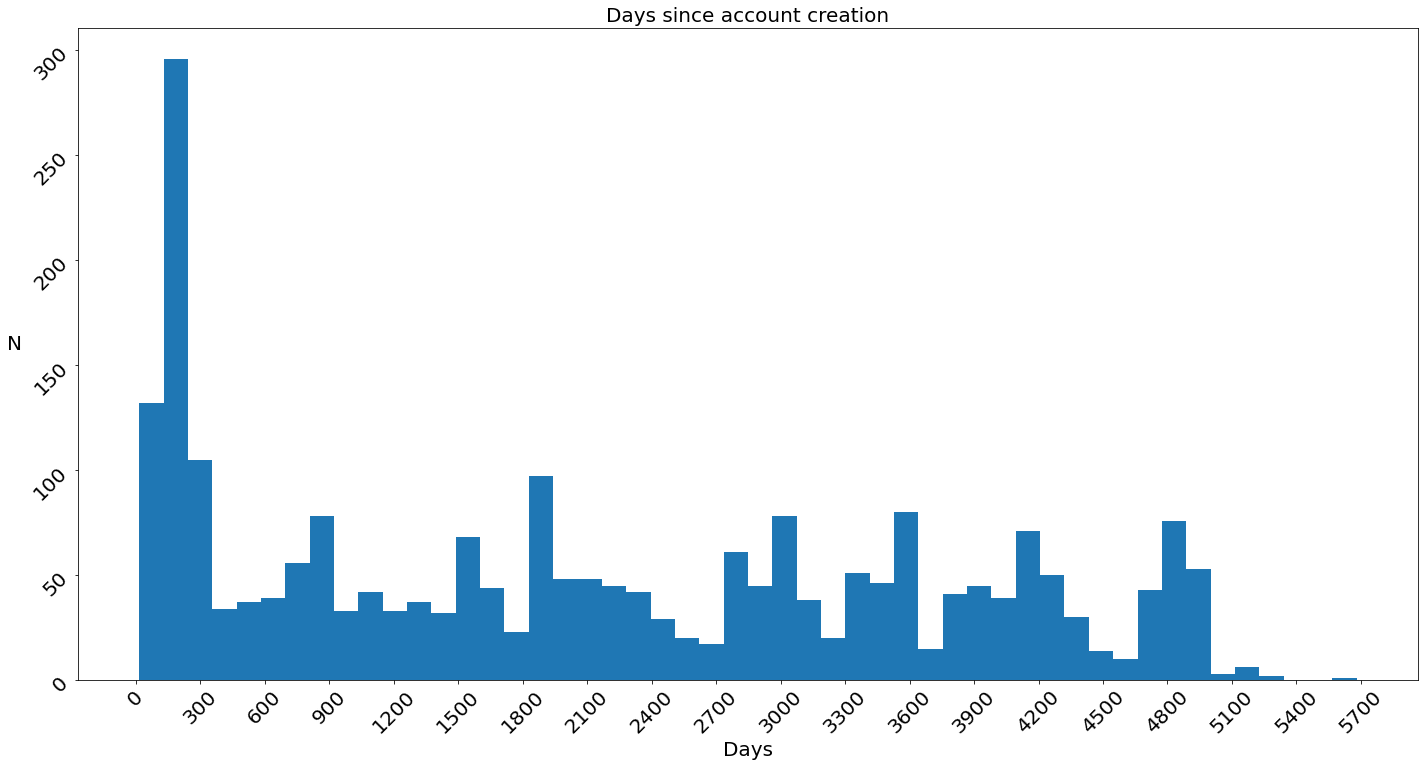

None
Displaying 25 of 192 matches:
venth paragraph of the decree on mobilization allows the Russian Ministry of D
tory n Polish meme about Russian mobilization n nDoc You re going to Ukraine n
eet protests against the partial mobilization policy announced by President Vl
rowing protests against military mobilization in St Petersburg Moscow Yekateri
n discovered More signs that the mobilization in Russia is far from partial Th
d n Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
he final hours Putin s announced mobilization of 300 000 reservists was jaw dr
f resistance to Russia s partial mobilization measures Secretary of State Anto
s Pro War celebrated the Partial Mobilization on Twitter n nLess than 2 hours 
er he receives a Convocation for Mobilization n nHe then immediately switches 
engagement Cartoon Russia orders mobilization for Putin s disastrous Ukraine i
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
mputer Polish mem

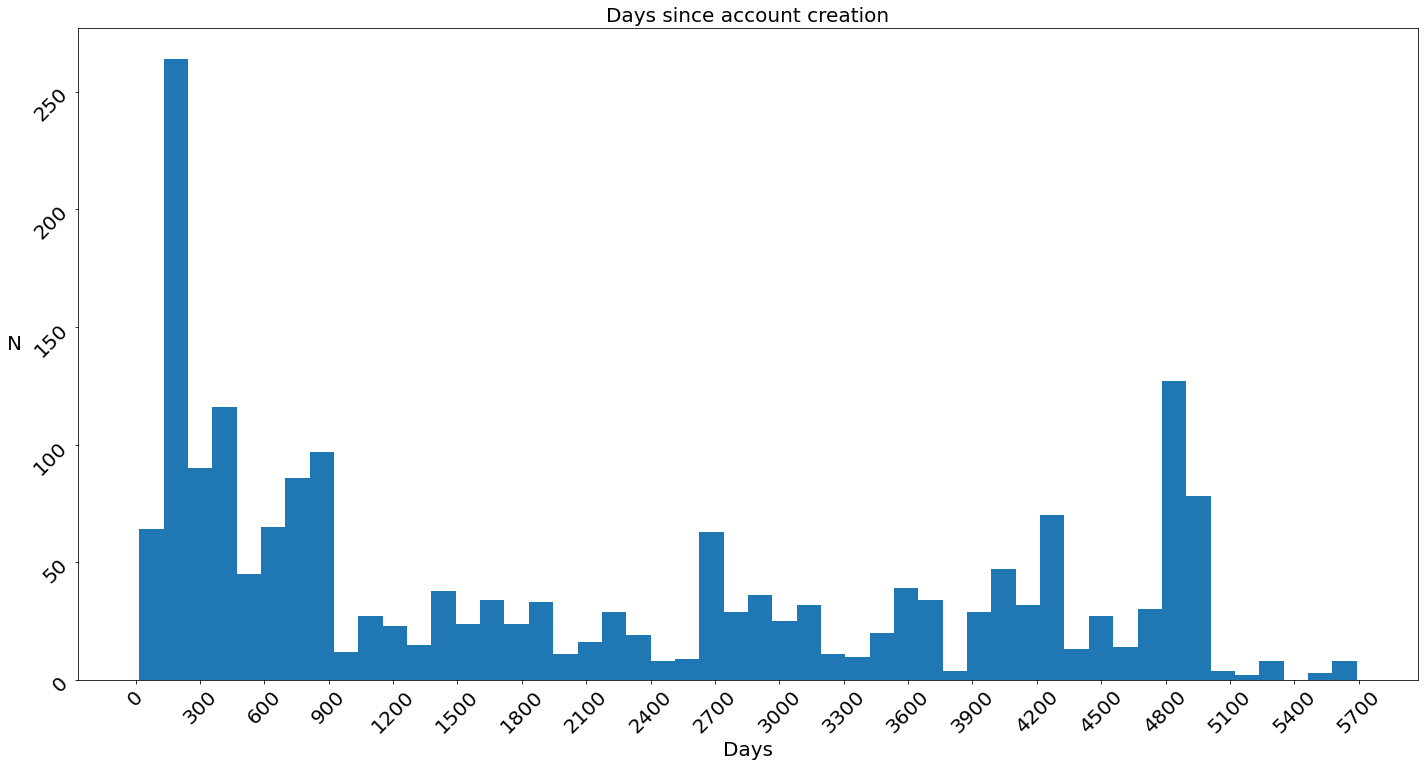

None
Displaying 25 of 212 matches:
nouncement after 7 months of war mobilization in Russia And a set of convicts 
we re seeing in terms of Russian mobilization The scale seems larger than what
f resistance to Russia s partial mobilization measures Every citizen is respon
llas The reality of this partial mobilization is looking a lot different than 
ces fury in Russia over military mobilization and prisoner Washington Post n n
re the U S media reported On why mobilization whether 300 000 or a million isn
sia has only officially declared mobilization three times in its history World
 President Zelensky The military mobilization will bring the war to the homes 
fight in Ukraine on first day of mobilization news agency According to Novaya 
 in Moscow Putin s cannibalistic mobilization List of 103 Gazprom employees th
ean troll farms Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 a plane due to R

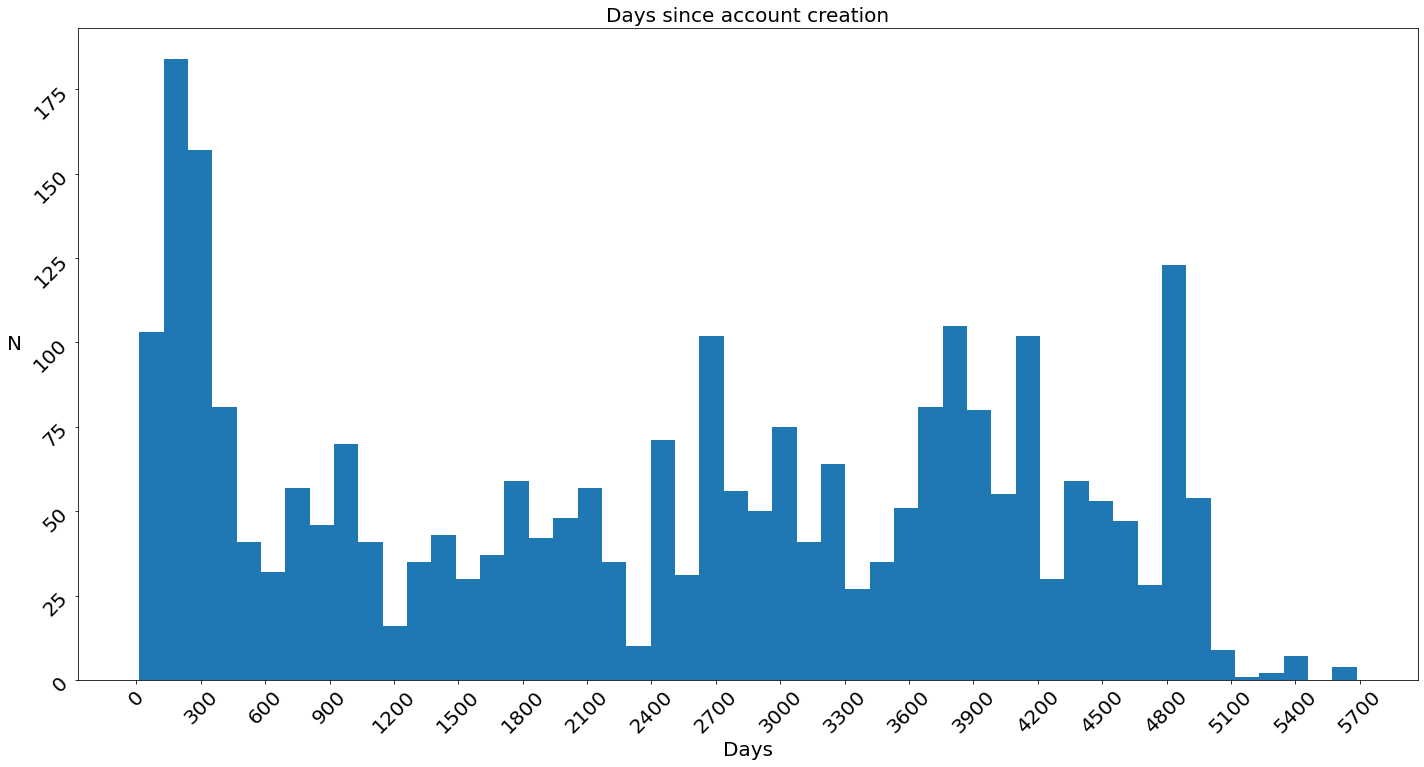

None
Displaying 25 of 315 matches:
at the UNGA Russia s decision on mobilization is an admission that their regul
e coming in so far about Russian mobilization n n1 They are not sticking to Pu
 already wrong nAnd this partial mobilization made official yesterday is a tre
monstrations against the partial mobilization for the offensive in Ukraine ann
Ukraine To unfold on the partial mobilization announced yesterday by Putin Nov
secret part of Putin s decree on mobilization states that Russia can draft up 
n a war that I want no part in n Mobilization List of 305 925 names comprising
cow announced a partial military mobilization Report by Hello nA video from 20
s on Russians to protest against mobilization ICC Prosecutor KarimAAKhanKC at 
sians to protest against partial mobilization Ukraine energy ministry deletes 
porizhzhia nuclear plant Putin s mobilization self own Employees at the Khruni
 already wrong nAnd this partial mobilization made official yesterday is a tre
ghway protesting 

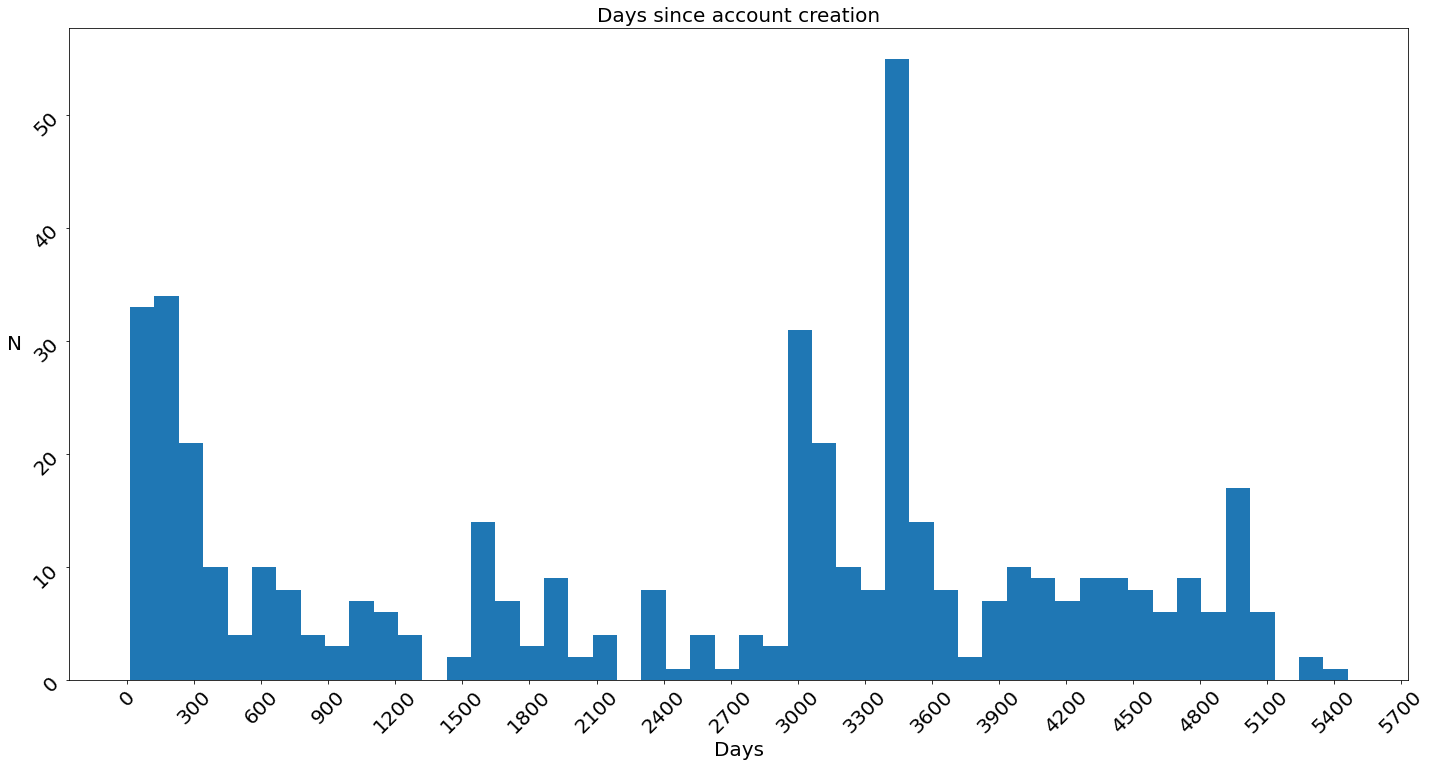

None
Displaying 25 of 30 matches:
ion Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
er The speed of Russia s partial mobilization will depend on planning and cont
s to protest against the war and mobilization in Chechnya all of them were det
rike to the head during the anti mobilization protests in Moscow IRAN nWhat a 
pilov signed an order on partial mobilization It does not say anything about a
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 Rate CB of C Trudeau s fault As mobilization begins in Russia sold out flight
sia for the first day of partial mobilization about 10 thousand people arrived
ow after Putin announces partial mobilization Ukrainian President Volodymyr Ze
ING Putin secretly orders larger mobilization of a million soldiers to die in 
want to survive Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
trongly condemn Pu

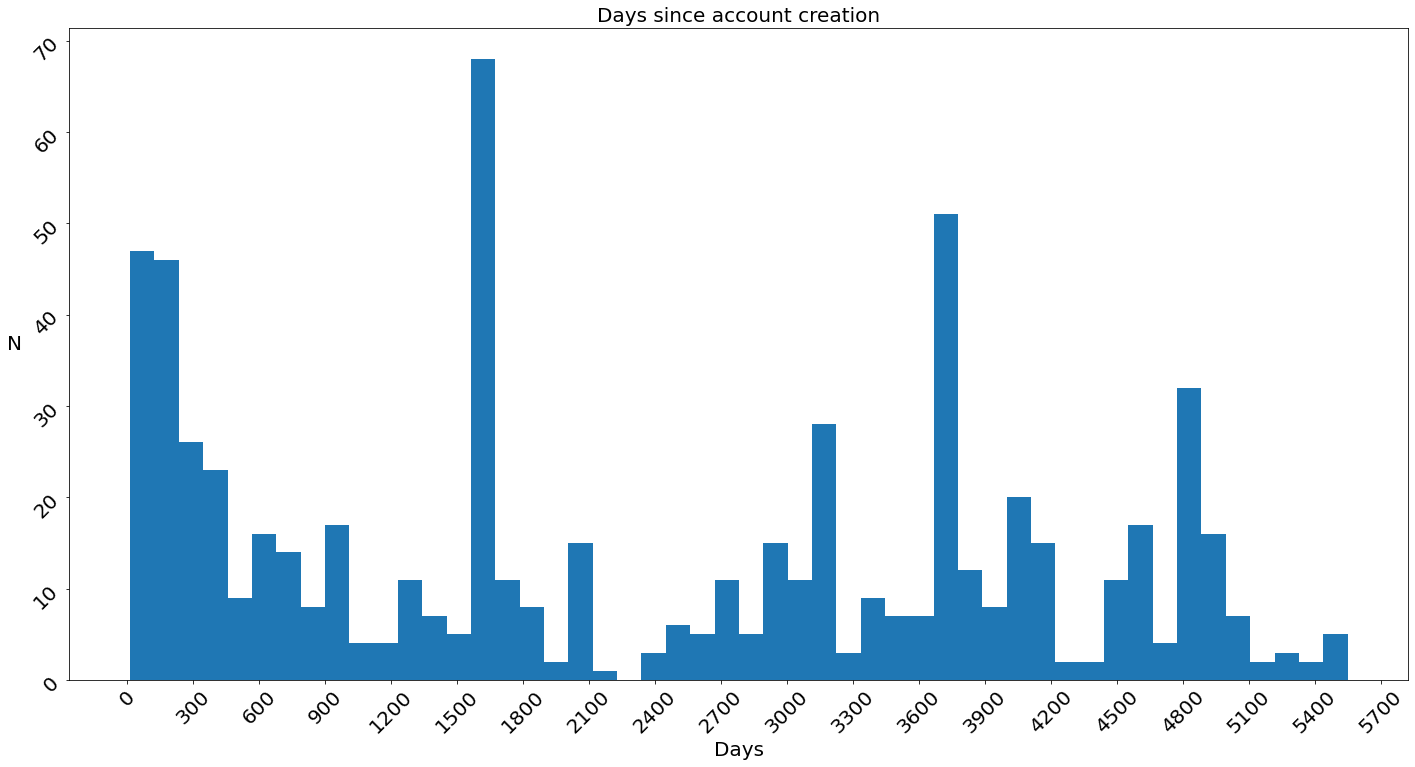

None
Displaying 25 of 96 matches:
cans first After Putin announced mobilization in Russia 90 of support for the 
one Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
n enemy According to her partial mobilization in Russia requires a reassessmen
Russia show just how quickly the mobilization is happening Less than 24 hours 
ehicle Polish meme about Russian mobilization n nDoc You re going to Ukraine n
 sitrep n n Issues with Russia s mobilization and a reported secret clause to 
 Ukraine s Azov Regiment Putin s mobilization self own Employees at the Khruni
nd analysis 1 6 Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
ossible UK intelligence Russia s mobilization will be highly unpopular n nRuss
tizens who want to avoid partial mobilization Prime Minister Kallas n nI fully
to destroy the Crimean Tatars by mobilization This is a disaster As of now at 
them to go protest

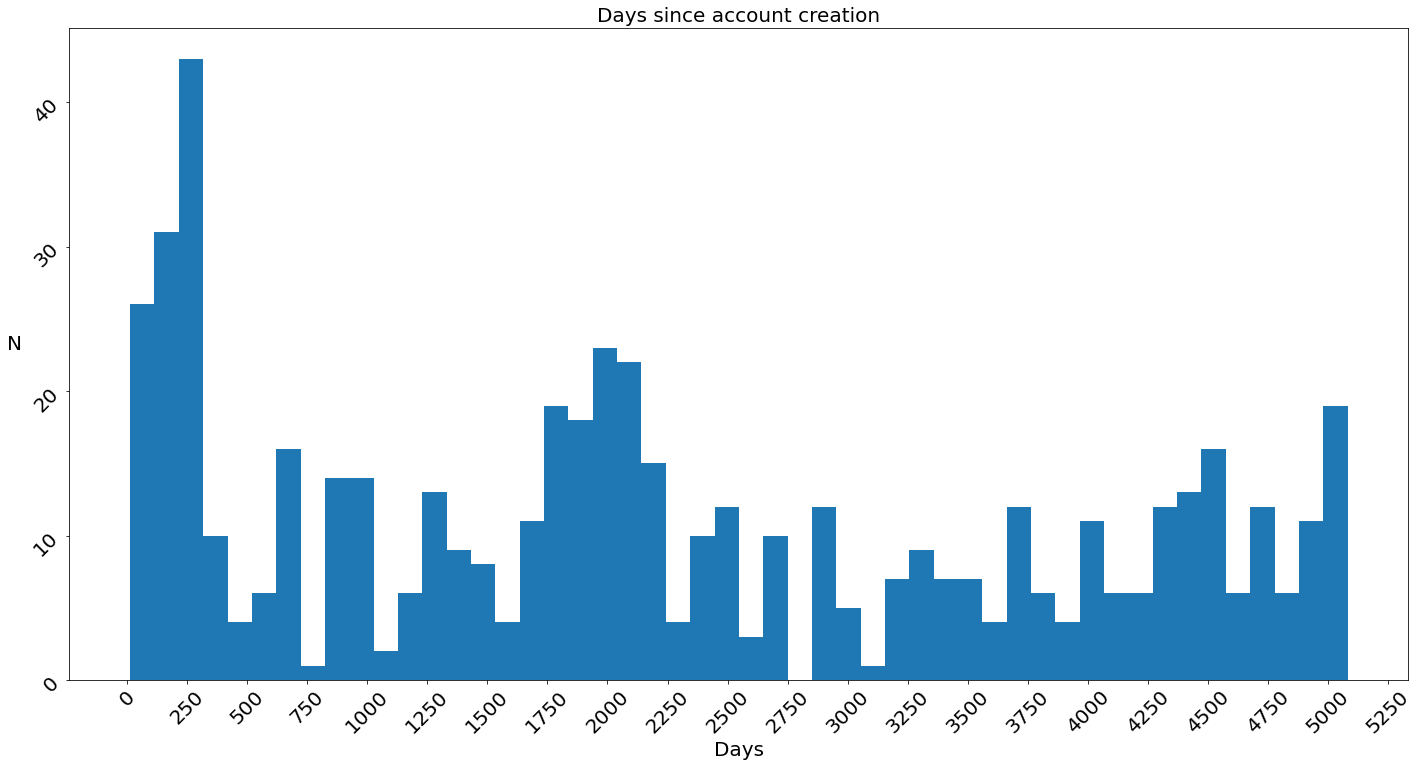

None
Displaying 25 of 26 matches:
es 300 000 troops 7NEWS see more Mobilization in the Russian Federation I have
 n nWelcome to Insiders Military mobilization in Moscow n Russian Russia Ukrai
eet protests against the partial mobilization policy announced by President Vl
 Dagestan protesters against the mobilization blocked the federal highway gt s
Putin announces partial military mobilization in Russia amid war with Ukraine 
ghway protesting against Putin s mobilization I notice that Russian diplomats 
Putin announces partial military mobilization in Russia amid war with Ukraine 
A few videos of the first day of mobilization in Russia n nFirst video n nAn e
stops fighting Ukraine ends Anti mobilization protests in Russia are not neces
ival for Russia Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
he s losing the war yet Now that mobilization is govt policy it ll be interest
grees with that Ru

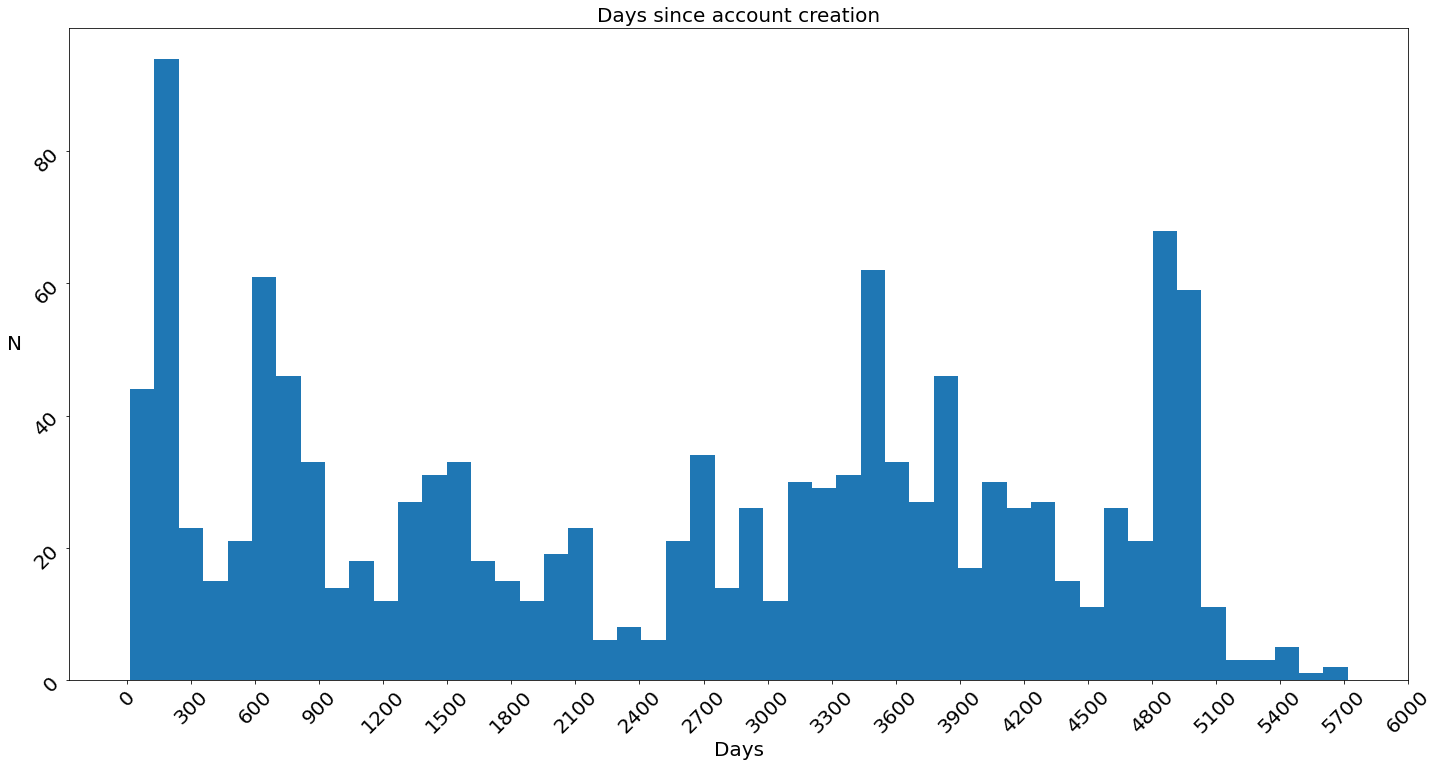

None
Displaying 25 of 159 matches:
 its Kremlin sources the partial mobilization decree s classified article envi
secret part of Putin s decree on mobilization states that Russia can draft up 
 its Kremlin sources the partial mobilization decree s classified article envi
y arrested across Russia in anti mobilization protests Zelensky warns against 
 its Kremlin sources the partial mobilization decree s classified article envi
is an act of desperation Partial mobilization Russia Russia Anonymous n nThe U
 border Russians are fleeing the mobilization in all possible directions Russi
 its Kremlin sources the partial mobilization decree s classified article envi
 Putin s announcement of partial mobilization on September 21 reflected many p
ear contaminated Ukraine Partial mobilization nuclear weapons Russia deserters
 to leave Russia after a Partial Mobilization was announced yesterday n nA fli
 its Kremlin sources the partial mobilization decree s classified article envi
 its Kremlin sour

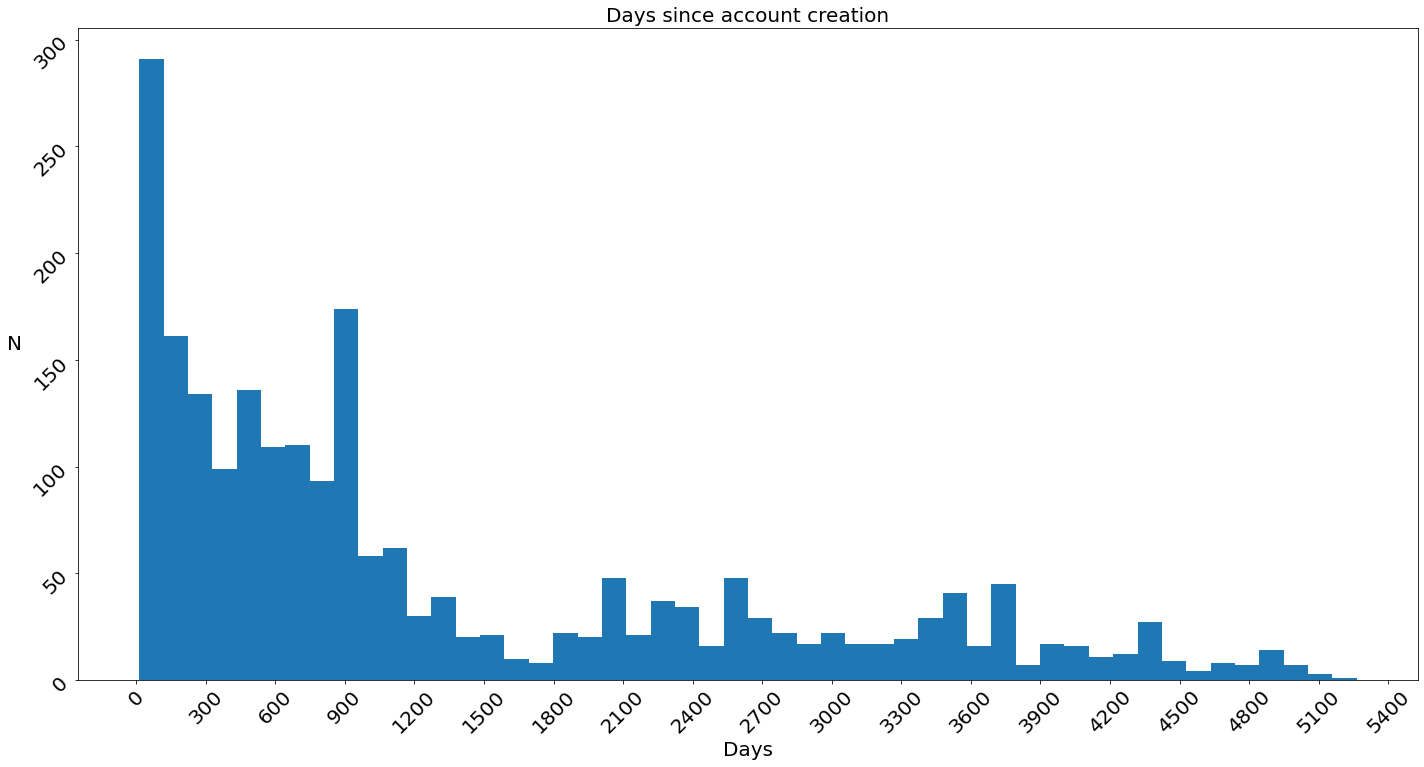

None
Displaying 25 of 51 matches:
ht since Putin s announcement of mobilization On Ilikovsky Avenue in Lomonosov
re during the night I m watching mobilization videos photos from Russia and I 
s This reminds me on Milosevic s mobilization in Serbia while protecting his e
 same old story Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 No war chantings after they got mobilization More signs that the mobilization
mobilization More signs that the mobilization in Russia is far from partial Th
ry training or study So Russia s mobilization applies only for regular people 
e his country 1 The first day of mobilization in Ukraine the queue at the mili
commissariat n2 The first day of mobilization in Russia queue at the border Br
e believes that Russia s partial mobilization is a sign that it has exhausted 
ent suggests that Russia s first mobilization since WWII is looking to send fa
ine n n Hey russia

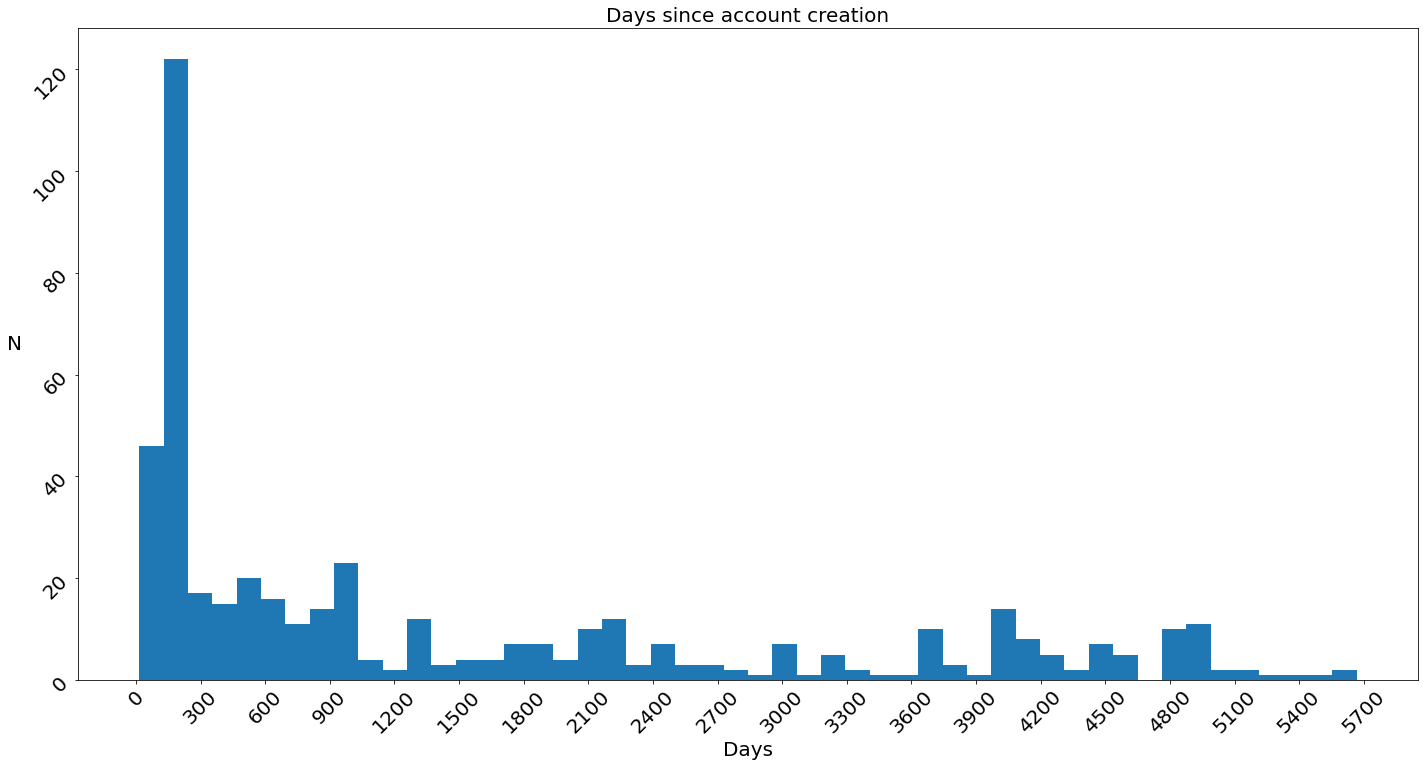

None
Displaying 7 of 7 matches:
ube Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
 in support of Russia s military mobilization Mufti of Chechnya Salakh Mezhiev
gins with Punishment via Putin s mobilization effort is a sign manpower is a p
e after Putin s partial military mobilization A piece I read the other day has
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ances amp economic clubs n n The Mobilization Begins Scenes Around Russia What
ING Putin secretly orders larger mobilization of a million soldiers to die in 
                 ('So', 'are', 'we', 'just')                 ('are', 'we', 'just', 'not')               ('we', 'just', 'not', 'going')               ('just', 'not', 'going', 'to')               ('not', 'going', 'to', 'talk')             ('going', 'to', 'talk', 'about')             ('to', 'talk', 'about', 'Boris')        ('talk', 'about', 'Boris', 'Johnson')    ('about', 'Boris', 'Johnson', 'ordering') ('Boris', 

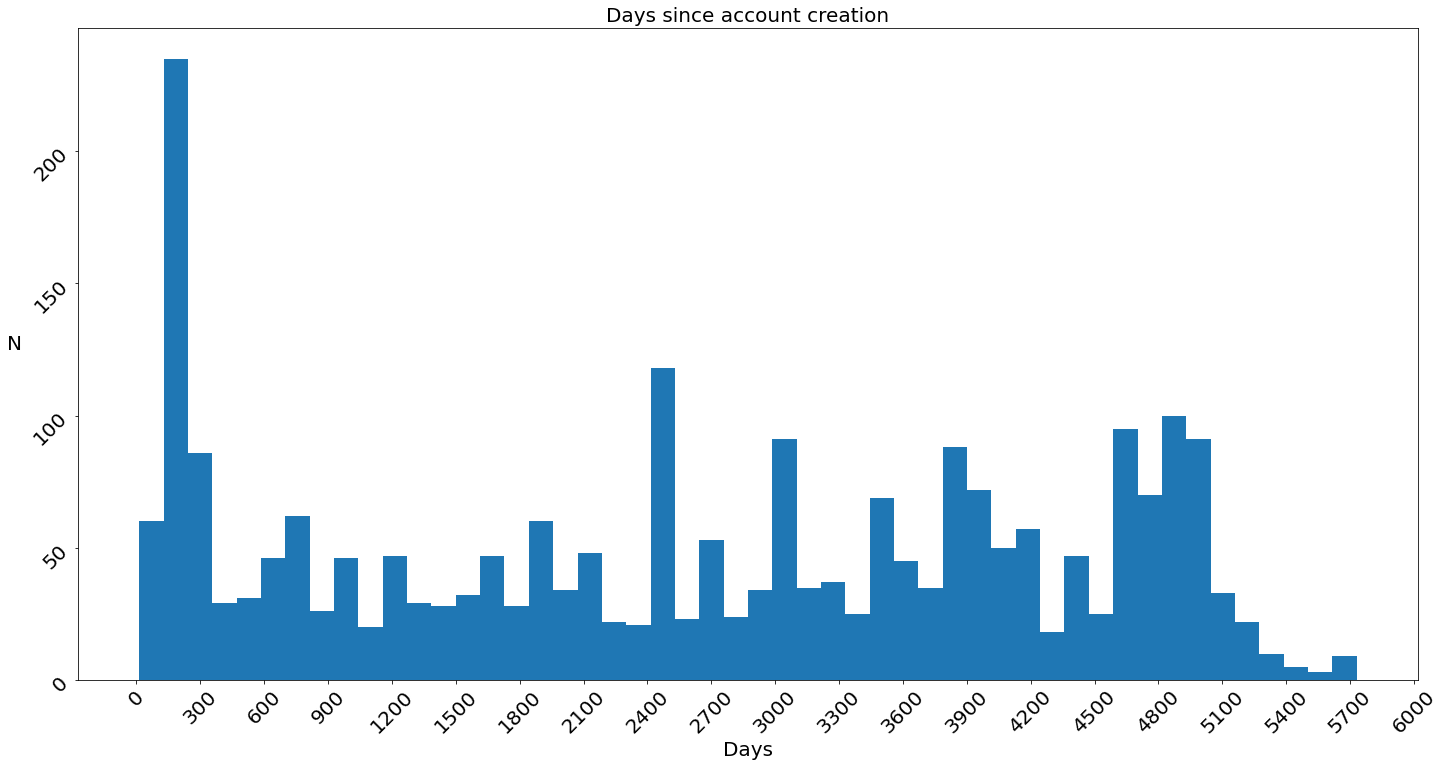

None
Displaying 25 of 741 matches:
t at UN Security Council Putin s mobilization self own Employees at the Khruni
er is coming this time literally Mobilization Putin s fascist spokesman Peskov
 million people Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
reat reporting from Roth Putin s mobilization self own Employees at the Khruni
o issue notices because there is mobilization now Forcibly conscripted Russian
aine stops fighting Ukraine ends Mobilization List of 305 925 names comprising
cow announced a partial military mobilization Report by Pretty powerful video 
ng about replies a Dagestani man Mobilization List of 305 925 names comprising
00 000 n94mb text file n Putin s mobilization self own Employees at the Khruni
forced onto buses after Russia s mobilization order n n RussiaInvadedUkraine U
in the Kharkiv direction Putin s mobilization self own Employees at the Khruni
 to the AU Putin 

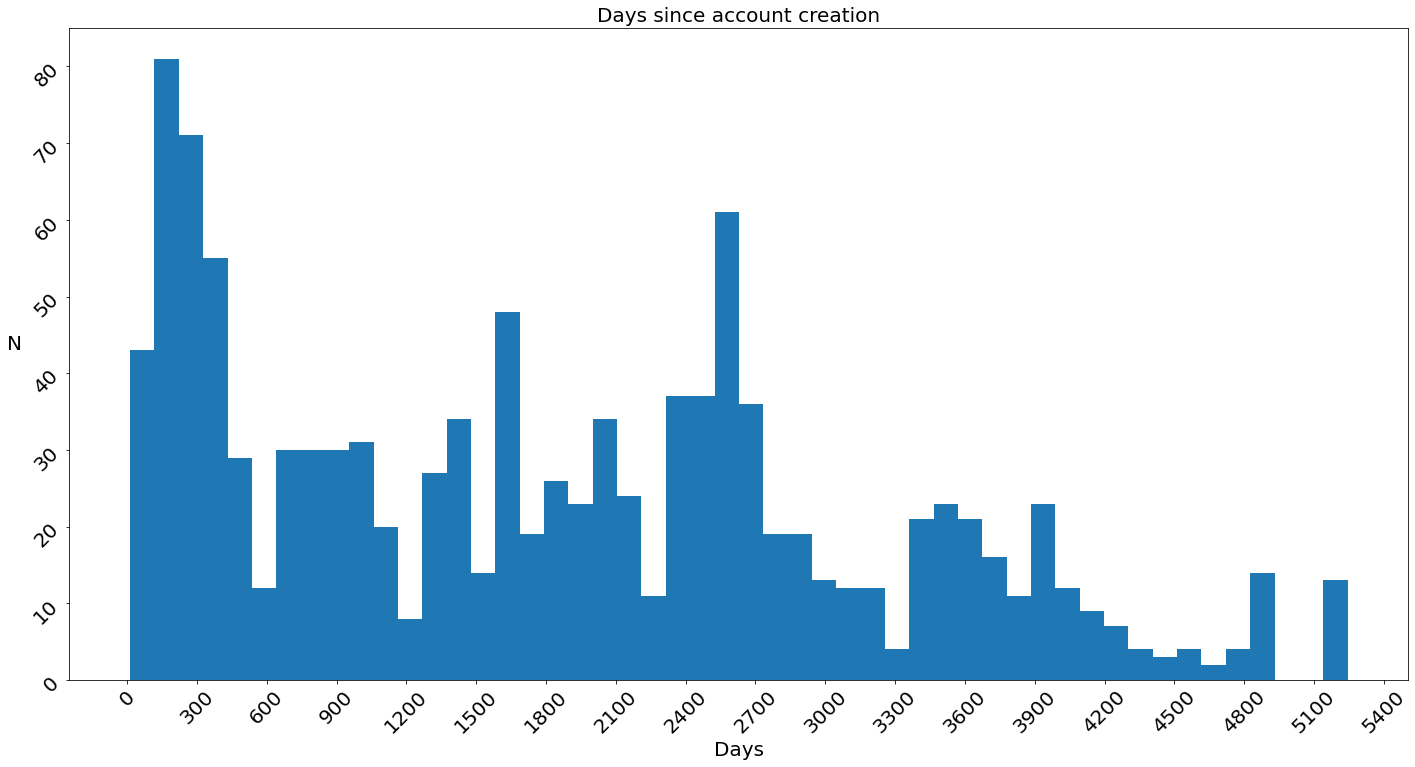

None
Displaying 25 of 171 matches:
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
on sense are two opposite things Mobilization List of 305 925 names comprising
myr Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
rowing protests against military mobilization in St Petersburg Moscow Yekateri
ergei Lavrov at the UNGA Partial mobilization NA dream way to get rid of the r
hours to Russia declares partial mobilization to possibly prevent a crushing d
ng defeat in Ukraine The partial mobilization announced by V Putin is an attem
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
tember 12 2022 Vladimir Putin on mobilization and conscription soldiers six mo
sian Black Sea Fleet n n Partial mobilization NA dream way to get rid of the r
d soldiers who did not receive a mobilization call are forbidden to leave thei
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
 decades as Ukrai

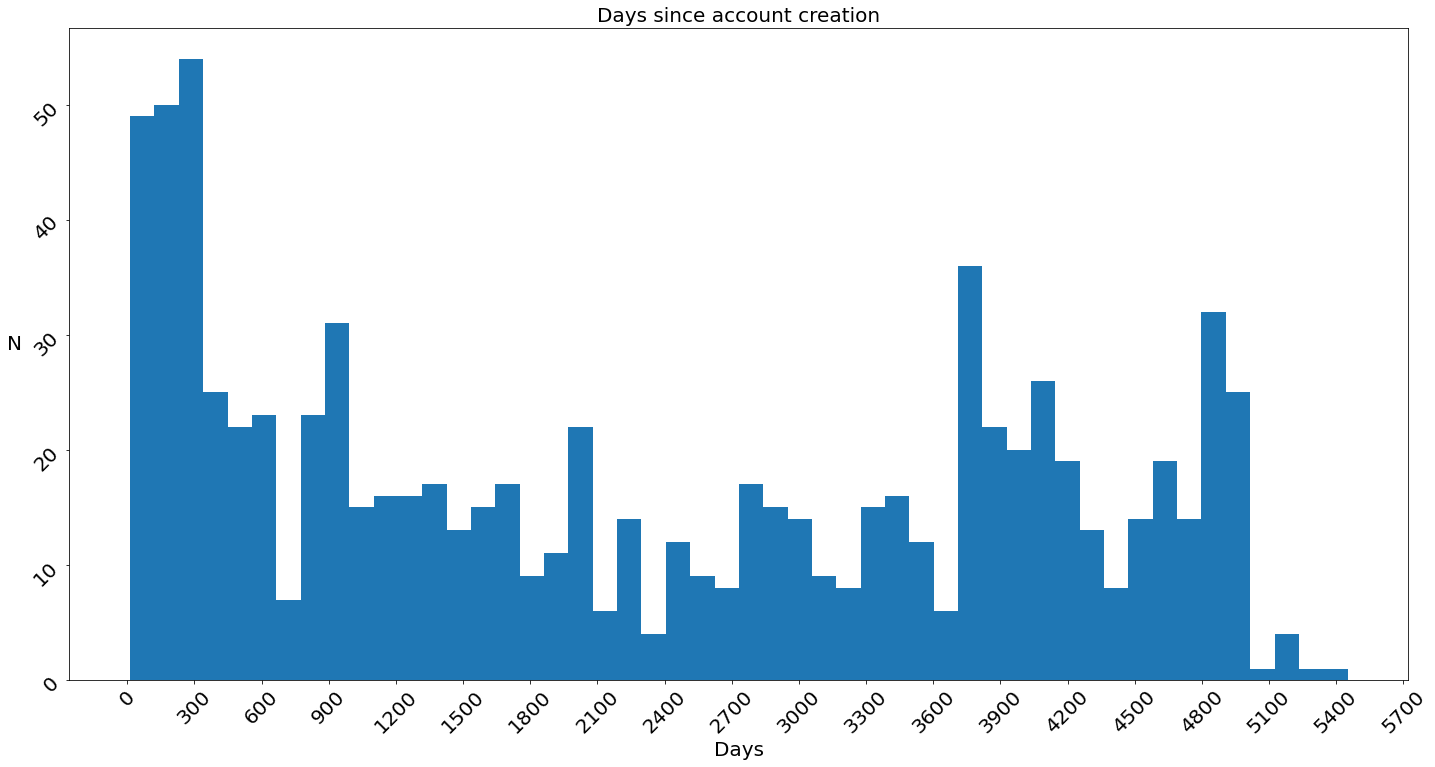

None
Displaying 21 of 21 matches:
No one knows More signs that the mobilization in Russia is far from partial Th
es the war then declares partial mobilization and threatens West with nuclear 
 another one On the left Russian mobilization headed to Ukraine On the right a
ence Disgusting Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
secret part of Putin s decree on mobilization states that Russia can draft up 
d the rhetorical confines of its mobilization campaign n The Republics of Done
eet protests against the partial mobilization policy announced by President Vl
ral Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
s on Russians to protest against mobilization the AFP reports cgtnamerica Russ
mir Putin s speech calling for a mobilization of the Russian military reserve 
 wasn t enough which the current mobilization has proven to be true Why are we
d Muscovites are t

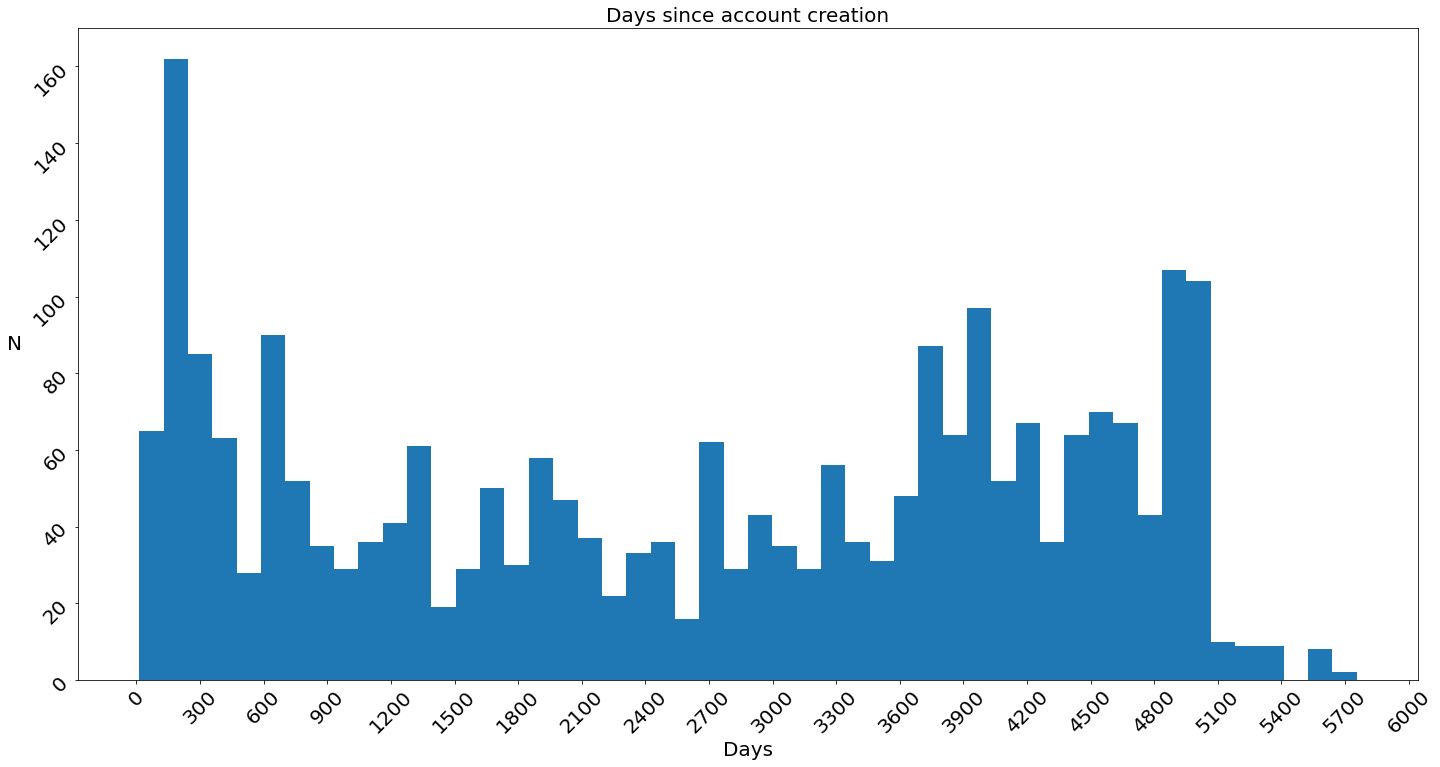

None
Displaying 25 of 325 matches:
adimir Putin announced a partial mobilization in the country said that Germany
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
age Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ack Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
n financed One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
ps fighting Ukraine ends Putin s mobilization self own Employees at the Khruni
you like Putin values Medvedchuk Mobilization is a desperate gesture from Puti
rike to the head during the anti mobilization protests in Moscow Are those cro
 it Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
read resentment and then Putin s mobilization Conscripts in Moscow getting loa
 at protests agai

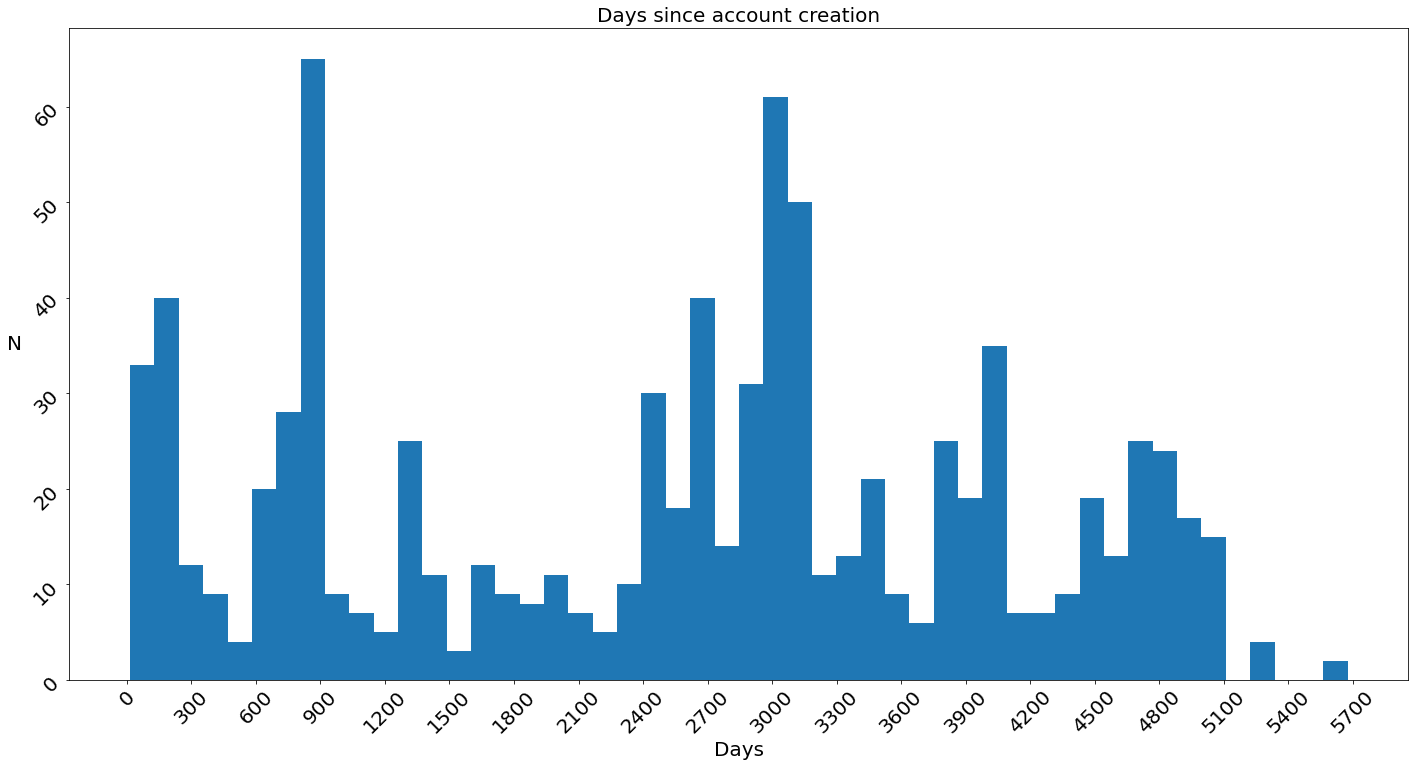

None
Displaying 25 of 39 matches:
e coming in so far about Russian mobilization n n1 They are not sticking to Pu
rike to the head during the anti mobilization protests in Moscow People in Rus
dreds of Russians PROTESTING the mobilization order chanting No to War n 153 d
153 detained at protests against mobilization n In Krasnodar Izhevsk amp Mosco
eryone caught protesting against mobilization in Russia Russia has given the b
ar My latest analysis at Putin s mobilization self own Employees at the Khruni
secret part of Putin s decree on mobilization states that Russia can draft up 
nt of partial more on this below mobilization is much more dangerous for Russi
tes Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
idarity with Ukraine The partial mobilization announced by Putin caused panic 
count dkpol n n Yesterday s anti mobilization protests across Russia show how 
 no part in n n Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

TypeError: ignored

In [ ]:
# analyse communities with 1000 - 5000 members
path = '/content/drive/MyDrive/communities_ECG/'
for file in os.listdir(path):
  print(file)
  dataframe = pd.read_csv(path + file)
  if dataframe.shape[0] > 1000 and dataframe.shape[0] < 5000:
    analyse_community(dataframe, f'{path}{file}')

community138.csv
community87.csv
community417.csv
community385.csv
community428.csv
(3933,)
تو راهم                         0.228228
Earth Planet & 🇪🇺               0.093093
España                          0.078078
Islamic Republic of Iran        0.060060
رو ابرا                         0.057057
                                  ...   
Україна                         0.003003
Gothenburg, Sweden              0.003003
Vivo delante de mi ordenador    0.003003
موهای یوشی                      0.003003
Mays Chapel, MD                 0.003003
Name: author.location, Length: 76, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


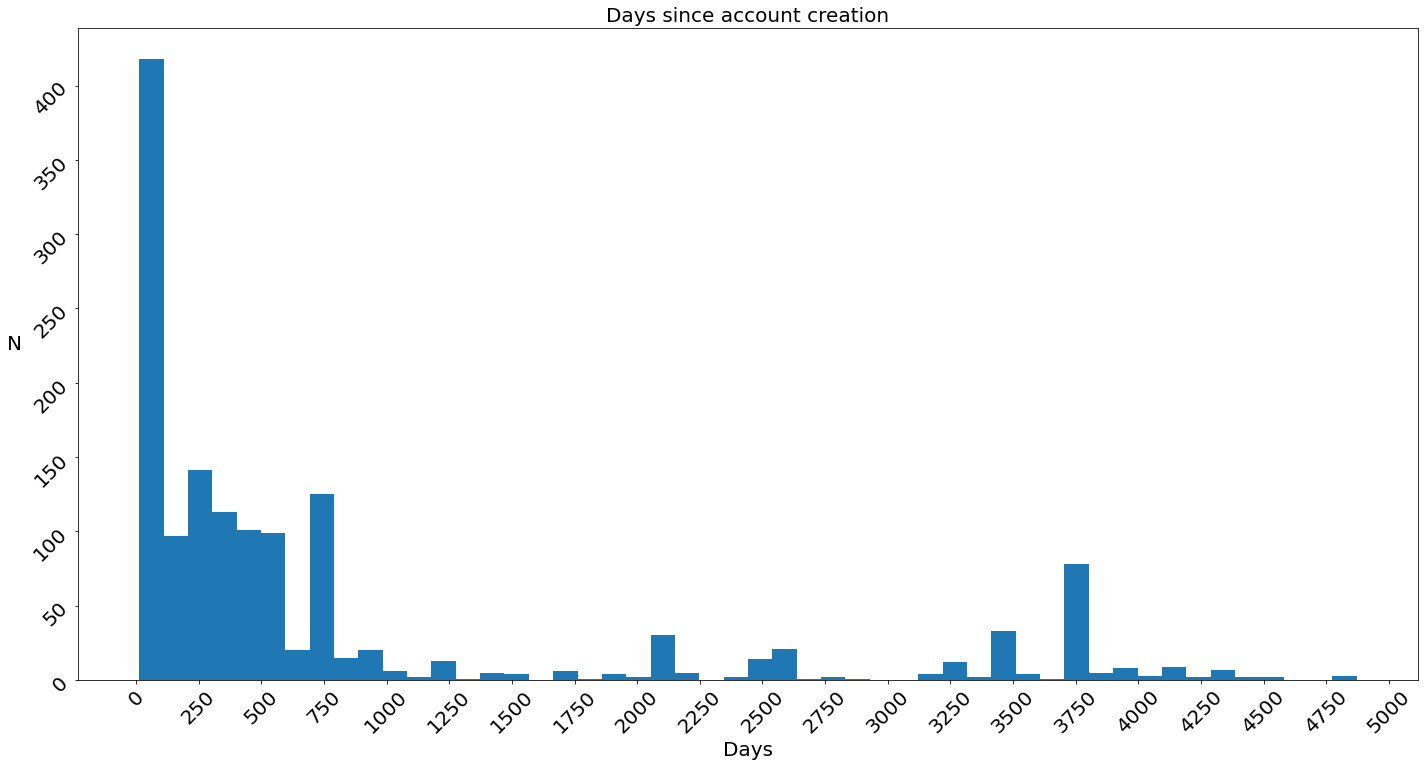

None
Displaying 19 of 19 matches:
o to war against Ukraine Putin s mobilization Conscripts in Moscow getting loa
ent Vladimir Putin announced the mobilization of 300 000 military reservists n
 the recruitment board after the mobilization announcement n nChechens go en m
 protesting against the military mobilization in Russia would be forced to enl
arrested in protests against the mobilization ordered by Putin in Russia Horiz
stroy our country We have a huge mobilization resource It is the resource of t
is includes activating a partial mobilization of Russians who are in the reser
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
g to need them Slava Ukraini The mobilization decreed by Putin is being a succ
at does Putin s partial military mobilization mean for Central Asian migrants 
ter Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
at least for me Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

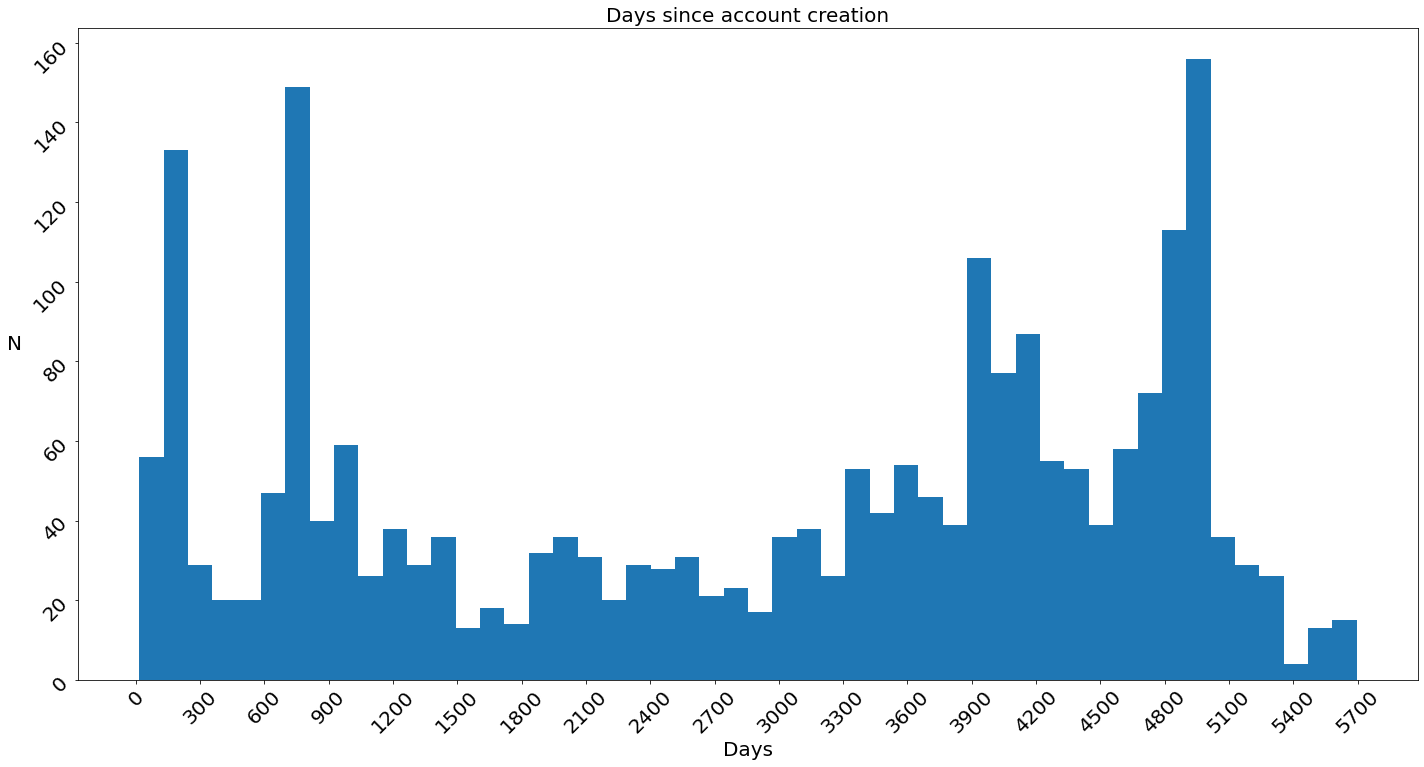

None
Displaying 25 of 609 matches:
rowing protests against military mobilization in St Petersburg Moscow Yekateri
Russia show just how quickly the mobilization is happening Less than 24 hours 
s Pro War celebrated the Partial Mobilization on Twitter n nLess than 2 hours 
er he receives a Convocation for Mobilization n nHe then immediately switches 
ine Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
s So with the combined effort of mobilization referendums and nuclear threats 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ication 1 n nA Putin s announced mobilization of 300 000 reservists was jaw dr
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
d pressure One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
 the official decree the way how mobilization is held in RU shows that Russia 
that Russia has t

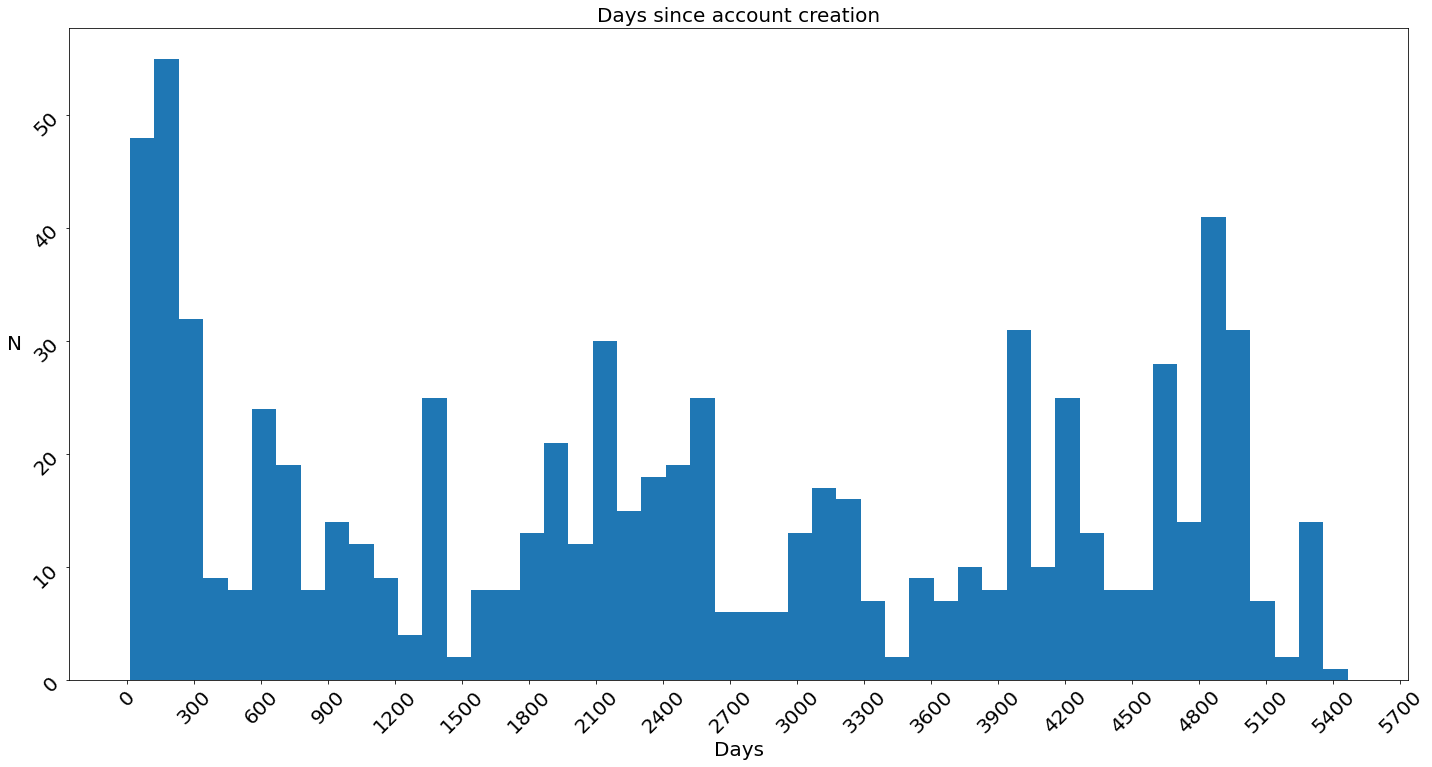

None
Displaying 25 of 73 matches:
 has ALREADY announced a partial mobilization in the Russian Federation NHe or
he war they are protesting it is mobilization they are against It s ok for som
 n nThey say this is to stop the mobilization buses from taking their men away
 do such a thing in this country Mobilization List of 305 925 names comprising
fog of war After Putin announced mobilization in Russia 90 of support for the 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
nouncement of a partial military mobilization n Zelensky For what reason is Ru
stead of helping win the war the mobilization could be yet another of Putin s 
eting People protest against the mobilization all over Russia Over 1600 arrest
ir Putin has announced a partial mobilization If you look closely the conscrip
eet protests against the partial mobilization policy announced by President Vl
ent on September 21 of a partial mobilization of up to 300 000 reservists to f
CSIS expert n nLea

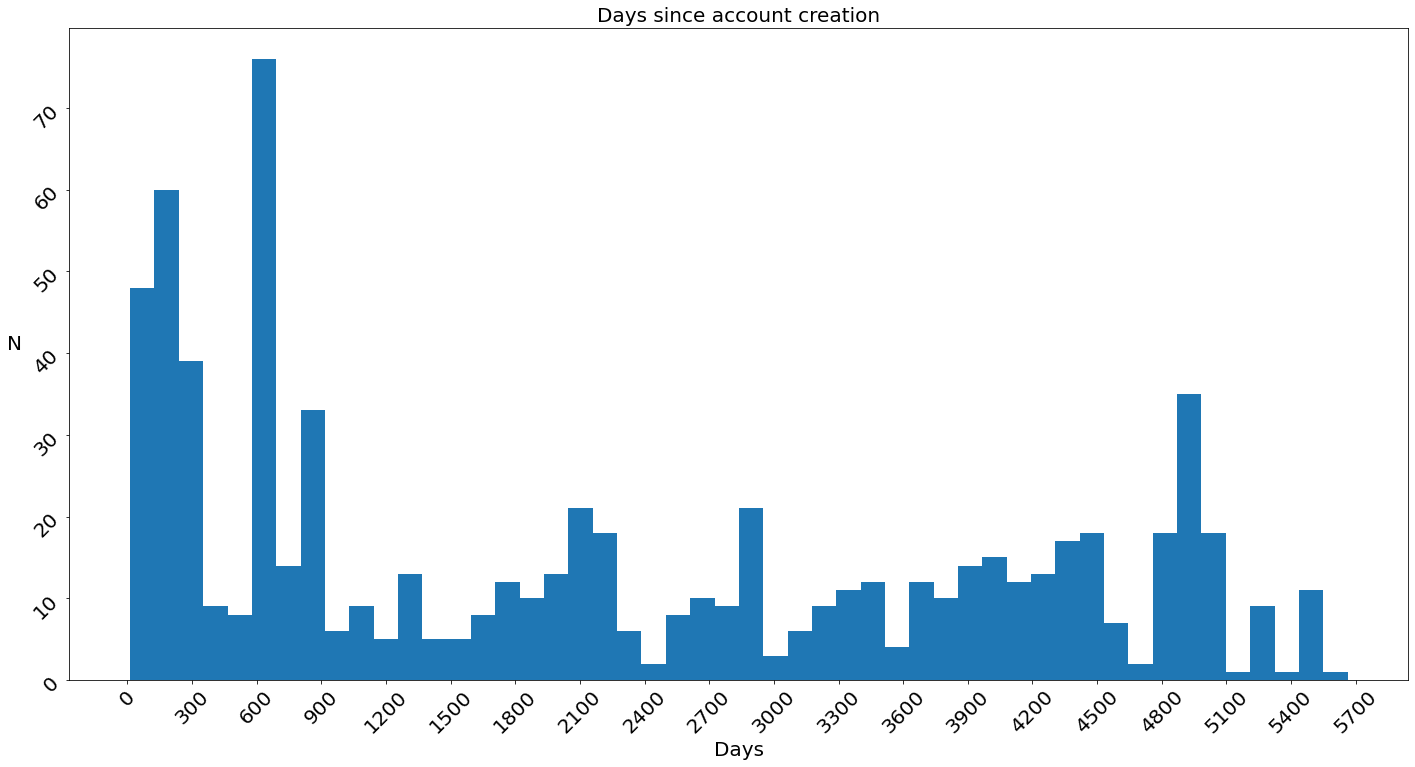

None
Displaying 25 of 49 matches:
ia fights smart Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
ING Putin secretly orders larger mobilization of a million soldiers to die in 
cording to One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
ING Putin secretly orders larger mobilization of a million soldiers to die in 
aces public anger in Russia over mobilization and prisoner swap The Washington
do But as plans go 5 x The Putin mobilization speech seems pretty much vaporwa
lee Russia after Putin announced mobilization of another 300 000 soldiers to b
the mayhem and horror of general mobilization in Russia Lavrov should be kicke
 announced the immediate partial mobilization of Russian citizens and threaten
hat speech or call

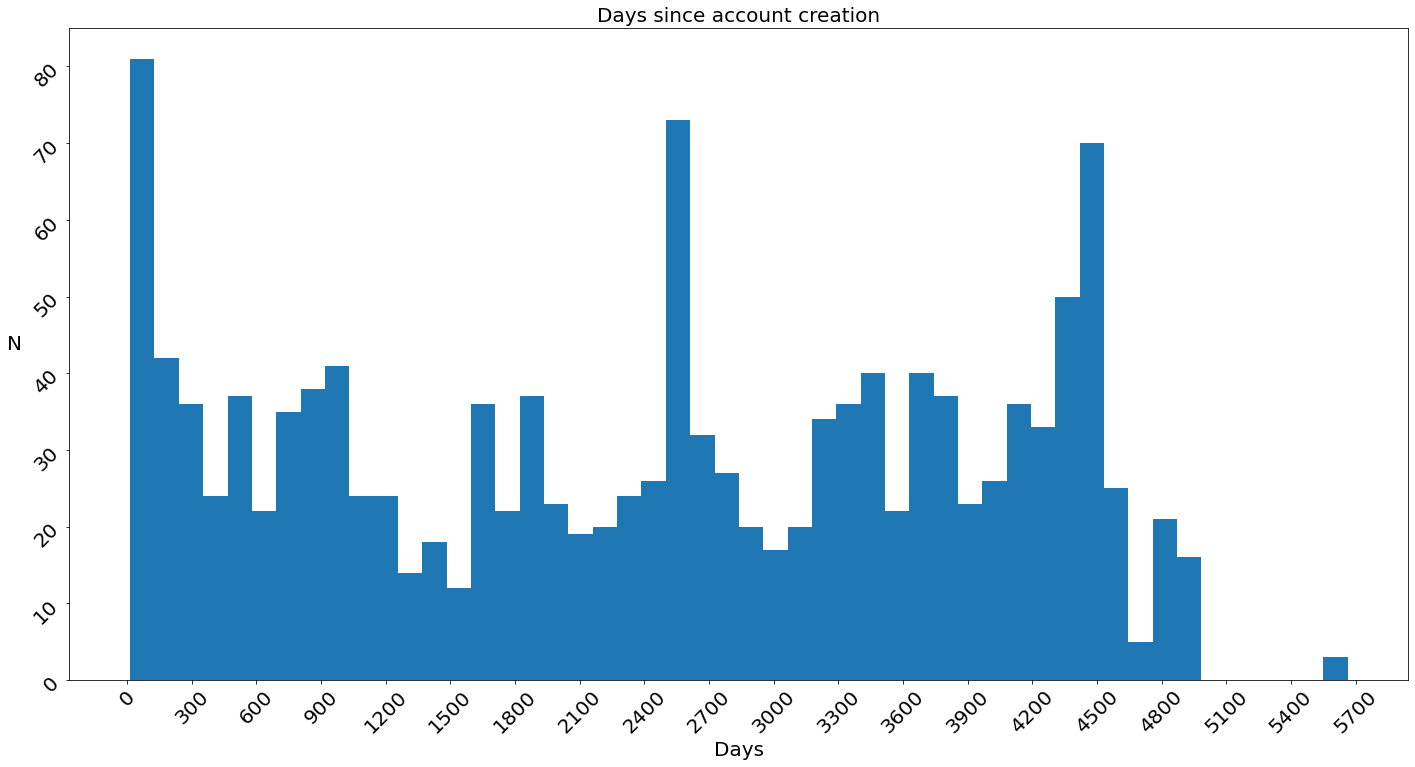

None
Displaying 25 of 48 matches:
woman who cries for the military mobilization of her friends I m lucky to be a
n out of tickets to flee Putin s mobilization order They buy no matter where t
ic cleansing More signs that the mobilization in Russia is far from partial Th
 en masse after Putin s call for mobilization While Western propaganda reports
flight of the Russians after the mobilization declared by Putin I share the in
s from Russia in the face of the mobilization ordered by Putin Flights out of 
 en masse after Putin s call for mobilization Are those crowds Russians wishin
 en masse after Putin s call for mobilization Russia s border crossing with Ge
 en masse after Putin s call for mobilization Bad week for Putin and the Ayato
 en masse after Putin s call for mobilization Faced with Putin s threat to use
 the recruitment board after the mobilization announcement n nIn the US they s
 en masse after Putin s call for mobilization Putin launched the forced recrui
s from Russia in t

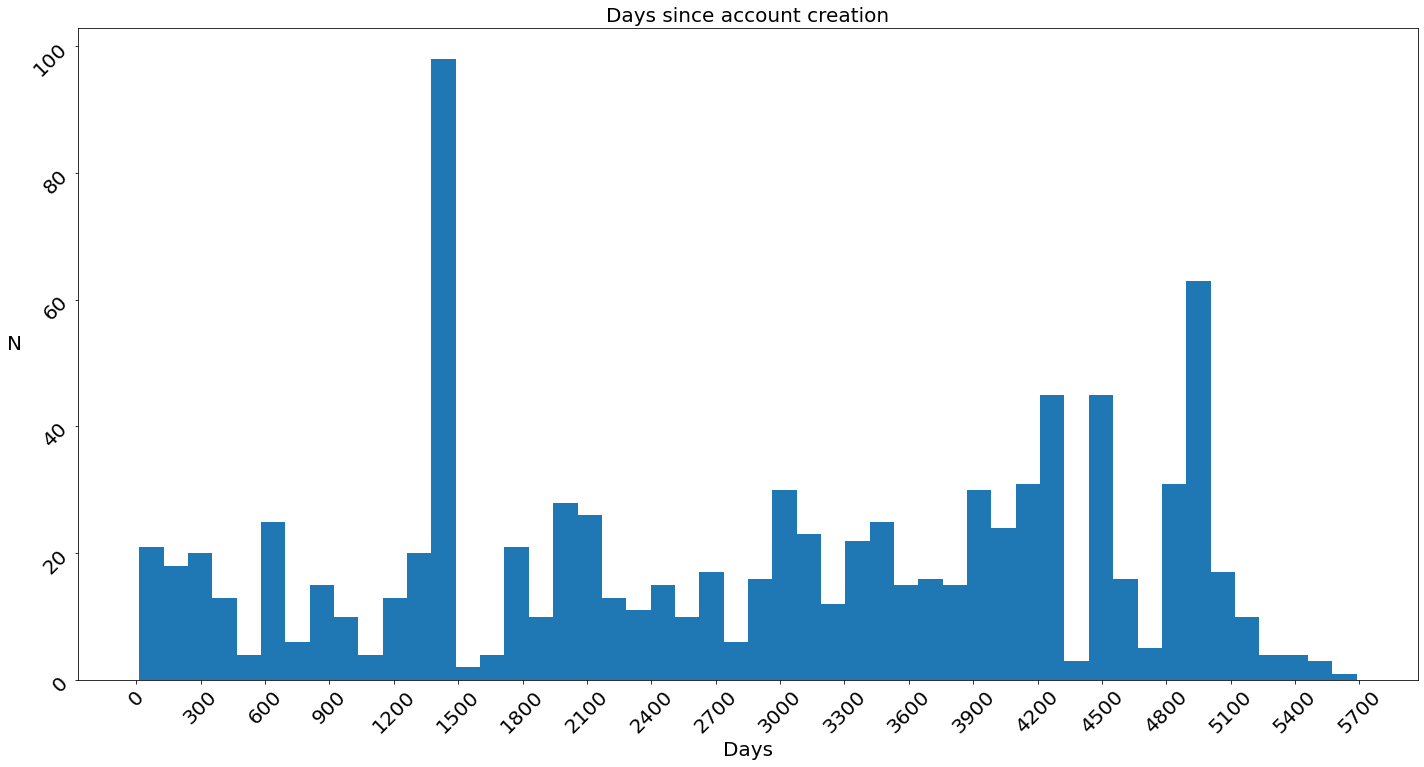

None
Displaying 25 of 217 matches:
ally in Russia Putin s announced mobilization of 300 000 reservists was jaw dr
ING Putin secretly orders larger mobilization of a million soldiers to die in 
r strategist 1 3 With the forced mobilization Ukraine Ukraine should share thi
 terror Russians feel in Ukraine mobilization Ukraine I am fine with it It is 
ING Putin secretly orders larger mobilization of a million soldiers to die in 
didn t want to Putin s announced mobilization of 300 000 reservists was jaw dr
HIMARS targeting computer On why mobilization whether 300 000 or a million isn
gorod region 1 3 With the forced mobilization Ukraine Ukraine should share thi
ING Putin secretly orders larger mobilization of a million soldiers to die in 
4 from the novel 1984 Dystopia n Mobilization Putin dies and goes to hell Beca
at does Putin s partial military mobilization mean for Central Asian migrants 
ion of the Activity DraftSnowden Mobilization n n russia Earth Water Air Fire 
urs Everything I 

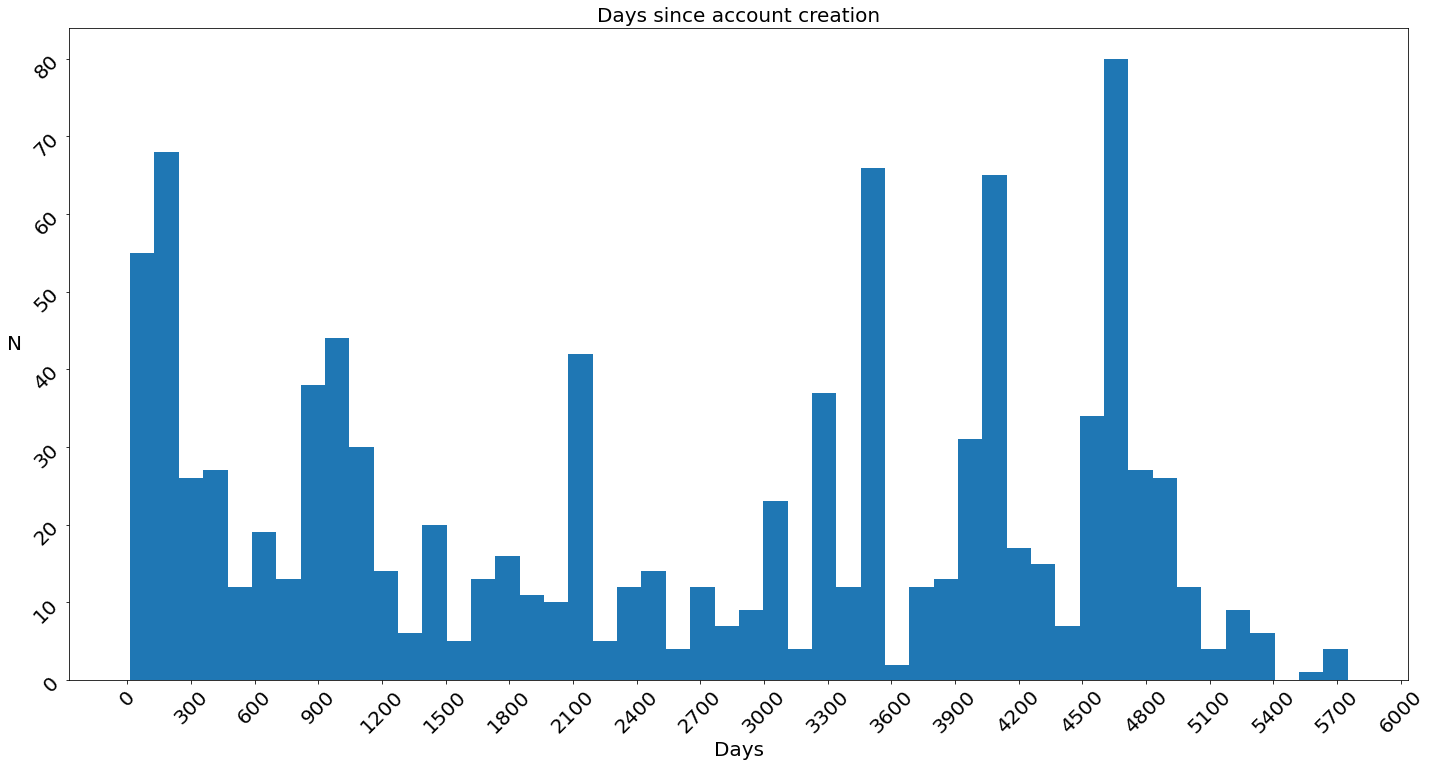

None
Displaying 25 of 86 matches:
One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
sult other than huge losses Anti mobilization protests in Russia are not neces
 have to be carried along On why mobilization whether 300 000 or a million isn
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
at does Putin s partial military mobilization mean for Central Asian migrants 
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 needs to stand alone if Russian mobilization accures He s pro Ukraine war Haw
n nRead UK intelligence Russia s mobilization will be highly unpopular n nRuss
ire Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
de commited by russians It s not mobilization It s a special transfer to Ukrai
is town so Ukraine must win Anti mobilization protests in Russia are not neces
s you to die in Ukraine Aerof

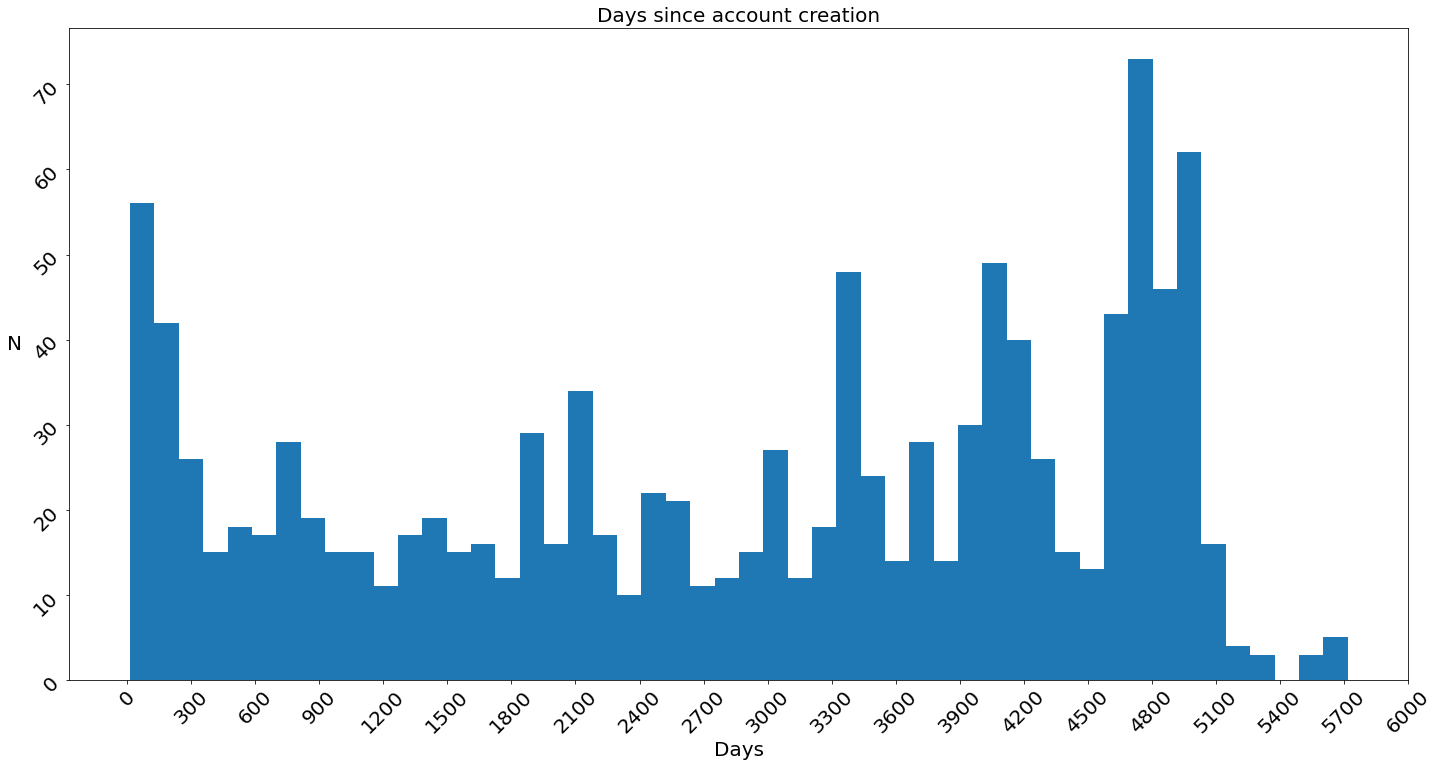

None
Displaying 25 of 92 matches:
 its Kremlin sources the partial mobilization decree s classified article envi
esentment and then The Kremlin s mobilization decree has confronted many Russi
sterday just hours after Putin s mobilization announcement n An upcoming aucti
offices on fire Protests against mobilization have started across Russia today
 in response to Vladimir Putin s mobilization declaration A thread on the prot
arrested for protesting Russia s mobilization Police in St Petersburg have bea
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 to Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
cow announced a partial military mobilization Report by In Moscow too mothers 
f resistance to Russia s partial mobilization measures Pretty powerful video I
ns are trying to escape from the mobilization announced by Putin n nAt the sam
lack Sea region Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

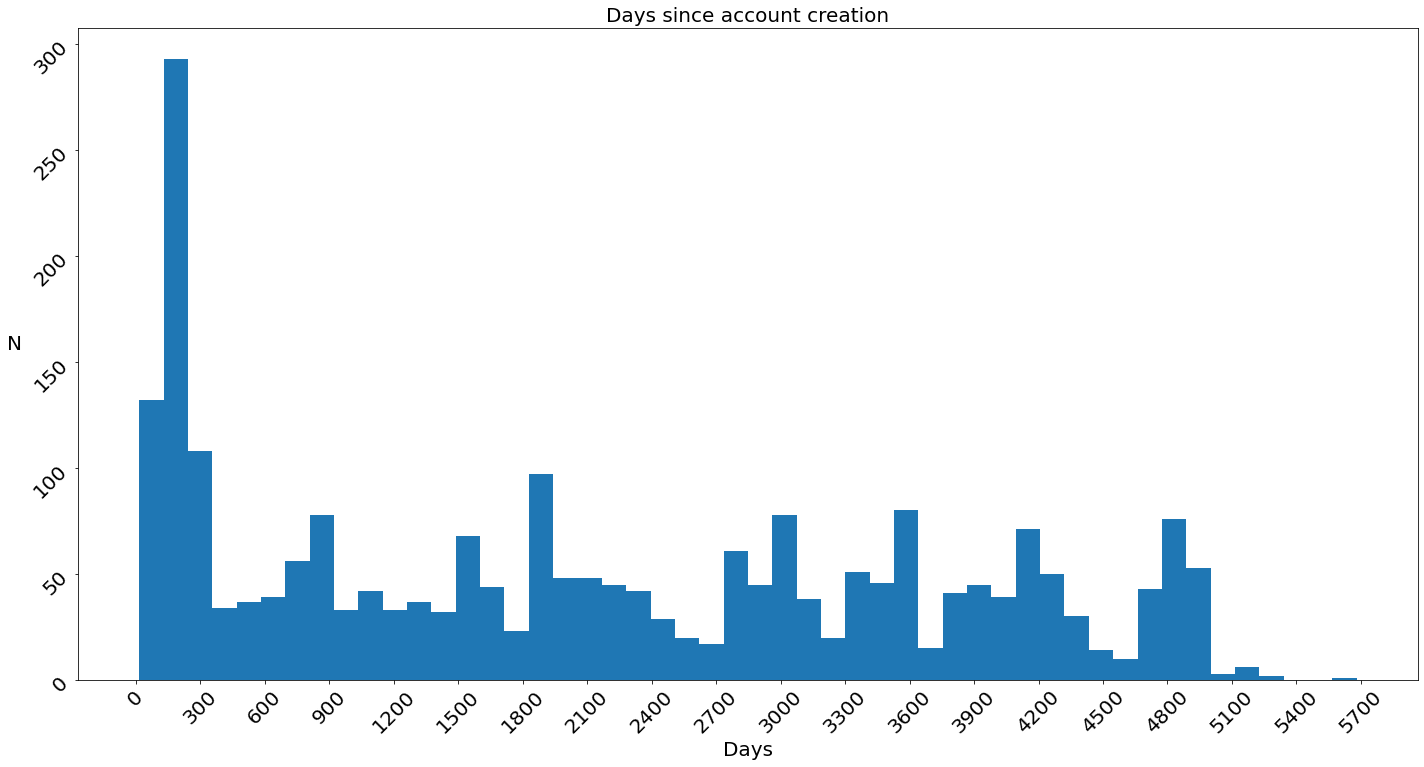

None
Displaying 25 of 192 matches:
venth paragraph of the decree on mobilization allows the Russian Ministry of D
tory n Polish meme about Russian mobilization n nDoc You re going to Ukraine n
eet protests against the partial mobilization policy announced by President Vl
rowing protests against military mobilization in St Petersburg Moscow Yekateri
n discovered More signs that the mobilization in Russia is far from partial Th
d n Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
he final hours Putin s announced mobilization of 300 000 reservists was jaw dr
f resistance to Russia s partial mobilization measures Secretary of State Anto
s Pro War celebrated the Partial Mobilization on Twitter n nLess than 2 hours 
er he receives a Convocation for Mobilization n nHe then immediately switches 
engagement Cartoon Russia orders mobilization for Putin s disastrous Ukraine i
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
mputer Polish mem

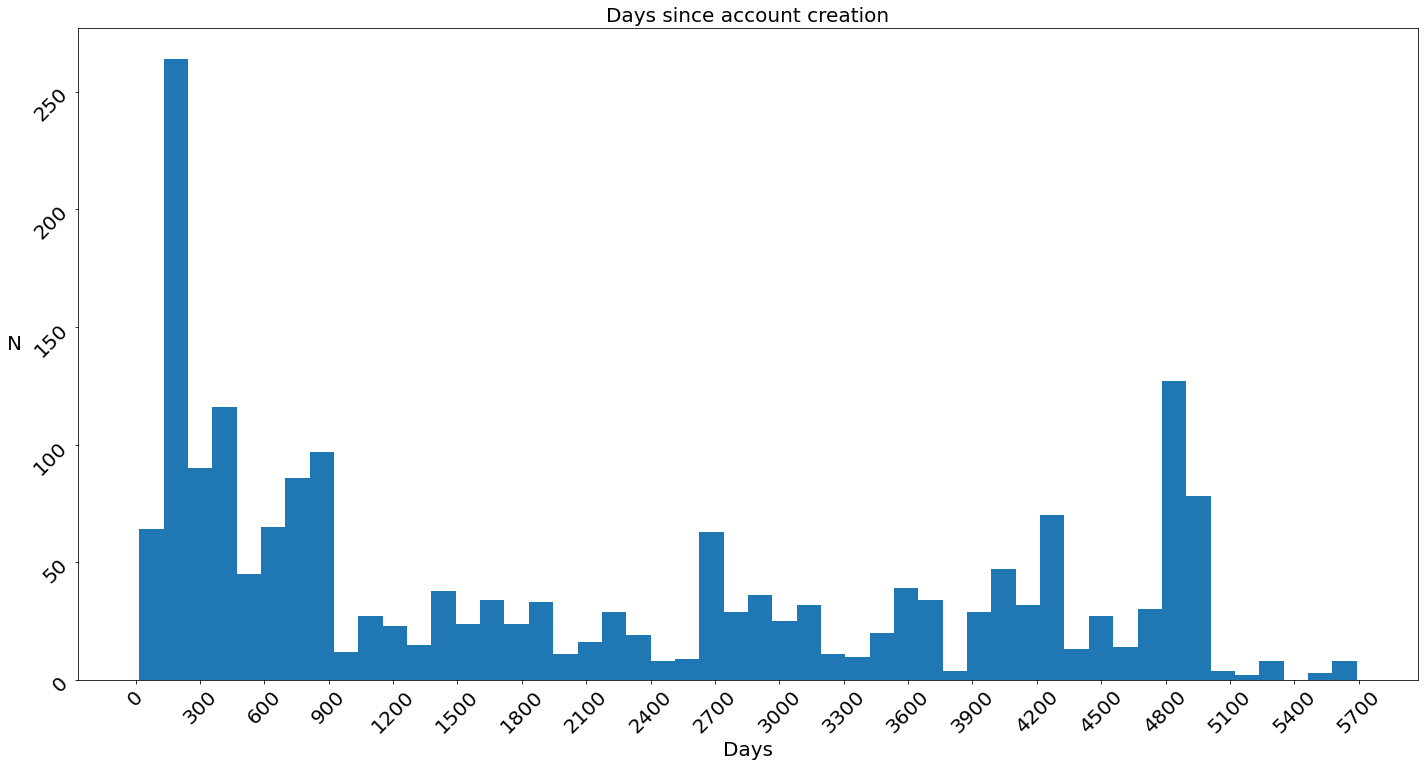

None
Displaying 25 of 212 matches:
nouncement after 7 months of war mobilization in Russia And a set of convicts 
we re seeing in terms of Russian mobilization The scale seems larger than what
f resistance to Russia s partial mobilization measures Every citizen is respon
llas The reality of this partial mobilization is looking a lot different than 
ces fury in Russia over military mobilization and prisoner Washington Post n n
re the U S media reported On why mobilization whether 300 000 or a million isn
sia has only officially declared mobilization three times in its history World
 President Zelensky The military mobilization will bring the war to the homes 
fight in Ukraine on first day of mobilization news agency According to Novaya 
 in Moscow Putin s cannibalistic mobilization List of 103 Gazprom employees th
ean troll farms Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 a plane due to R

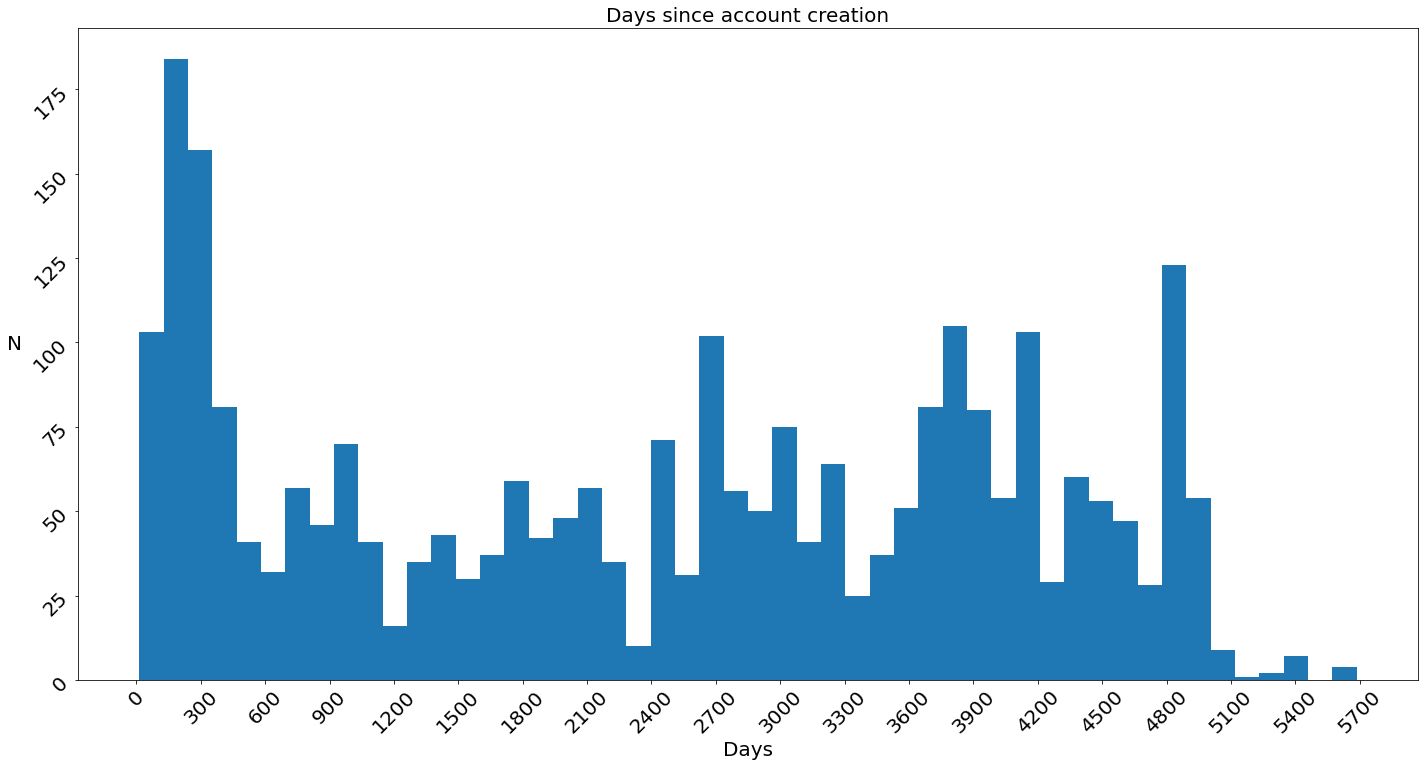

None
Displaying 25 of 315 matches:
at the UNGA Russia s decision on mobilization is an admission that their regul
e coming in so far about Russian mobilization n n1 They are not sticking to Pu
 already wrong nAnd this partial mobilization made official yesterday is a tre
monstrations against the partial mobilization for the offensive in Ukraine ann
Ukraine To unfold on the partial mobilization announced yesterday by Putin Nov
secret part of Putin s decree on mobilization states that Russia can draft up 
n a war that I want no part in n Mobilization List of 305 925 names comprising
cow announced a partial military mobilization Report by Hello nA video from 20
s on Russians to protest against mobilization ICC Prosecutor KarimAAKhanKC at 
sians to protest against partial mobilization Ukraine energy ministry deletes 
porizhzhia nuclear plant Putin s mobilization self own Employees at the Khruni
 already wrong nAnd this partial mobilization made official yesterday is a tre
ghway protesting 

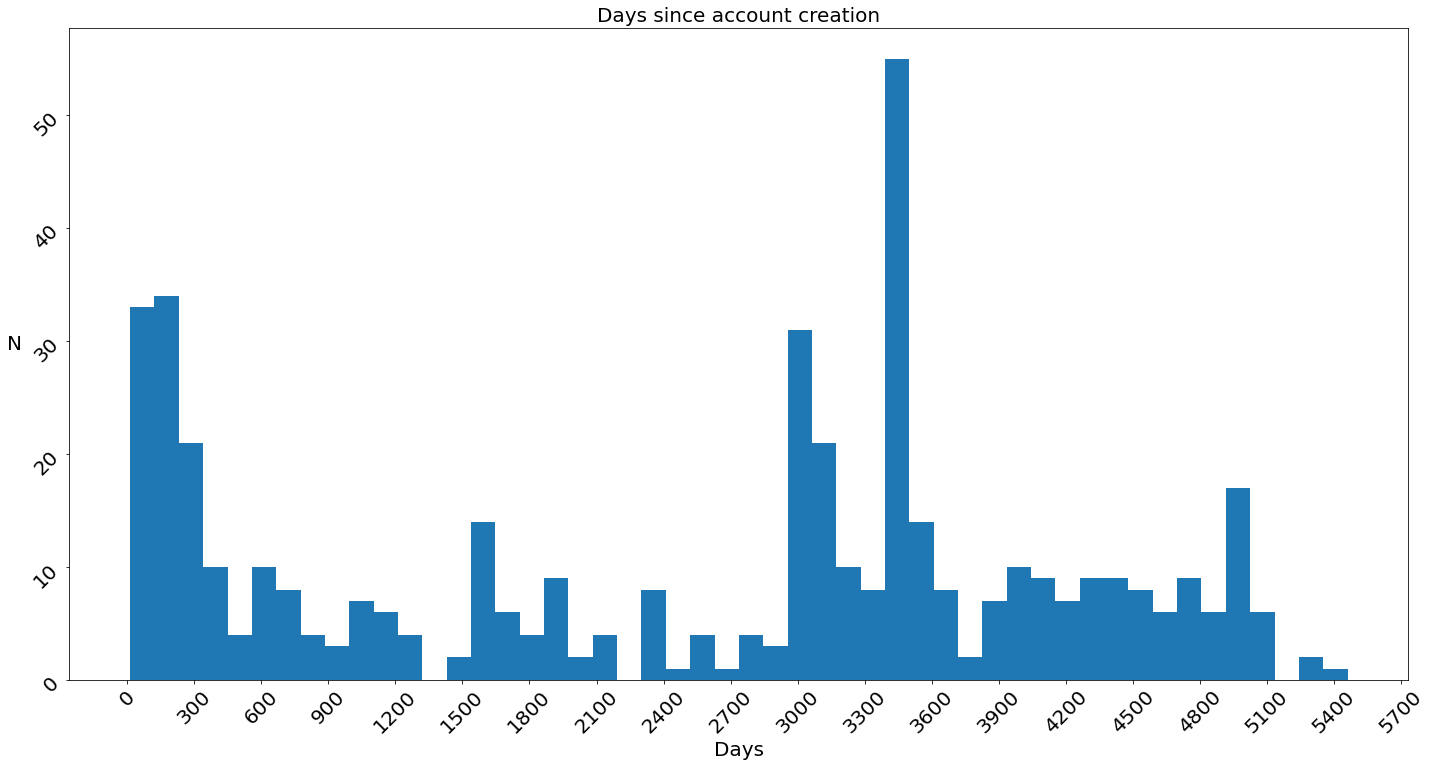

None
Displaying 25 of 30 matches:
ion Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
er The speed of Russia s partial mobilization will depend on planning and cont
s to protest against the war and mobilization in Chechnya all of them were det
rike to the head during the anti mobilization protests in Moscow IRAN nWhat a 
pilov signed an order on partial mobilization It does not say anything about a
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
 Rate CB of C Trudeau s fault As mobilization begins in Russia sold out flight
sia for the first day of partial mobilization about 10 thousand people arrived
ow after Putin announces partial mobilization Ukrainian President Volodymyr Ze
ING Putin secretly orders larger mobilization of a million soldiers to die in 
want to survive Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
trongly condemn Pu

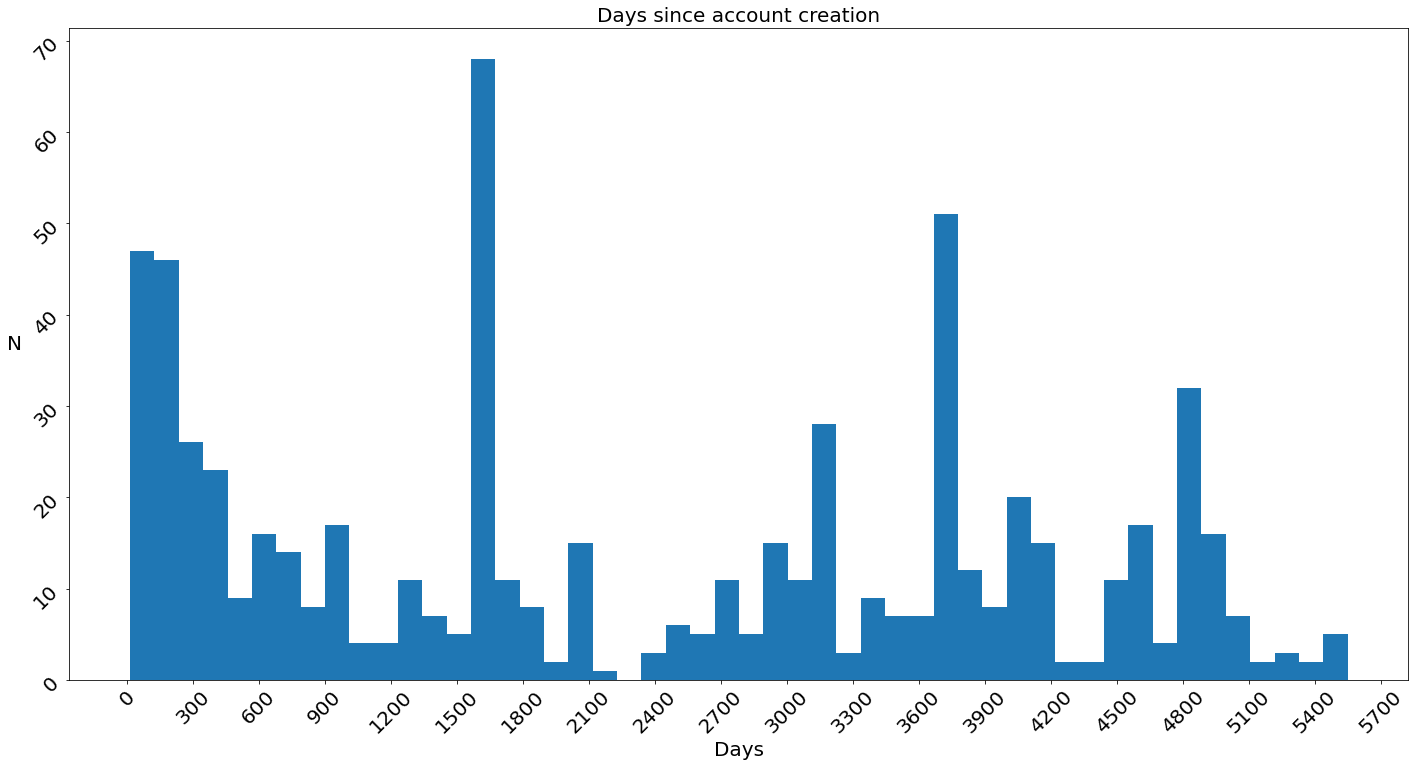

None
Displaying 25 of 96 matches:
cans first After Putin announced mobilization in Russia 90 of support for the 
one Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
n enemy According to her partial mobilization in Russia requires a reassessmen
Russia show just how quickly the mobilization is happening Less than 24 hours 
ehicle Polish meme about Russian mobilization n nDoc You re going to Ukraine n
 sitrep n n Issues with Russia s mobilization and a reported secret clause to 
 Ukraine s Azov Regiment Putin s mobilization self own Employees at the Khruni
nd analysis 1 6 Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
ossible UK intelligence Russia s mobilization will be highly unpopular n nRuss
tizens who want to avoid partial mobilization Prime Minister Kallas n nI fully
to destroy the Crimean Tatars by mobilization This is a disaster As of now at 
them to go protest

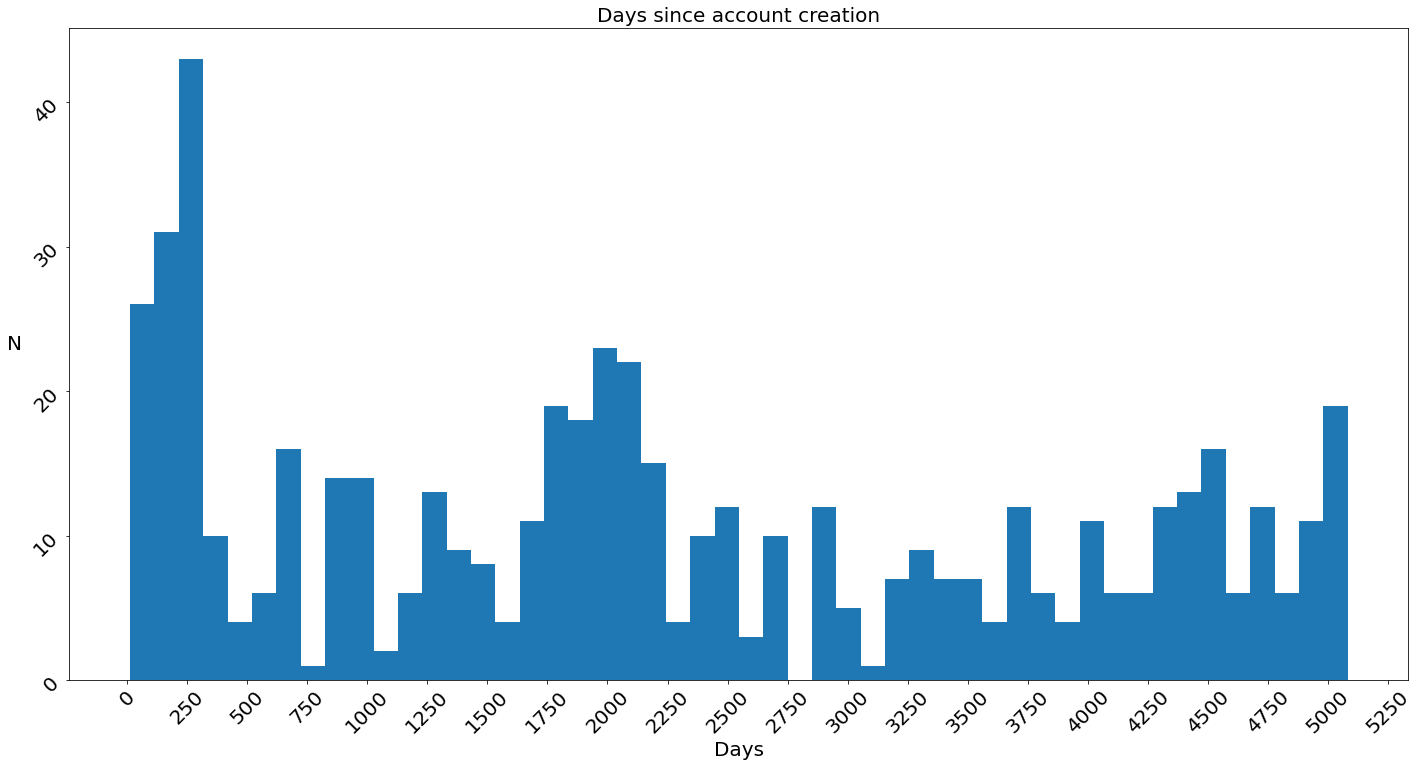

None
Displaying 25 of 26 matches:
es 300 000 troops 7NEWS see more Mobilization in the Russian Federation I have
 n nWelcome to Insiders Military mobilization in Moscow n Russian Russia Ukrai
eet protests against the partial mobilization policy announced by President Vl
 Dagestan protesters against the mobilization blocked the federal highway gt s
Putin announces partial military mobilization in Russia amid war with Ukraine 
ghway protesting against Putin s mobilization I notice that Russian diplomats 
Putin announces partial military mobilization in Russia amid war with Ukraine 
A few videos of the first day of mobilization in Russia n nFirst video n nAn e
stops fighting Ukraine ends Anti mobilization protests in Russia are not neces
ival for Russia Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
he s losing the war yet Now that mobilization is govt policy it ll be interest
grees with that Ru

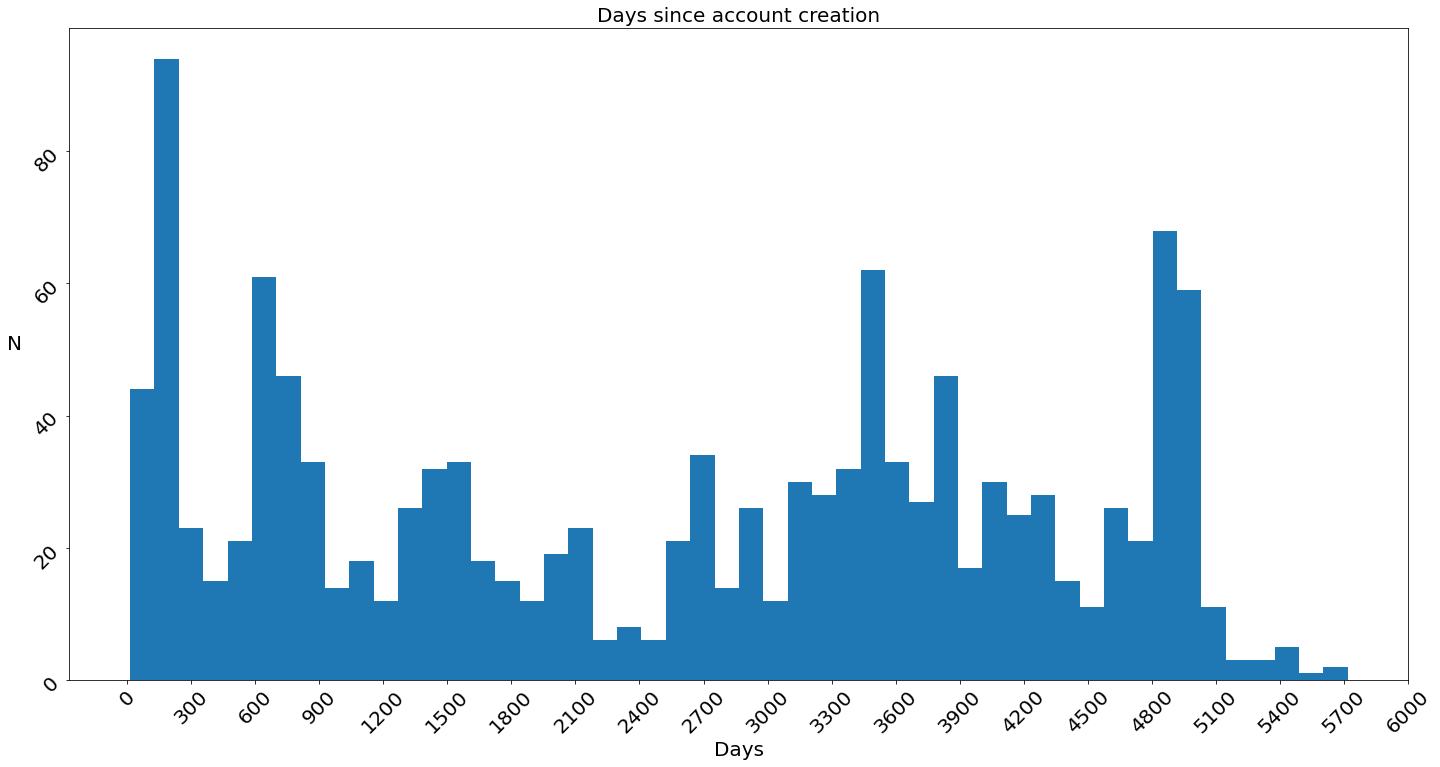

None
Displaying 25 of 159 matches:
 its Kremlin sources the partial mobilization decree s classified article envi
secret part of Putin s decree on mobilization states that Russia can draft up 
 its Kremlin sources the partial mobilization decree s classified article envi
y arrested across Russia in anti mobilization protests Zelensky warns against 
 its Kremlin sources the partial mobilization decree s classified article envi
is an act of desperation Partial mobilization Russia Russia Anonymous n nThe U
 border Russians are fleeing the mobilization in all possible directions Russi
 its Kremlin sources the partial mobilization decree s classified article envi
 Putin s announcement of partial mobilization on September 21 reflected many p
ear contaminated Ukraine Partial mobilization nuclear weapons Russia deserters
 to leave Russia after a Partial Mobilization was announced yesterday n nA fli
 its Kremlin sources the partial mobilization decree s classified article envi
 its Kremlin sour

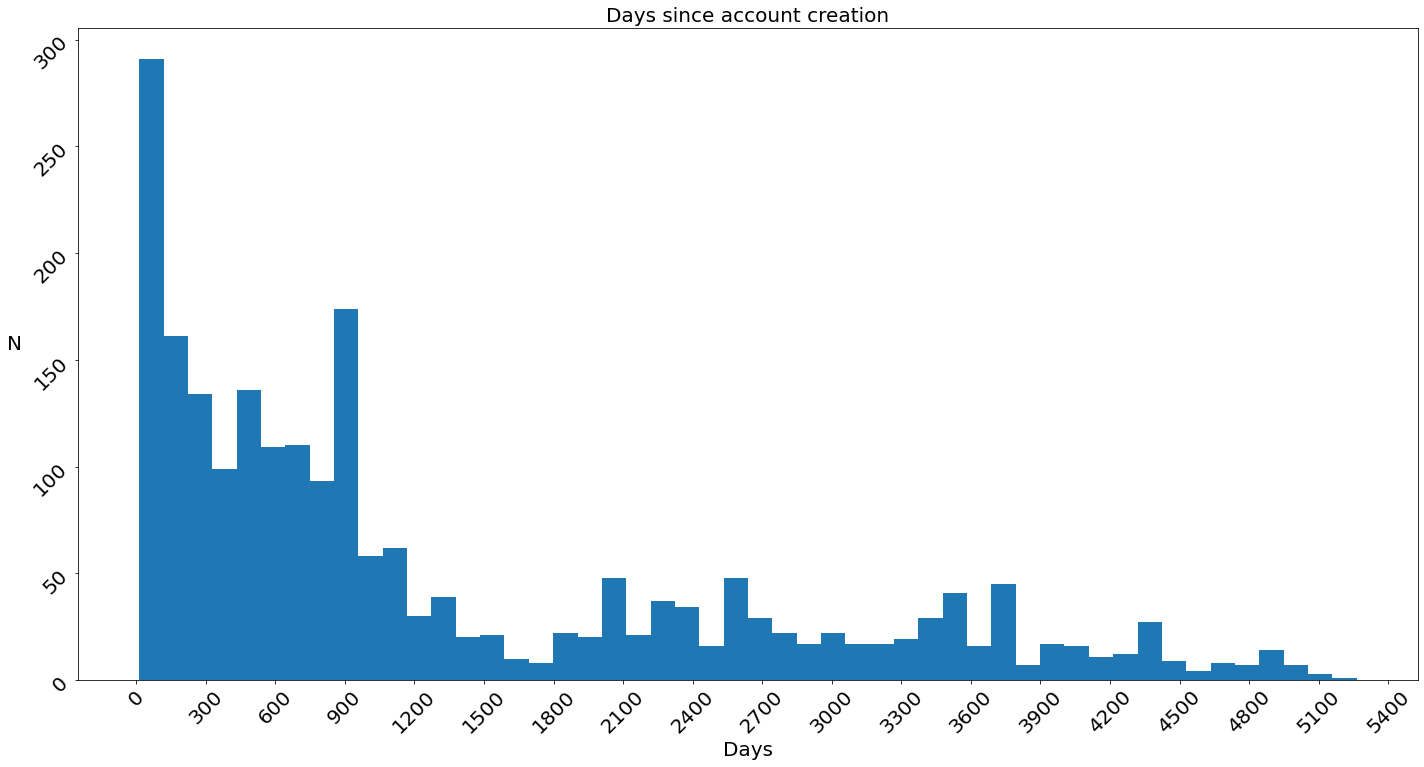

None
Displaying 25 of 51 matches:
ht since Putin s announcement of mobilization On Ilikovsky Avenue in Lomonosov
re during the night I m watching mobilization videos photos from Russia and I 
s This reminds me on Milosevic s mobilization in Serbia while protecting his e
 same old story Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
 No war chantings after they got mobilization More signs that the mobilization
mobilization More signs that the mobilization in Russia is far from partial Th
ry training or study So Russia s mobilization applies only for regular people 
e his country 1 The first day of mobilization in Ukraine the queue at the mili
commissariat n2 The first day of mobilization in Russia queue at the border Br
e believes that Russia s partial mobilization is a sign that it has exhausted 
ent suggests that Russia s first mobilization since WWII is looking to send fa
ine n n Hey russia

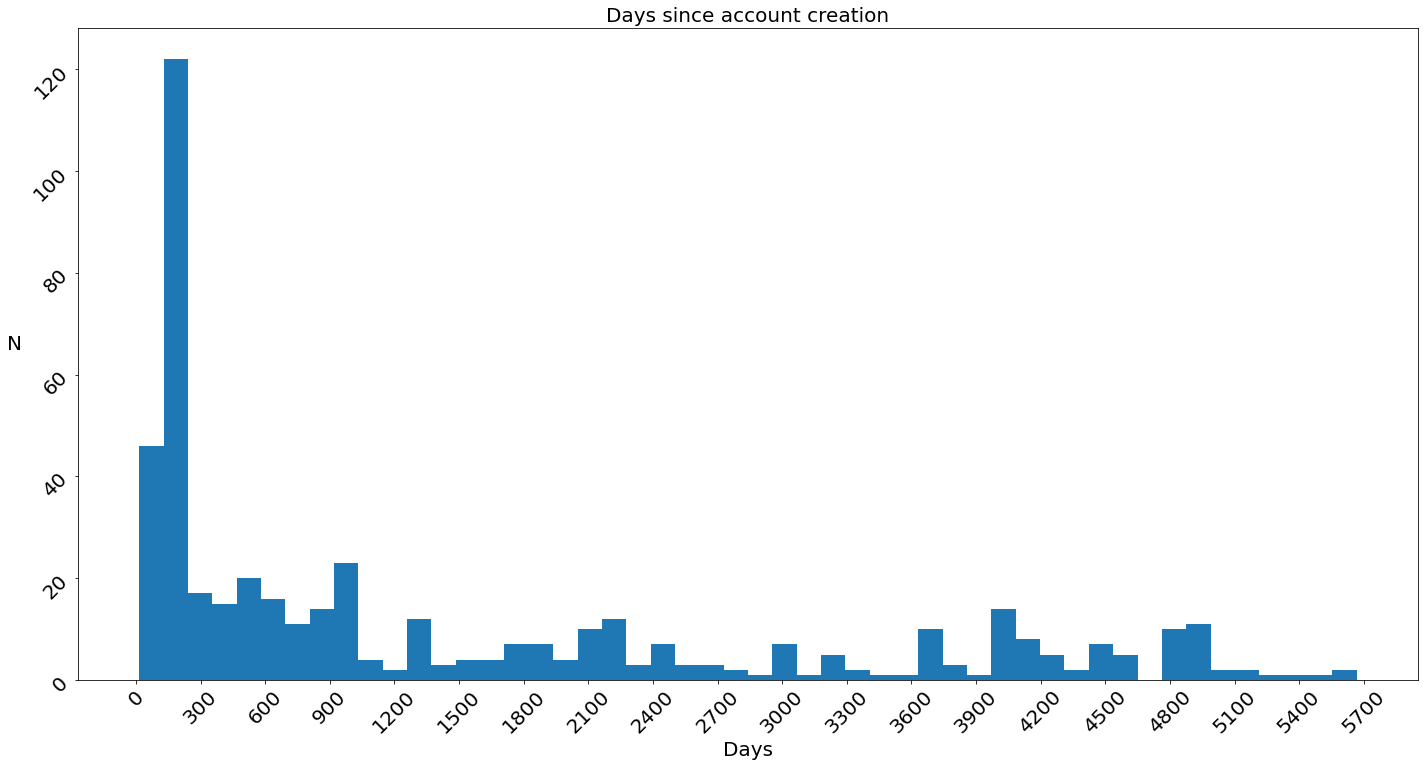

None
Displaying 7 of 7 matches:
ube Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
 in support of Russia s military mobilization Mufti of Chechnya Salakh Mezhiev
gins with Punishment via Putin s mobilization effort is a sign manpower is a p
e after Putin s partial military mobilization A piece I read the other day has
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ances amp economic clubs n n The Mobilization Begins Scenes Around Russia What
ING Putin secretly orders larger mobilization of a million soldiers to die in 
                 ('So', 'are', 'we', 'just')                 ('are', 'we', 'just', 'not')               ('we', 'just', 'not', 'going')               ('just', 'not', 'going', 'to')               ('not', 'going', 'to', 'talk')             ('going', 'to', 'talk', 'about')             ('to', 'talk', 'about', 'Boris')        ('talk', 'about', 'Boris', 'Johnson')    ('about', 'Boris', 'Johnson', 'ordering') ('Boris', 

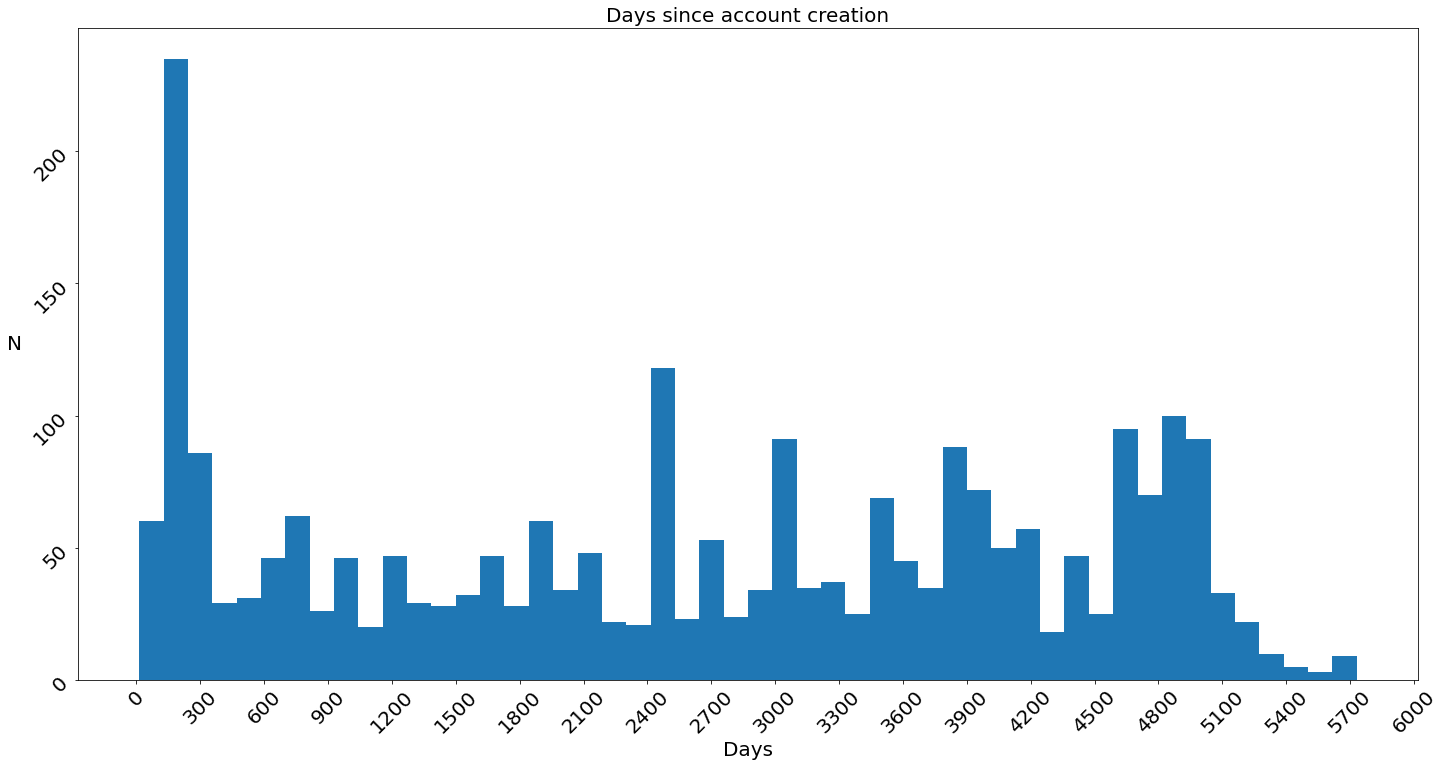

None
Displaying 25 of 741 matches:
t at UN Security Council Putin s mobilization self own Employees at the Khruni
er is coming this time literally Mobilization Putin s fascist spokesman Peskov
 million people Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
reat reporting from Roth Putin s mobilization self own Employees at the Khruni
o issue notices because there is mobilization now Forcibly conscripted Russian
aine stops fighting Ukraine ends Mobilization List of 305 925 names comprising
cow announced a partial military mobilization Report by Pretty powerful video 
ng about replies a Dagestani man Mobilization List of 305 925 names comprising
00 000 n94mb text file n Putin s mobilization self own Employees at the Khruni
forced onto buses after Russia s mobilization order n n RussiaInvadedUkraine U
in the Kharkiv direction Putin s mobilization self own Employees at the Khruni
 to the AU Putin 

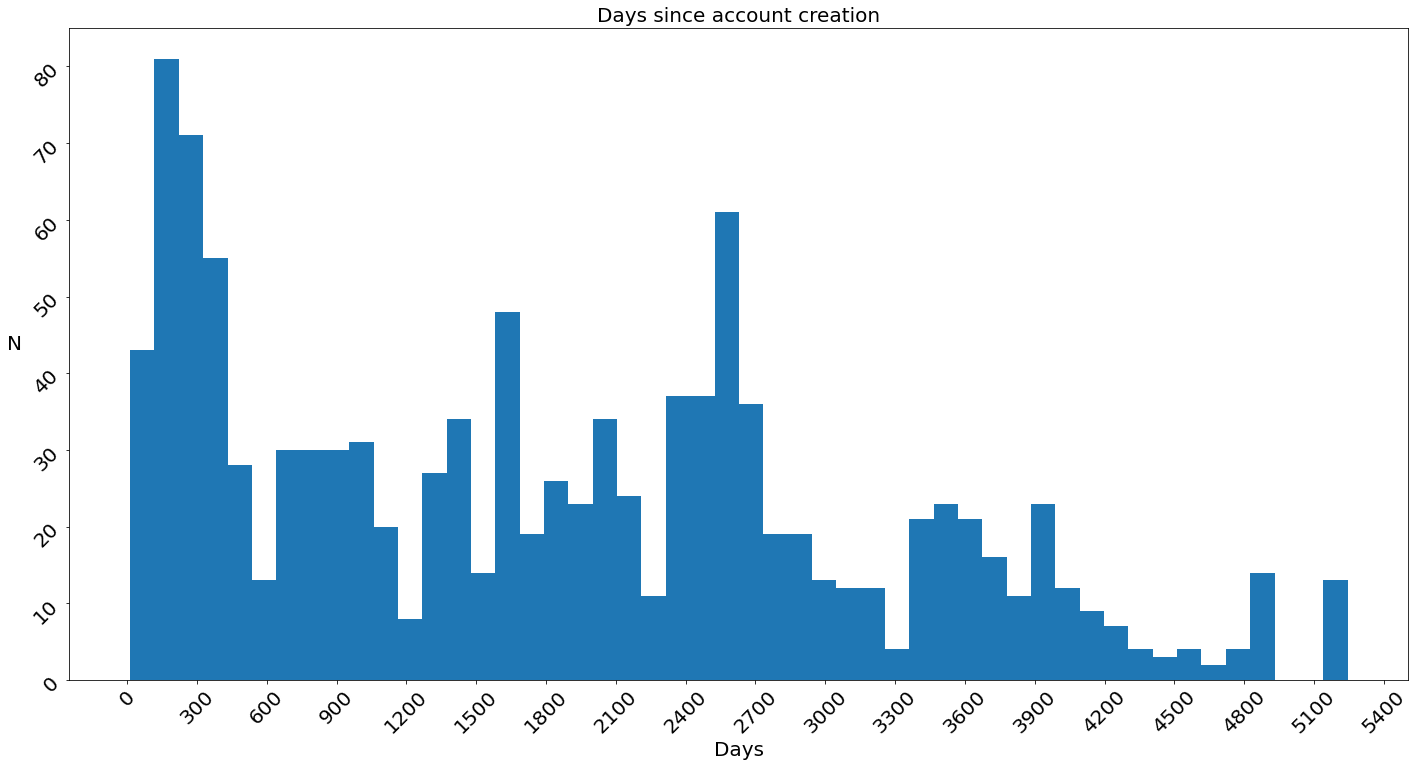

None
Displaying 25 of 171 matches:
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
on sense are two opposite things Mobilization List of 305 925 names comprising
myr Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
rowing protests against military mobilization in St Petersburg Moscow Yekateri
ergei Lavrov at the UNGA Partial mobilization NA dream way to get rid of the r
hours to Russia declares partial mobilization to possibly prevent a crushing d
ng defeat in Ukraine The partial mobilization announced by V Putin is an attem
o fight in Ukraine after Putin s mobilization speech n nThe Russian people wil
tember 12 2022 Vladimir Putin on mobilization and conscription soldiers six mo
sian Black Sea Fleet n n Partial mobilization NA dream way to get rid of the r
d soldiers who did not receive a mobilization call are forbidden to leave thei
ian state daily Magyar Nemzet on mobilization The war starts now Soon as many 
 decades as Ukrai

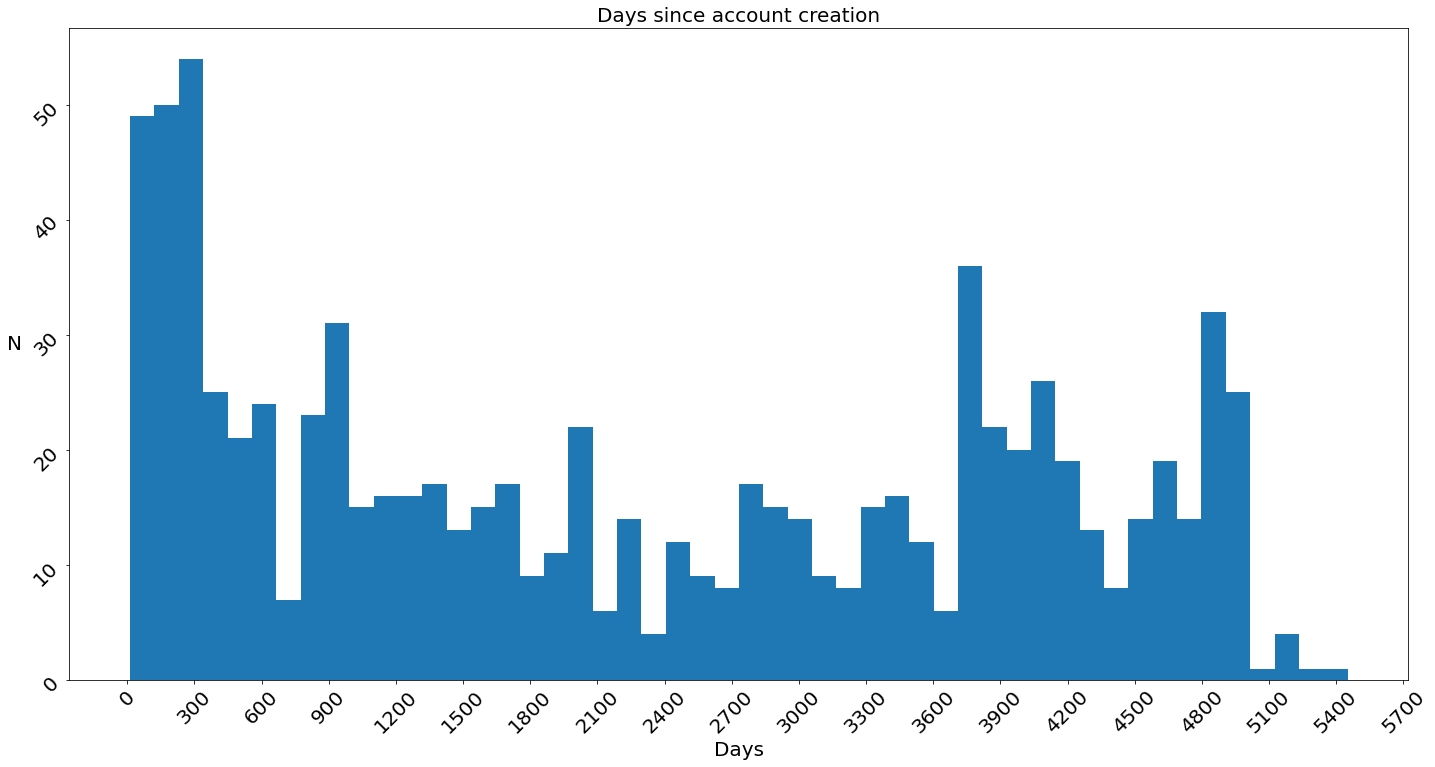

None
Displaying 21 of 21 matches:
No one knows More signs that the mobilization in Russia is far from partial Th
es the war then declares partial mobilization and threatens West with nuclear 
 another one On the left Russian mobilization headed to Ukraine On the right a
ence Disgusting Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russia brings mass mobilization of ethnic minorities and the imp
secret part of Putin s decree on mobilization states that Russia can draft up 
d the rhetorical confines of its mobilization campaign n The Republics of Done
eet protests against the partial mobilization policy announced by President Vl
ral Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
s on Russians to protest against mobilization the AFP reports cgtnamerica Russ
mir Putin s speech calling for a mobilization of the Russian military reserve 
 wasn t enough which the current mobilization has proven to be true Why are we
d Muscovites are t

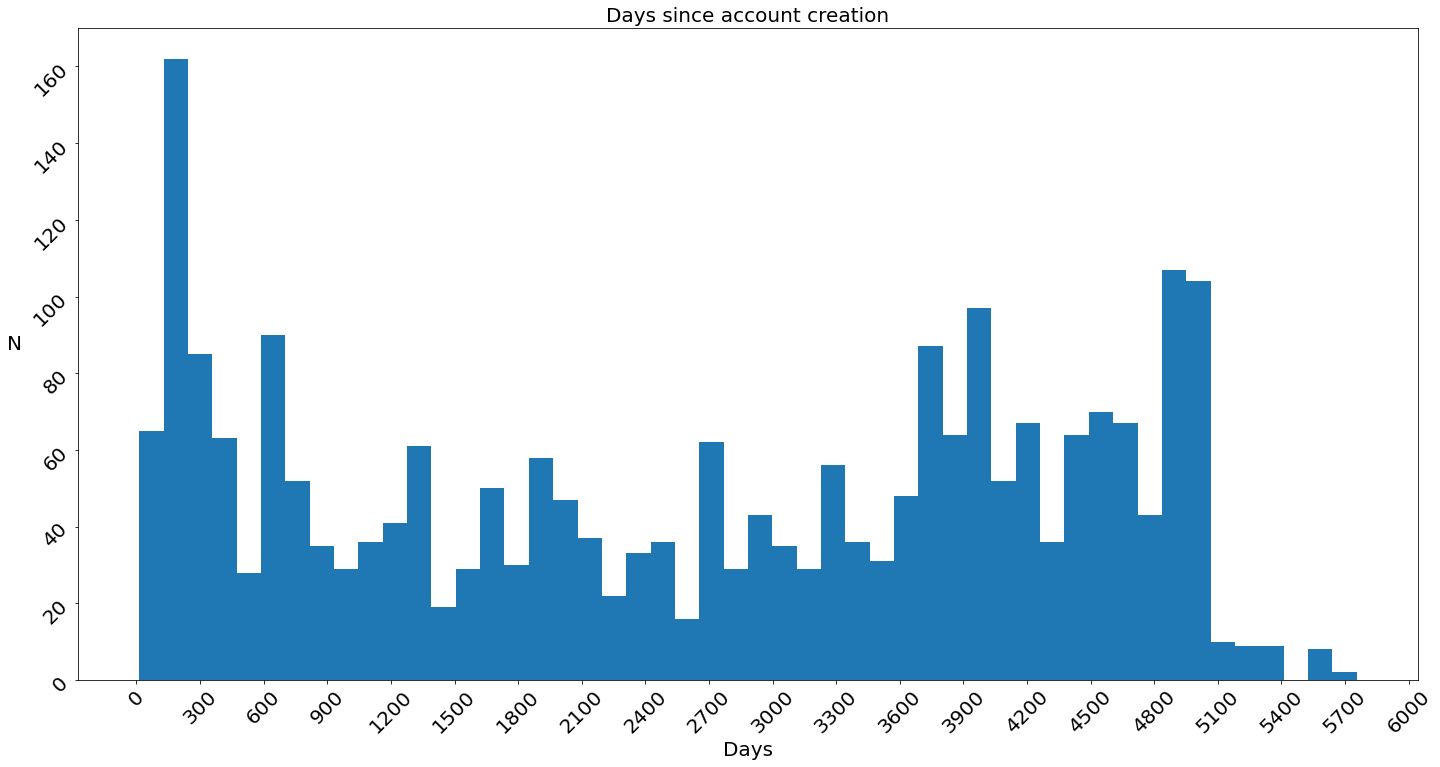

None
Displaying 25 of 325 matches:
adimir Putin announced a partial mobilization in the country said that Germany
in price after Putin announced a mobilization of reservists n nSearch SVO VKO 
age Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
ING Putin secretly orders larger mobilization of a million soldiers to die in 
ack Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
n financed One simple fact about mobilization everything Putin said in his add
s address was a lie n n1 Partial mobilization is the same euphemism as a speci
ps fighting Ukraine ends Putin s mobilization self own Employees at the Khruni
you like Putin values Medvedchuk Mobilization is a desperate gesture from Puti
rike to the head during the anti mobilization protests in Moscow Are those cro
 it Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
read resentment and then Putin s mobilization Conscripts in Moscow getting loa
 at protests agai

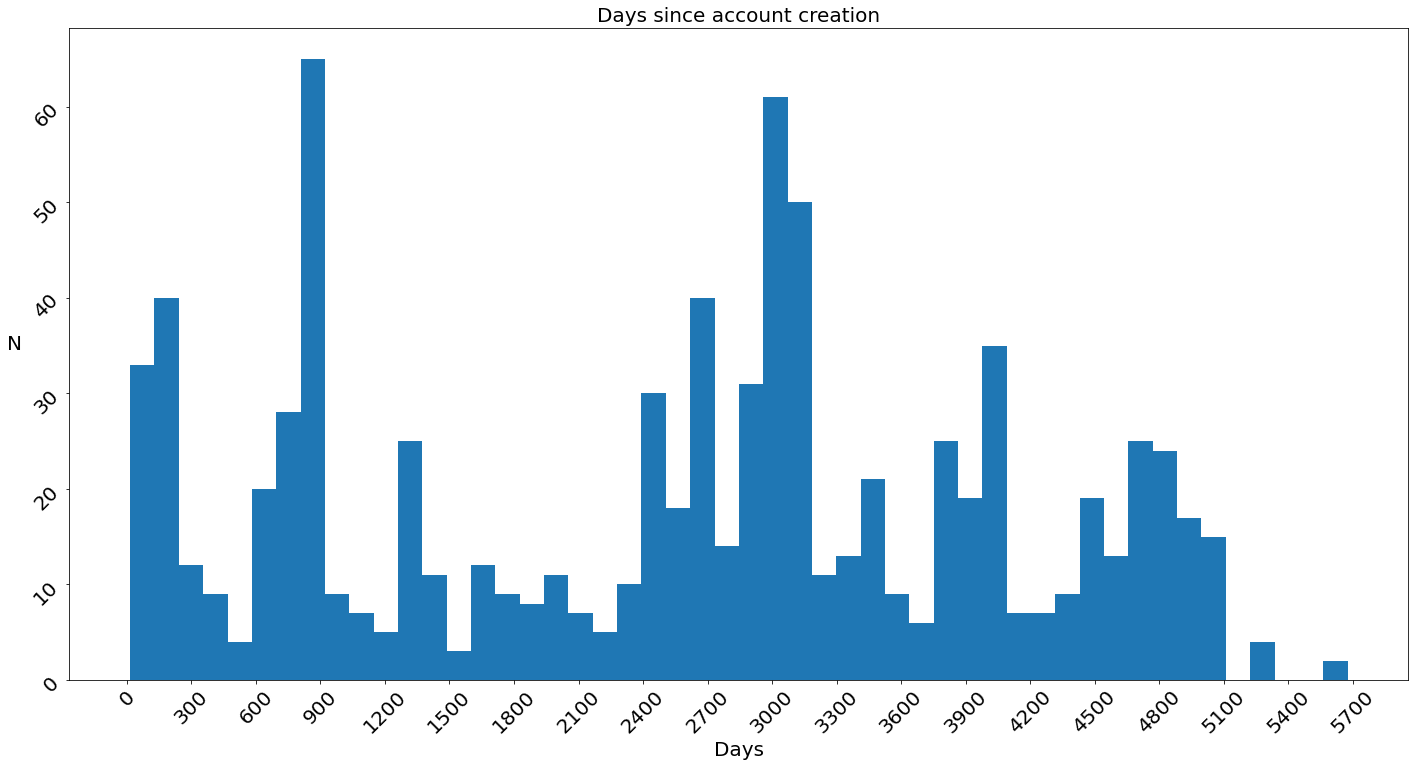

None
Displaying 25 of 39 matches:
e coming in so far about Russian mobilization n n1 They are not sticking to Pu
rike to the head during the anti mobilization protests in Moscow People in Rus
dreds of Russians PROTESTING the mobilization order chanting No to War n 153 d
153 detained at protests against mobilization n In Krasnodar Izhevsk amp Mosco
eryone caught protesting against mobilization in Russia Russia has given the b
ar My latest analysis at Putin s mobilization self own Employees at the Khruni
secret part of Putin s decree on mobilization states that Russia can draft up 
nt of partial more on this below mobilization is much more dangerous for Russi
tes Everything I ve seen on this mobilization so far points to Yakutia Saha Bu
idarity with Ukraine The partial mobilization announced by Putin caused panic 
count dkpol n n Yesterday s anti mobilization protests across Russia show how 
 no part in n n Day 1 of partial mobilization in Russia brings mass mobilizati
bilization in Russ

TypeError: ignored

In [ ]:
# analyse communities with > 5000 members
path = '/content/drive/MyDrive/communities_ECG/'
for file in os.listdir(path):
  print(file)
  dataframe = pd.read_csv(path + file)
  if dataframe.shape[0] > 1000 and dataframe.shape[0] < 5000:
    analyse_community(dataframe, f'{path}{file}')

community435.csv,  
community251.csv,  
community428.csv,  
community272.csv  
have a disproportionate amount of accounts created this year


In [8]:
!pip install transformers==4.11.2
!pip install torch==1.7.1
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from IPython.display import clear_output

tokenizer = AutoTokenizer.from_pretrained("valurank/distilroberta-propaganda-2class")
model = AutoModelForSequenceClassification.from_pretrained("valurank/distilroberta-propaganda-2class")

def detect_propaganda(dataframe, file):
  path = '/content/drive/MyDrive/communities_ECG/'
  if not 'translated' in dataframe.columns:
    dataframe = dataframe.apply(clean_translate_tweet, axis = 1)
    dataframe.to_csv(path+file)

  scores_prop = []
  scores_no_prop = []

  for text in dataframe['translated']:
    if not isinstance(text, str):
      continue
    else:
      clear_output(wait=True)
      tokens = tokenizer(text, return_tensors='pt')["input_ids"]
      score = list(model(tokens).logits.detach().numpy()[0])
      scores_prop.append(score[0])
      scores_no_prop.append(score[1])
      average_propaganda = sum(scores_prop)/len(scores_prop)
      average_non_propaganda = sum(scores_no_prop)/ len(scores_no_prop)
      normalized_prop = (average_propaganda--1)/(1--1)
      normalized_non_prop = (average_non_propaganda--1)/(1--1)
      print(file)
      print('average propaganda score: '+str(normalized_prop))
      print('average non propaganda score: '+str(normalized_non_prop))
  return normalized_prop, normalized_non_prop

FIRST_TIME = False
propaganda_df_out = []
if not FIRST_TIME: 
  prop_df = pd.read_csv('/content/drive/MyDrive/communities_ECG/propaganda_DF.csv')
  for index, row in prop_df.iterrows():
    propaganda_df_out.append({'filename': row['filename'], 'propaganda_score': row['propaganda_score'], 'non_propaganda_score': row['non_propaganda_score']})

for file in os.listdir("/content/drive/MyDrive/communities_ECG/"):
  community = pd.read_csv("/content/drive/MyDrive/communities_ECG/"+file)
  if file not in prop_df['filename']:
    propaganda, non_propaganda = detect_propaganda(community, file)
    propaganda_df_out.append({'filename': file, 'propaganda_score': propaganda, 'non_propaganda_score': non_propaganda})
    prop_df = pd.DataFrame(propaganda_df_out)
    prop_df.to_csv('/content/drive/MyDrive/communities_ECG/propaganda_DF.csv')


#community428 = pd.read_csv("/content/drive/MyDrive/communities_ECG/community428.csv")
#detect_propaganda(community428)

community472.csv
average propaganda score: 0.5569882171165029
average non propaganda score: 0.4575016373419203


KeyError: ignored

community37  
community291  
community111  
community209  
community399
all have disproportionate amount of propaganda

# go through translated communities and calculate average days since creation

In [ ]:
path = '/content/drive/MyDrive/communities_ECG/'
prop_df = pd.read_csv(path+'propaganda_DF.csv')
for index, row in prop_df.iterrows():
  dataframe = pd.read_csv(path+row['filename'])
  dataframe['author.created_at'] = dataframe['author.created_at'].map(lambda x: cleanTimestamps(x))
  dataframe['days_since_creation'] = dataframe['author.created_at'].map(lambda x: ms_since_creation(x))   
  row['average_days_since_creation'] = sum(dataframe['days_since_creation'])/len(dataframe['days_since_creation'])
  print(row['average_days_since_creation'])
prop_df.to_csv(path+'propaganda_sockpuppet_df.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1641.1430168638778


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,23,25,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


1699.9854528866135
2249.843512658228


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,23,33,35,36,37,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2785.562516314278
2282.273406839843


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (63,64,65,66,67,68,69,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


365.07601033834584
2344.0006190034046
1899.4390333480242


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2258.4219229294476
1843.278333050991
1641.1430168638778
1699.98550357342
1569.741065830721
2213.2818115144846
2185.190889370933
2573.5587818696886
1609.8710601719197
2053.056107034959
2587.773763201779
2114.535597381342
2453.4668615984406
2436.408469945355
2762.0625193438564
2645.762729476966
2289.878945265681
2783.8882934872217
2795.4959636730573
2370.725721784777
2141.0455192034137
2529.220284995809
2096.0
2559.263565891473
1590.0196629213483
1855.8295454545455
2168.8292910447763
2124.5633946830267
403.5
2368.8981132075473
1657.5128205128206
2776.2203647416413
2772.923076923077
2530.990250696379
2157.760714285714
2747.2706155632986
2772.2545454545457
2617.8238993710693
2621.1021582733815
2691.3401937046006
2579.8022598870057
1349.091891891892
1815.700272479564
2576.8048780487807
2744.796338672769
515.0
2579.366852886406
1770.9926199261993
1604.940366972477
1358.5338582677166
3244.5077519379847
2496.5625
2280.8453670276776
2731.0833333333335
2666.2804878048782
2681.1581920903955
2128.